In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [22]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.003
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.29344411, 0.83186113, 2.37243212, 2.36997871, 4.12295111,
       4.07796685, 3.16542472, 2.41129614, 5.36060769, 9.49445714])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


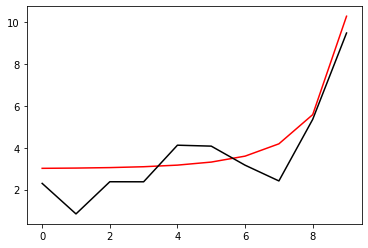

In [43]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [8]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F<0.1])):
            Positive.append([phi1[F<0.1][i], pi1[F<0.1][i]])
            if len(Positive)>=batch: break
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F>=0.1])):
            Negative.append([phi1[F>=0.1][i], pi1[F>=0.1][i]])
            if len(Negative)>=batch: break
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    phi=np.array(list1)[:, 0]
    pi=np.array(list1)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, phi, pi)[1]))
    for i in range (len(phi[F<0.1])):
        PP.append([phi[F<0.1][i], pi[F<0.1][i]])
    for i in range (len(phi[F>=0.1])):
        NN.append([phi[F>=0.1][i], pi[F>=0.1][i]])
    return PP, NN

In [10]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(h_real))
    Negative.insert(i, NN_func_n(h_real))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [44]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, Negative[i])[1])

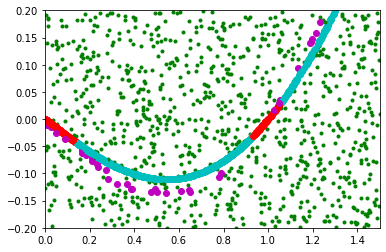

In [45]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [46]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [47]:
for i in range (set):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, Positive[i], Negative[i]))

tf.Tensor(0.03007667699823845, shape=(), dtype=float64)
tf.Tensor(0.028670790788166, shape=(), dtype=float64)
tf.Tensor(0.015546680470905449, shape=(), dtype=float64)
tf.Tensor(0.010023744840327288, shape=(), dtype=float64)
tf.Tensor(0.009976130230810669, shape=(), dtype=float64)
tf.Tensor(0.02288315438506759, shape=(), dtype=float64)
tf.Tensor(0.030206374588982694, shape=(), dtype=float64)
tf.Tensor(0.027635066526716146, shape=(), dtype=float64)
tf.Tensor(0.0592270040529415, shape=(), dtype=float64)
tf.Tensor(0.04016820461847036, shape=(), dtype=float64)
tf.Tensor(0.7920888936515802, shape=(), dtype=float64)
tf.Tensor(0.833516141410758, shape=(), dtype=float64)
tf.Tensor(0.874193195856209, shape=(), dtype=float64)
tf.Tensor(0.8323117708018647, shape=(), dtype=float64)
tf.Tensor(0.87000727893665, shape=(), dtype=float64)
tf.Tensor(0.8359322642623788, shape=(), dtype=float64)
tf.Tensor(0.8703514380006725, shape=(), dtype=float64)
tf.Tensor(0.8973502333541672, shape=(), dtype=float64)
tf

0 0.7912472538857371
[2.29864855 0.83842884 2.37480524 2.37201018 4.12339436 4.07802198
 3.16506847 2.41054201 5.35972469 9.49445317]


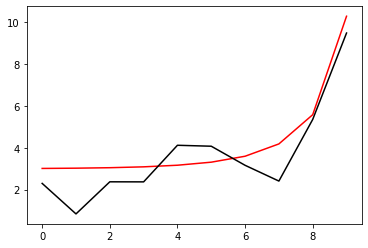

1100 0.8231157942373694
[2.37536023 0.92597978 2.41027159 2.40034984 4.13144222 4.08038121
 3.1620001  2.40234568 5.34955961 9.49440946]


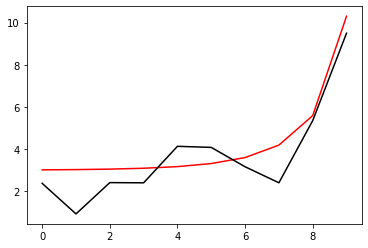

2200 0.8469376929577108
[2.4604624  1.01983858 2.44992966 2.43091615 4.14022576 4.08251228
 3.15794681 2.39248318 5.33763005 9.49436563]


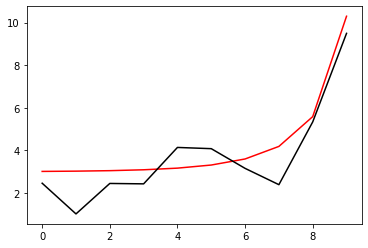

3300 0.759837101180113
[2.59024757 1.15040248 2.51296536 2.4768419  4.15717835 4.08901831
 3.15571426 2.38225324 5.32389494 9.49432167]


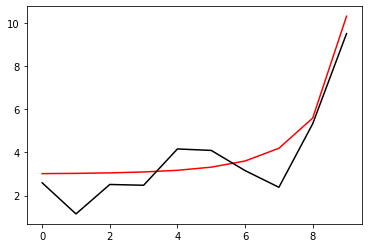

4400 0.7426144710523177
[2.78070565 1.32946915 2.60591821 2.54120198 4.18265313 4.09856269
 3.15260126 2.36774778 5.30448051 9.49427755]


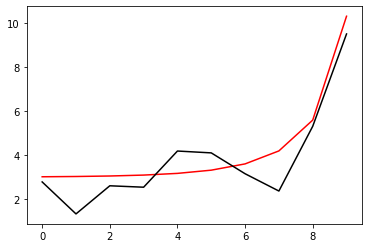

5500 0.09383661452172508
[3.22023614 1.7152211  2.83183468 2.69549206 4.25769318 4.13660154
 3.16392721 2.35564826 5.27855707 9.49423319]


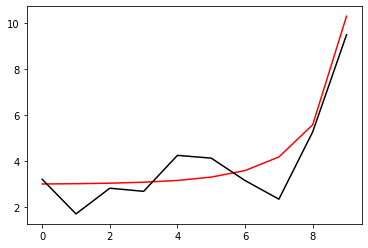

6600 0.03224919767043255
[3.42376932 1.88797285 2.91886128 2.75596215 4.28507894 4.15298645
 3.17290815 2.35851729 5.27637909 9.49418866]


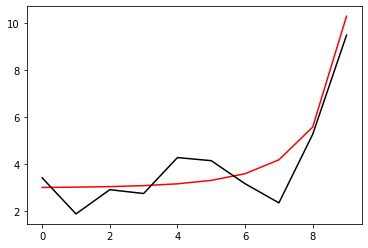

7700 0.07125597770020252
[3.44612229 1.92734191 2.92989528 2.77042861 4.29041288 4.1591352
 3.17914041 2.36452321 5.28052028 9.49414415]


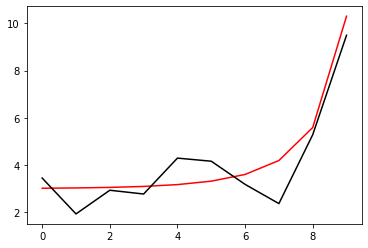

8800 0.08096284123763206
[3.43442001 1.94064055 2.92553888 2.77485291 4.29032116 4.16205744
 3.18348261 2.3696847  5.28469821 9.49409968]


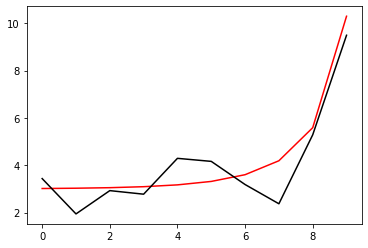

9900 0.059831739563932895
[3.42529219 1.95583341 2.92283208 2.78049588 4.29114389 4.16574218
 3.18853517 2.37551809 5.28937088 9.49405525]


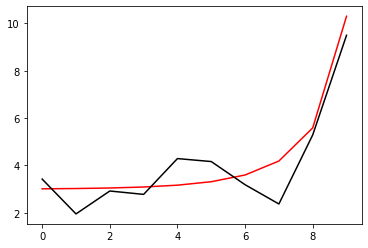

11000 0.03250633822688504
[3.41205185 1.96708317 2.91756881 2.78400209 4.29047808 4.1681772
 3.19244198 2.38028381 5.29327613 9.49401086]


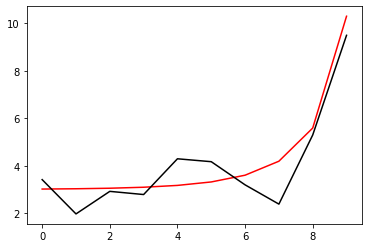

12100 0.029134574948834313
[3.39740407 1.97698823 2.91181178 2.7872116  4.28979522 4.17072361
 3.19656893 2.38535834 5.29747859 9.49396652]


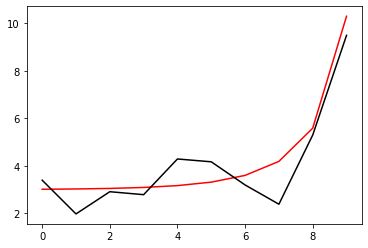

13200 0.03179635897222345
[3.39448519 1.99630465 2.91257646 2.79492783 4.29183202 4.17505345
 3.20189987 2.39114406 5.30188496 9.49392222]


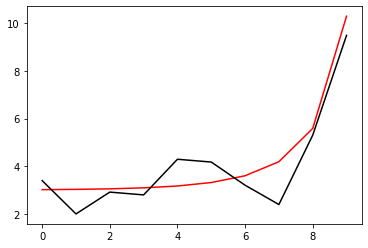

14300 0.020090692937665935
[3.38473451 2.00948623 2.90937022 2.79959946 4.29193004 4.17794128
 3.2060794  2.39602214 5.30576623 9.49387797]


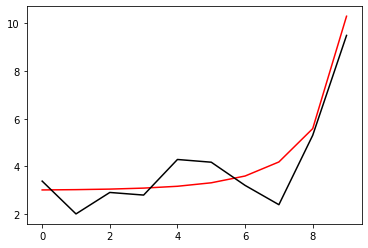

15400 0.021700774675649084
[3.37247366 2.02031955 2.90490511 2.80337115 4.29159938 4.18062654
 3.21022573 2.40101244 5.30983533 9.49383376]


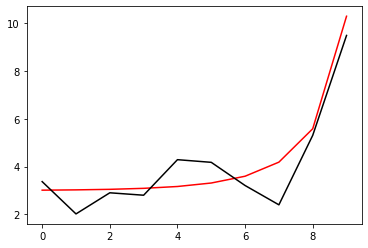

16500 0.038839498777326106
[3.36172314 2.03216527 2.90139112 2.80773267 4.29163689 4.18352304
 3.21448065 2.40601661 5.31384772 9.4937896 ]


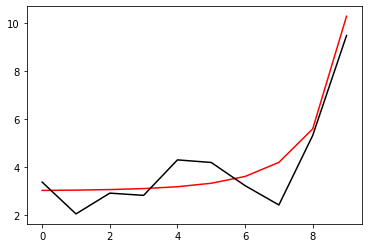

17600 0.029594532677843715
[3.34931408 2.04266887 2.89739158 2.81176464 4.29154972 4.18635111
 3.21869836 2.41099896 5.31785283 9.49374549]


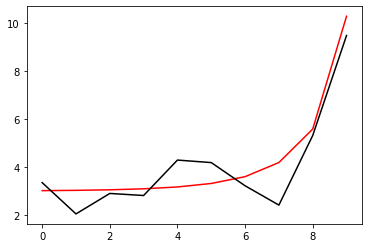

18700 0.06408505835637522
[3.35104953 2.06406415 2.90076481 2.82085978 4.29457185 4.19131305
 3.22449312 2.41710937 5.32242378 9.49370141]


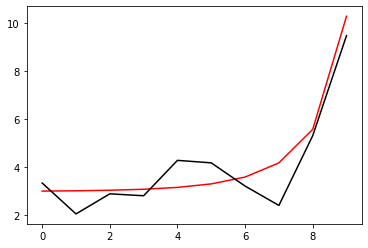

19800 0.07733883885837146
[3.34243396 2.07693202 2.89886557 2.82634164 4.29561159 4.19510987
 3.2296643  2.42304748 5.32716819 9.49365739]


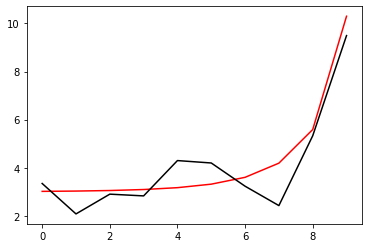

20900 0.054728546250192356
[3.33504447 2.09055086 2.89778776 2.83242934 4.29716316 4.19936648
 3.23529886 2.42945788 5.33228855 9.49361342]


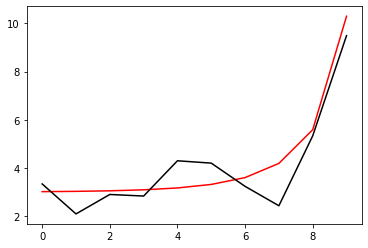

22000 0.031208743171649147
[3.32256886 2.09958382 2.89366453 2.83607602 4.29704297 4.20226042
 3.23971708 2.43476426 5.33663459 9.49356949]


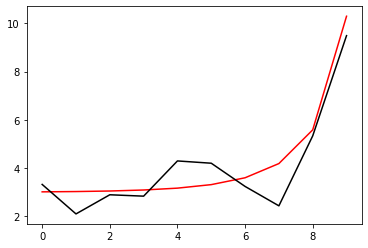

23100 0.027687807049700846
[3.30916694 2.10777723 2.88934254 2.83963575 4.29700496 4.20530323
 3.24434577 2.44032806 5.3412097  9.49352561]


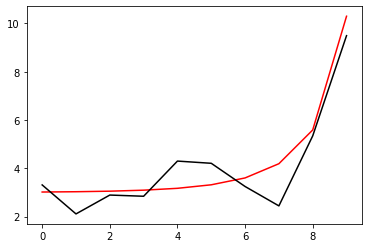

24200 0.026498947732596104
[3.30507811 2.12331731 2.89020772 2.84675728 4.29912559 4.20975236
 3.24991543 2.44643751 5.34593079 9.49348178]


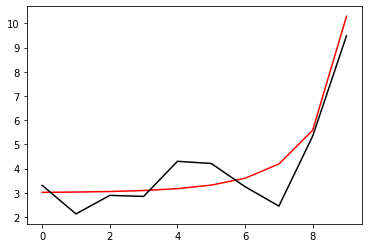

25300 0.0179312483252183
[3.29670676 2.13498803 2.88857154 2.85193241 4.29999132 4.21324893
 3.25470676 2.45191391 5.35026828 9.493438  ]


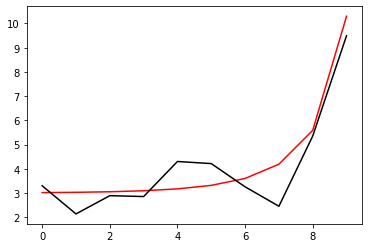

26400 0.0200973356283108
[3.28693348 2.14535603 2.88637701 2.8567625  4.30079838 4.21682905
 3.25970508 2.45770452 5.35492328 9.49339427]


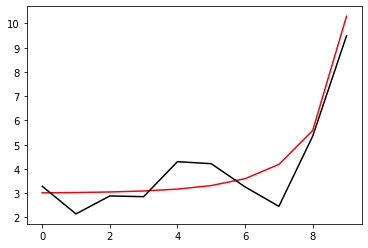

27500 0.036943222199586456
[3.2791341  2.15713184 2.88535315 2.8623076  4.30200398 4.22059106
 3.26473393 2.4633886  5.35940004 9.4933506 ]


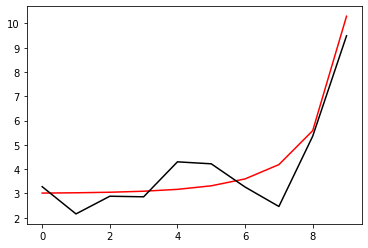

28600 0.02807735275621642
[3.26672199 2.16556951 2.88265031 2.86684351 4.30276849 4.22415452
 3.26971228 2.46912801 5.36398855 9.49330697]


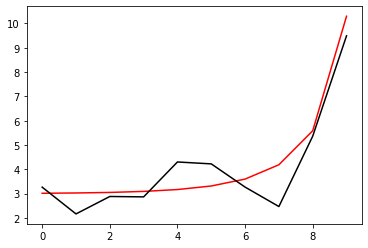

29700 0.051984262749104754
[3.27405411 2.18942375 2.89055241 2.87877987 4.30813928 4.23091566
 3.27707839 2.47659839 5.36946892 9.4932634 ]


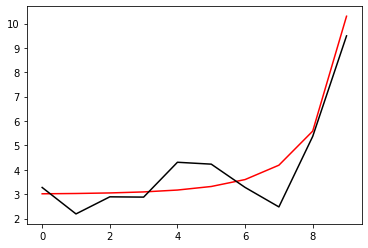

30800 0.07134945630534091
[3.27021577 2.20405765 2.89248824 2.88656325 4.31113298 4.23620256
 3.28355951 2.48367682 5.3749829  9.49321988]


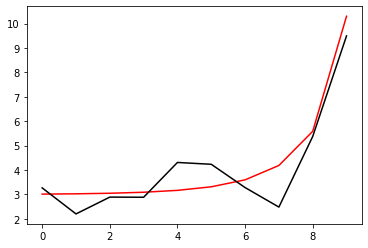

31900 0.04980547418789015
[3.26280427 2.21551588 2.89245687 2.89290666 4.3132955  4.24094511
 3.28968396 2.49055616 5.38045589 9.49317641]


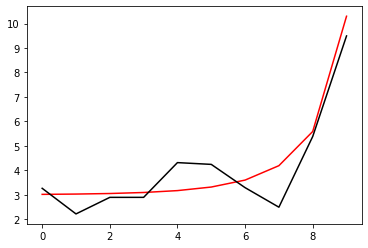

33000 0.031974372968964174
[3.25025671 2.22243308 2.88931844 2.89676685 4.31372838 4.24426357
 3.29452195 2.49625318 5.38508728 9.493133  ]


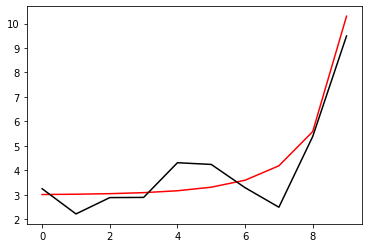

34100 0.02821778291460338
[3.23686117 2.22851839 2.8858683  2.90040673 4.31410415 4.24758628
 3.29941532 2.50204532 5.38981871 9.49308964]


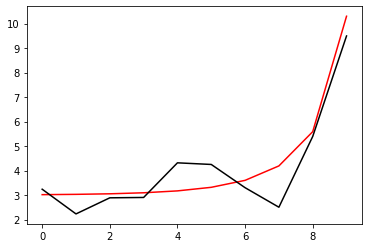

35200 0.023042443758006084
[3.22846676 2.23832519 2.88508824 2.90579    4.31549701 4.25151008
 3.30464496 2.50794762 5.39447879 9.49304633]


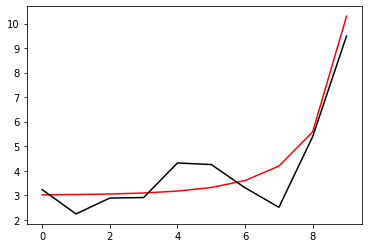

36300 0.016463117447081198
[3.21860951 2.24659857 2.88334489 2.91034727 4.31633395 4.25497885
 3.30947572 2.51349809 5.39890299 9.49300307]


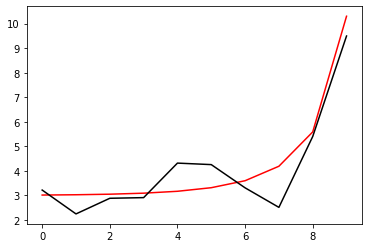

37400 0.01764063739074524
[3.21077211 2.25631557 2.88286826 2.91585459 4.31790877 4.25908005
 3.31491554 2.51964487 5.40378195 9.49295986]


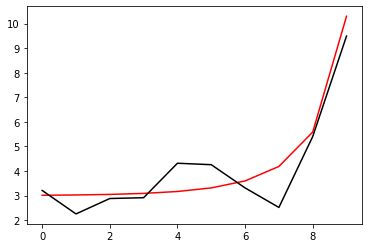

38500 0.035436951727053495
[3.20146848 2.26447749 2.88134559 2.92039579 4.31874198 4.26249084
 3.31966066 2.5250836  5.40810366 9.4929167 ]


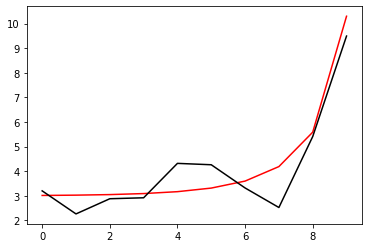

39600 0.0268389240657577
[3.18565462 2.26788536 2.87712629 2.92324456 4.31872248 4.26543827
 3.32418024 2.53047635 5.41250873 9.49287359]


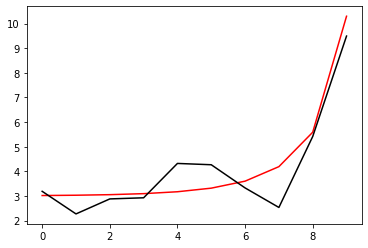

40700 0.04578125658492311
[3.18928326 2.28581364 2.88266627 2.93267692 4.32268741 4.27105232
 3.33061158 2.53718463 5.41753589 9.49283053]


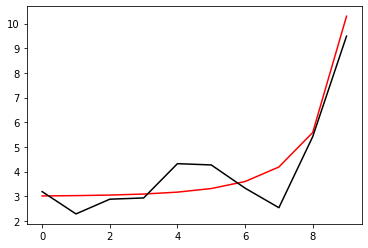

41800 0.06729722885581717
[3.18224398 2.29501657 2.88243333 2.93809371 4.32432313 4.27520699
 3.33614662 2.54346425 5.4225469  9.49278752]


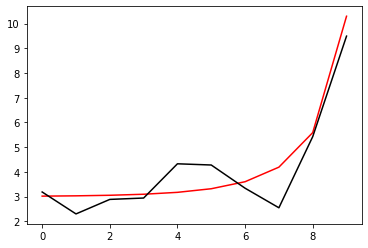

42900 0.04618498048477834
[3.17350618 2.30253488 2.88115421 2.94270519 4.32549367 4.27905522
 3.34148602 2.54964419 5.42755167 9.49274456]


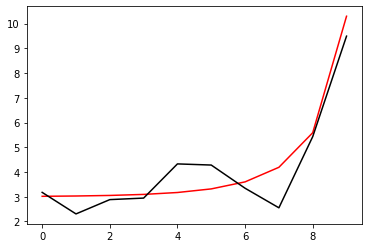

44000 0.030394429680276034
[3.16056204 2.30629456 2.87723176 2.9451902  4.32516804 4.28166962
 3.34571212 2.55480369 5.43183077 9.49270165]


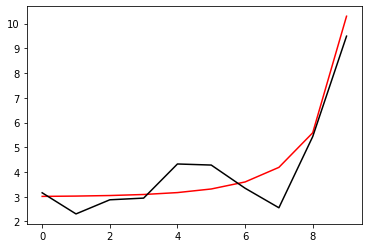

45100 0.02596626077720518
[3.14699244 2.30940621 2.87306891 2.94751073 4.32481752 4.28431505
 3.35001908 2.56008399 5.4362304  9.49265878]


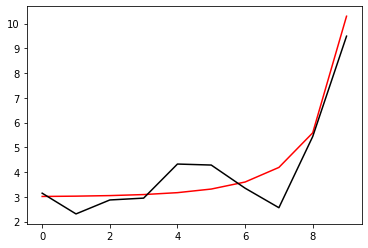

46200 0.021100551333981685
[3.13939894 2.31689931 2.87196234 2.95181114 4.32561068 4.28763477
 3.35470648 2.56549895 5.44056559 9.49261597]


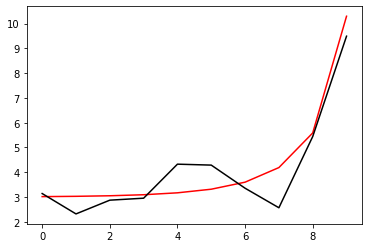

47300 0.015127570349598432
[3.13122197 2.32358221 2.87032683 2.95557989 4.32600361 4.29058545
 3.35903436 2.57056253 5.4446381  9.4925732 ]


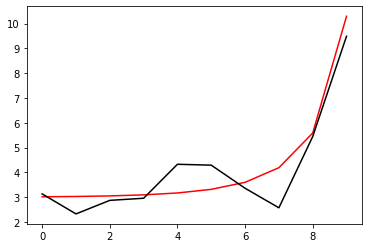

48400 0.015106879983128546
[3.12571042 2.3322403  2.8703109  2.96056351 4.3273118  4.29430512
 3.36408756 2.57632352 5.44923453 9.49253047]


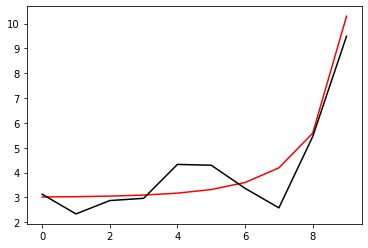

49500 0.03423125614245091
[3.118118   2.33888607 2.86887069 2.96430855 4.32768818 4.29719018
 3.36832631 2.58127687 5.45320914 9.4924878 ]


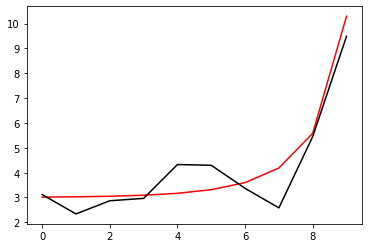

50600 0.02504307012024677
[3.10732373 2.34314795 2.86611533 2.96720643 4.32763804 4.29983353
 3.37243718 2.58618706 5.45720674 9.49244517]


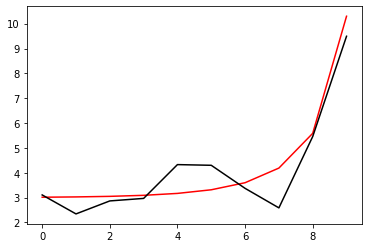

51700 0.04335927491532024
[3.1119203  2.35873928 2.87103896 2.97526537 4.33073662 4.30459577
 3.37808575 2.59218153 5.46174793 9.49240258]


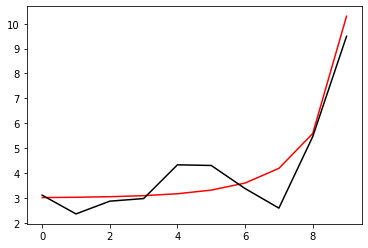

52800 0.064573754478083
[3.10538893 2.36555709 2.8701786  2.97938994 4.33158258 4.30797978
 3.38291729 2.59781786 5.46631719 9.49236004]


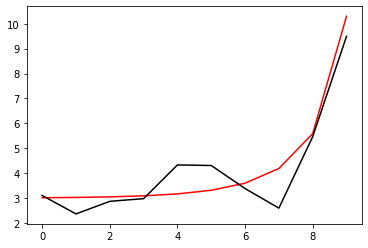

53900 0.04347442666197101
[3.09805399 2.37145989 2.86876799 2.98306245 4.33216951 4.31118942
 3.38763772 2.6033992  5.47088721 9.49231754]


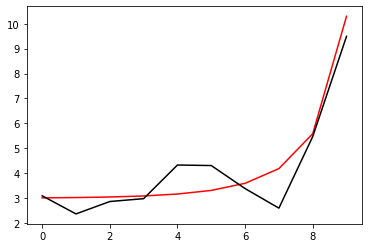

55000 0.02906011713458081
[3.08678487 2.37392118 2.86491624 2.9847968  4.33140054 4.31329378
 3.39137209 2.60808645 5.47482676 9.49227509]


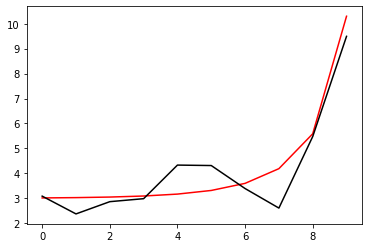

56100 0.024247674363291425
[3.07497458 2.37583304 2.86085916 2.986398   4.33062232 4.31543931
 3.39519327 2.612897   5.47888674 9.49223269]


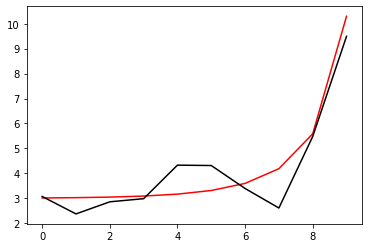

57200 0.019667173630224865
[3.06989993 2.38263264 2.86015841 2.99015632 4.33107843 4.3183051
 3.3994155  2.61784548 5.48287435 9.49219032]


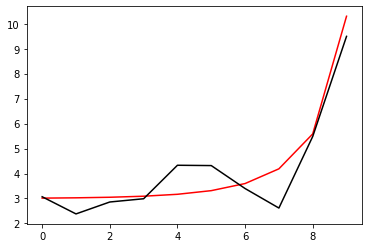

58300 0.014274168837621205
[3.06420168 2.38867374 2.85895313 2.99341473 4.33114827 4.32080634
 3.40327312 2.62242789 5.48658019 9.492148  ]


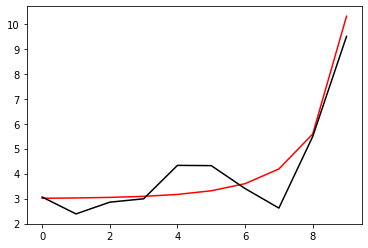

59400 0.012900132869660626
[3.06111458 2.39671353 2.85940181 2.99794024 4.33218473 4.32412762
 3.40790875 2.62776163 5.49085342 9.49210573]


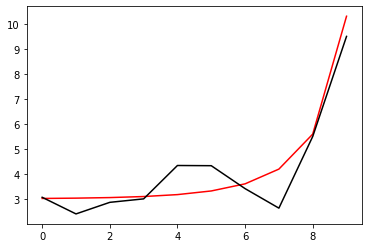

60500 0.033426692526439955
[3.05532037 2.4023118  2.85809246 3.00100186 4.33213957 4.32650769
 3.41164681 2.6322231  5.49446563 9.49206349]


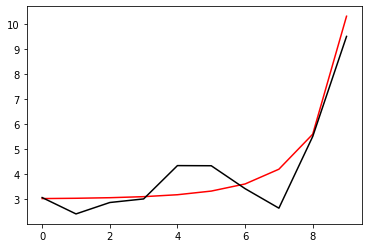

61600 0.024042438144592154
[3.0476453  2.40648229 2.85601754 3.00355528 4.33183842 4.32873531
 3.41529703 2.63664398 5.498078   9.4920213 ]


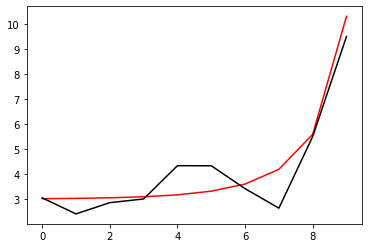

62700 0.041249015026251654
[3.05351351 2.42042165 2.86053386 3.01048314 4.33419528 4.33273862
 3.42023171 2.64197353 5.50215455 9.49197914]


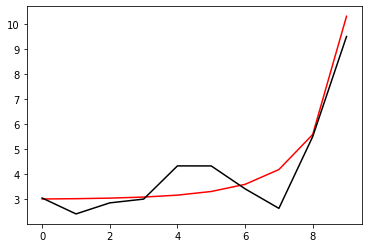

63800 0.06259745388569571
[3.04726019 2.42512639 2.85898953 3.01336946 4.33425723 4.33535784
 3.424358   2.64695707 5.50626629 9.49193703]


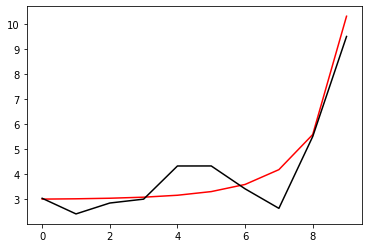

64900 0.04151098245208492
[3.04101129 2.42960187 2.85735218 3.01613222 4.33425921 4.33793606
 3.42846584 2.65194453 5.51040112 9.49189496]


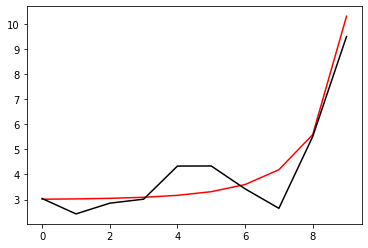

66000 0.02830058852778457
[3.03125806 2.43105915 2.85356145 3.01720148 4.3330819  4.3395617
 3.43173164 2.65617506 5.51400559 9.49185293]


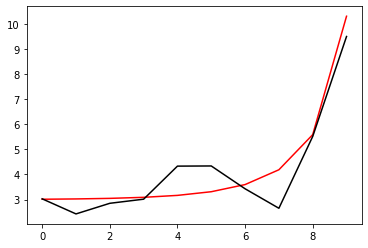

67100 0.02329609291975725
[3.02131748 2.4322371  2.84970903 3.01823261 4.33194557 4.34125883
 3.43510283 2.66053882 5.5177329  9.49181094]


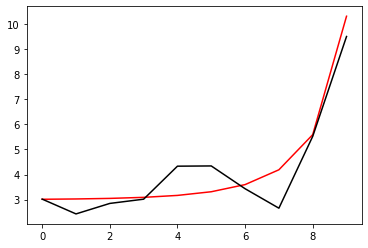

68200 0.01859614904998551
[3.01859932 2.43861902 2.84940335 3.02153256 4.33210203 4.34370615
 3.43888932 2.66504462 5.52138526 9.49176899]


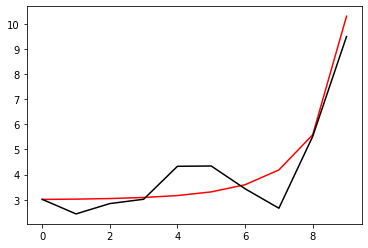

69300 0.013712026629128531
[3.01482216 2.44401791 2.84845441 3.02426742 4.33184046 4.34577453
 3.44230467 2.669182   5.52475529 9.49172708]


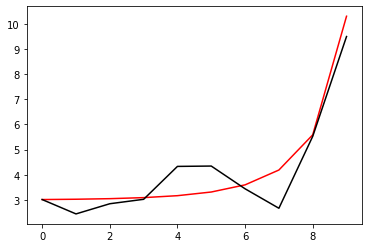

70400 0.01111019031640156
[3.01273676 2.45075882 2.84871115 3.0279756  4.3323729  4.34855252
 3.44642431 2.6740263  5.52867865 9.49168521]


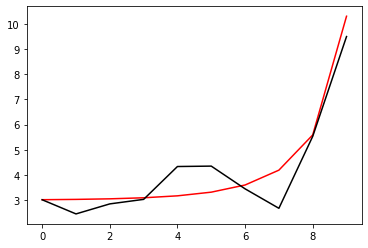

71500 0.03288489700844307
[3.00824408 2.45536135 2.8474044  3.03037325 4.33191858 4.35045809
 3.44969891 2.67803689 5.5319598  9.49164338]


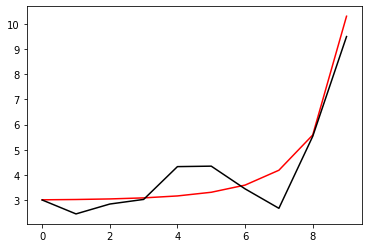

72600 0.023412713602803264
[3.00246087 2.45897824 2.84558283 3.03242279 4.33129097 4.35225761
 3.45291024 2.68201485 5.53523615 9.49160158]


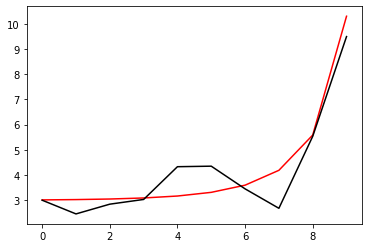

73700 0.039446930941730546
[3.00991118 2.4719874  2.85005466 3.03860208 4.3331579  4.35570951
 3.45730993 2.68683262 5.53894567 9.49155982]


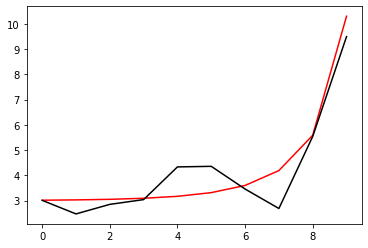

74800 0.06125884440048333
[3.0039152  2.47500453 2.84797045 3.04046377 4.33257245 4.35768352
 3.46083693 2.6912561  5.54265927 9.4915181 ]


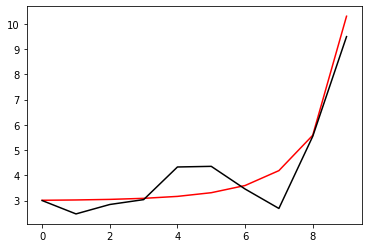

75900 0.0401283500274719
[2.99839934 2.47820282 2.84606776 3.04240142 4.33204907 4.35969911
 3.46440366 2.6957215  5.54641137 9.49147642]


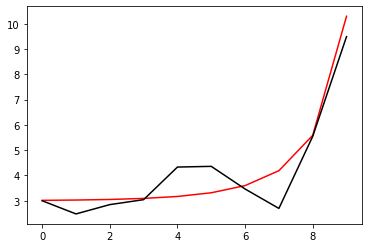

77000 0.027869943820430555
[2.98982894 2.47880167 2.84230224 3.04288508 4.33051742 4.36090659
 3.46726188 2.69955478 5.54972295 9.49143477]


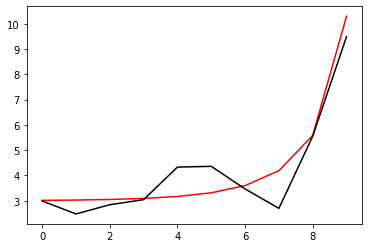

78100 0.0227415714930969
[2.98148006 2.47942094 2.83864363 3.0434399  4.32908554 4.36222099
 3.47024724 2.703533   5.55316029 9.49139316]


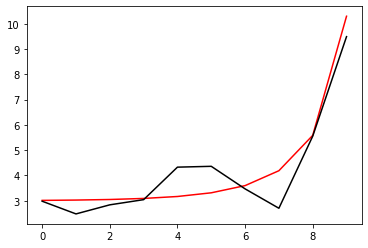

79200 0.017763156558334343
[2.98056773 2.48538026 2.83861772 3.04631445 4.32897486 4.36430022
 3.47365535 2.7076566  5.55652325 9.49135159]


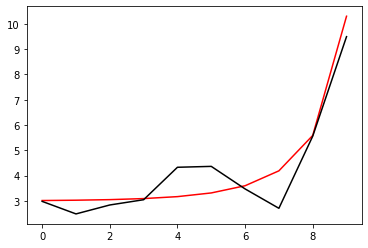

80300 0.013310619759749762
[2.97812852 2.49010226 2.83779185 3.04854742 4.32841024 4.36598651
 3.47668979 2.71141658 5.55961108 9.49131005]


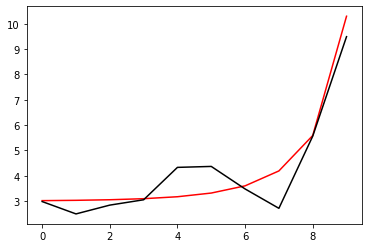

81400 0.009814731238704624
[2.97593607 2.49508795 2.83740719 3.05122825 4.32831117 4.36815695
 3.4802623  2.71576461 5.56319212 9.49126855]


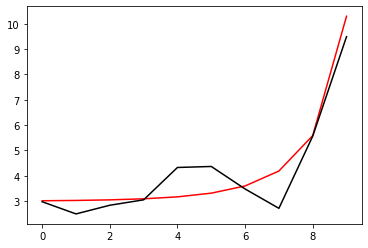

82500 0.0325069710488014
[2.97242933 2.49884358 2.83609477 3.05306383 4.32752321 4.36966889
 3.48315493 2.71940423 5.56620026 9.49122709]


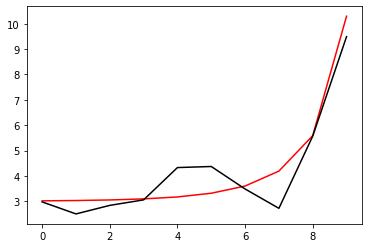

83600 0.02298074299714506
[2.96801112 2.50190348 2.83443304 3.05465996 4.32661985 4.37110903
 3.48600437 2.72302052 5.56920352 9.49118566]


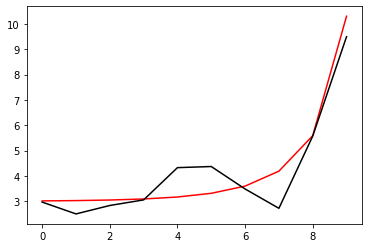

84700 0.03793269154449193
[2.97729302 2.51458519 2.83918877 3.06043708 4.32823294 4.37420667
 3.49004148 2.72747633 5.57264377 9.49114426]


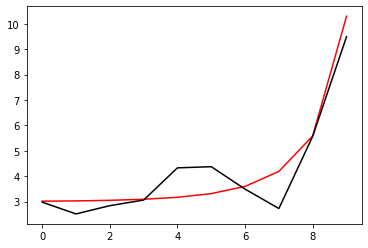

85800 0.06035667618880933
[2.97162188 2.5163532  2.83677193 3.06152874 4.3271751  4.37568848
 3.49310744 2.73146394 5.57604299 9.4911029 ]


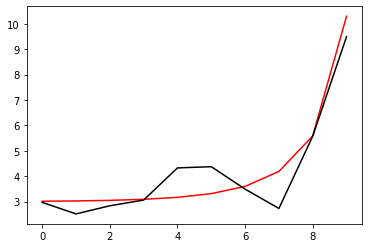

86900 0.039148163055768154
[2.96661486 2.51847669 2.83465044 3.06278235 4.32623166 4.37724716
 3.49623753 2.73550867 5.57948595 9.49106157]


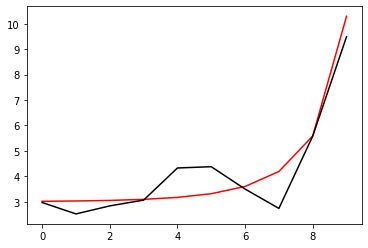

88000 0.02760247247932031
[2.95893131 2.51834768 2.8309095  3.06278132 4.32442225 4.37811723
 3.49876887 2.73902332 5.58256162 9.49102028]


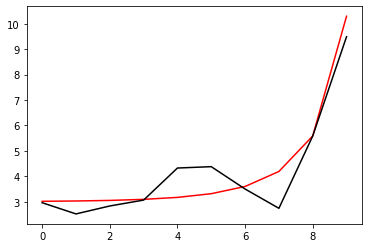

89100 0.022358307412322684
[2.95179047 2.51847574 2.82741171 3.06294093 4.3227618  4.37912435
 3.50144631 2.74269356 5.5857662  9.49097902]


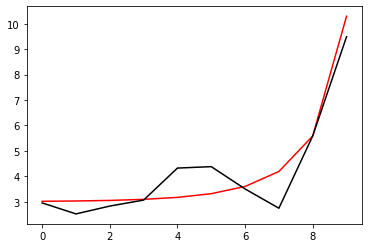

90200 0.017098760370855254
[2.9521534  2.52398568 2.82757762 3.06543937 4.32243485 4.38090239
 3.5045495  2.74651095 5.58889755 9.49093779]


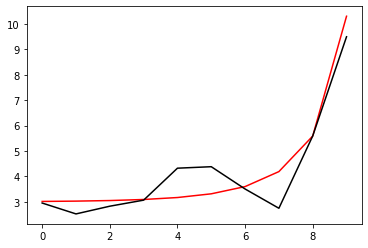

91300 0.013011066314952857
[2.95065207 2.52808296 2.8268349  3.06724732 4.3216332  4.3822829
 3.50728316 2.74997446 5.59176392 9.4908966 ]


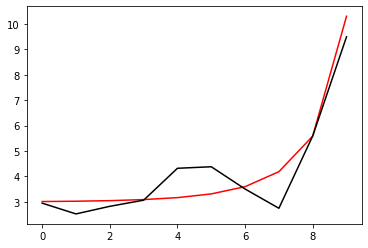

92400 0.0088955887535232
[2.94800774 2.53140432 2.82578475 3.0689854  4.32096854 4.38391972
 3.51038438 2.75390105 5.595057   9.49085544]


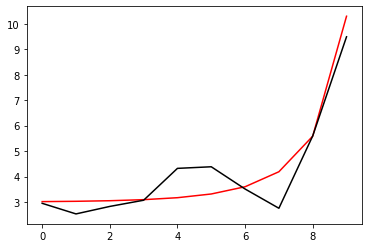

93500 0.03223709453788307
[2.94526437 2.53447857 2.8245046  3.07038371 4.31994087 4.38513164
 3.51298647 2.75725741 5.59785532 9.49081431]


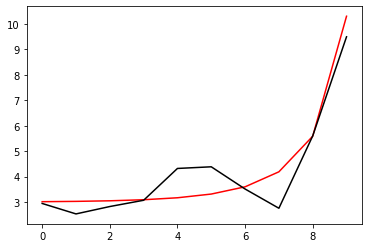

94600 0.022676162028594928
[2.94186582 2.53705665 2.82298953 3.07161944 4.31883961 4.38629735
 3.51556123 2.76059887 5.60065029 9.49077322]


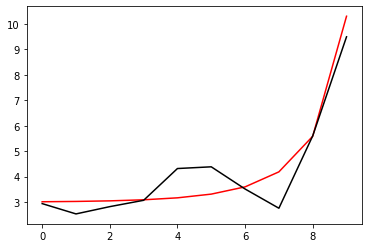

95700 0.036659644424463886
[2.95286019 2.5496722  2.82815301 3.07718643 4.32034071 4.38917067
 3.51935661 2.76480373 5.60389818 9.49073216]


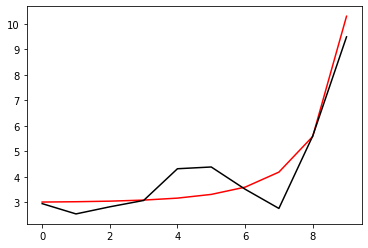

96800 0.05972192683928005
[2.94750762 2.5505107  2.82555959 3.07771522 4.31895883 4.39029375
 3.52208497 2.76846891 5.607062   9.49069113]


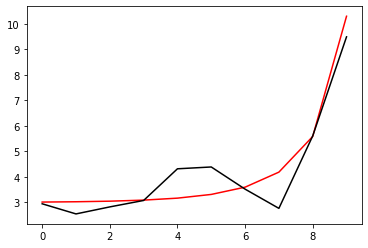

97900 0.03843019794869167
[2.9428518  2.55175513 2.82329028 3.07843142 4.31770615 4.39150332
 3.52488324 2.7721936  5.61026876 9.49065014]


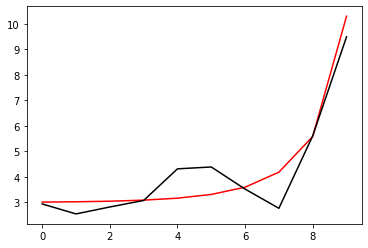

99000 0.027414106508210478
[2.93580868 2.55101211 2.81958832 3.07804652 4.31569749 4.39211691
 3.52716803 2.77546762 5.61316549 9.49060917]


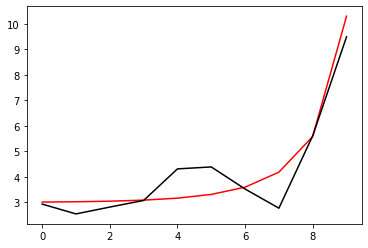

100100 0.022050216041860464
[2.92952369 2.5506882  2.81622362 3.07788545 4.31387305 4.39288938
 3.52961271 2.778905   5.61619346 9.49056824]


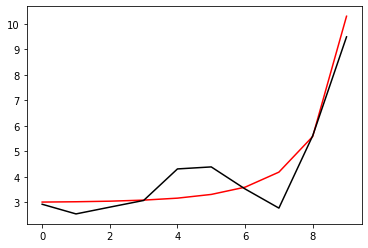

101200 0.0165581305177423
[2.93076667 2.55576003 2.81653615 3.08007135 4.31338796 4.39443456
 3.53248291 2.78248878 5.61914784 9.49052734]


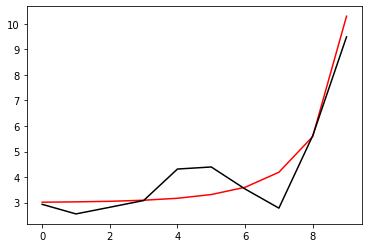

102300 0.012780697853300643
[2.92994055 2.55932311 2.81587943 3.08154459 4.31242127 4.39558519
 3.53499197 2.78573048 5.6218478  9.49048647]


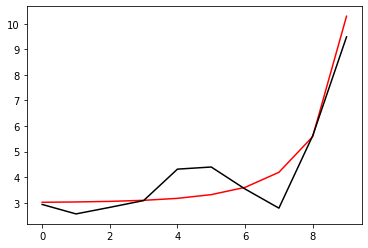

103400 0.008225895321574937
[2.9268651  2.56128703 2.81431523 3.08253369 4.31132674 4.39680851
 3.53773092 2.78933379 5.62491963 9.49044563]


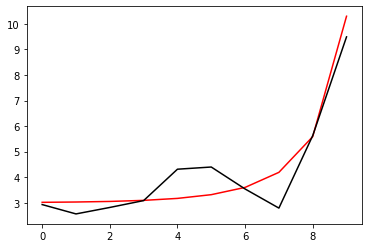

104500 0.0320398411326586
[2.92470067 2.56381019 2.81309697 3.08359807 4.31013762 4.39779879
 3.54011908 2.79248059 5.62756168 9.49040482]


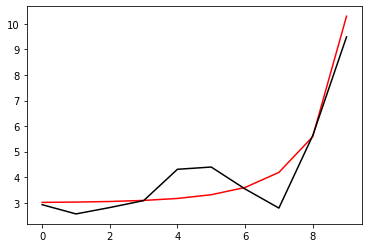

105600 0.022455932710552885
[2.92205869 2.5659769  2.8117232  3.08455402 4.30890446 4.39876119
 3.54249144 2.79561887 5.63020189 9.49036405]


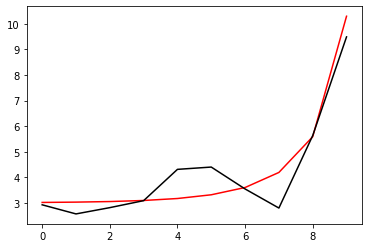

106700 0.03559437393147417
[2.93445445 2.57857778 2.81728494 3.08999384 4.31036371 4.40148535
 3.54612101 2.79964716 5.63331212 9.4903233 ]


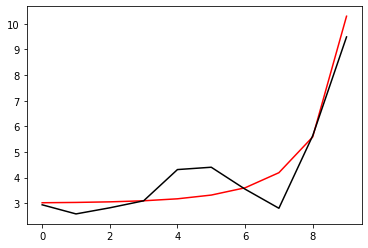

107800 0.059244047839154435
[2.92937224 2.57870365 2.8146101  3.09010593 4.30876372 4.40234786
 3.54860408 2.80307626 5.63630195 9.49028259]


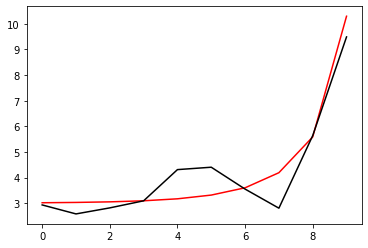

108900 0.03787808928983676
[2.9249606  2.57923463 2.81225247 3.09040467 4.307291   4.40329469
 3.551154   2.80656083 5.63933059 9.4902419 ]


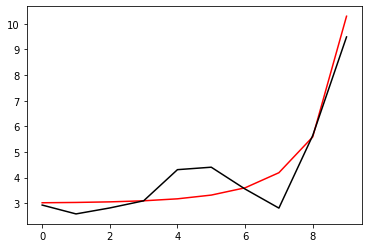

110000 0.02725968640348276
[2.91837394 2.57797304 2.8085993  3.08971601 4.30514429 4.40371531
 3.55325524 2.80965564 5.6420936  9.49020125]


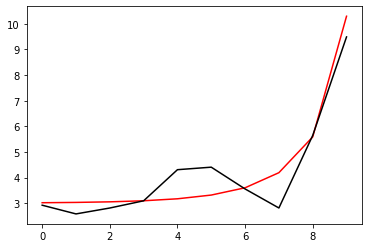

111100 0.021776452052568607
[2.91269425 2.57724464 2.80534989 3.08929654 4.30320715 4.40431027
 3.55552572 2.81291853 5.64498867 9.49016063]


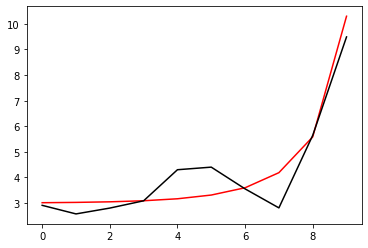

112200 0.016109274297617323
[2.91456802 2.58192591 2.80578986 3.09123024 4.30261304 4.40567744
 3.55821902 2.81632444 5.64780769 9.49012003]


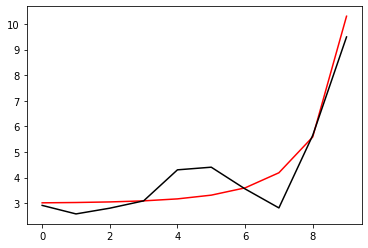

113300 0.012598740738511471
[2.91425003 2.58504916 2.80522855 3.0924442  4.30153798 4.40665677
 3.56056132 2.8194005  5.65038246 9.49007947]


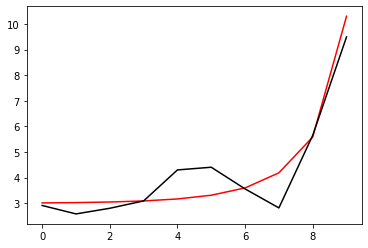

114400 0.007717897519528471
[2.91085024 2.58595817 2.80330646 3.09286246 4.30013497 4.40757073
 3.56303032 2.82276223 5.65328796 9.49003894]


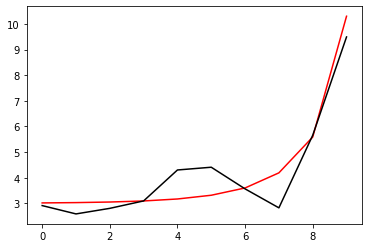

115500 0.031891903189115306
[2.90912389 2.58802968 2.80216273 3.09366641 4.29883843 4.4083948
 3.56525895 2.82575217 5.65581238 9.48999843]


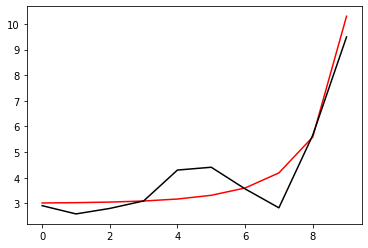

116600 0.022292030256115345
[2.90705083 2.58984766 2.8009212  3.09440147 4.29751925 4.40920416
 3.56747998 2.82873805 5.65833594 9.48995796]


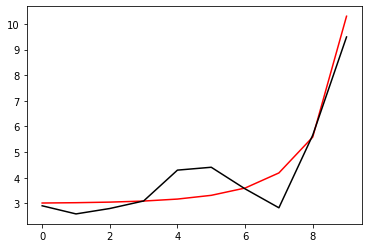

117700 0.03470682763785994
[2.92052038 2.60240837 2.80681845 3.09974107 4.29896497 4.41181864
 3.57098742 2.83263537 5.66134371 9.48991751]


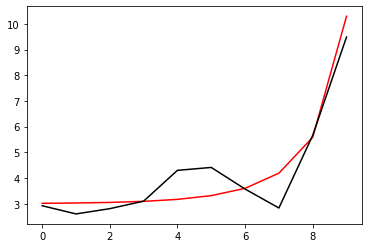

118800 0.05885736699775429
[2.91565612 2.60197212 2.8041136  3.09953372 4.297216   4.41248655
 3.57328795 2.83588792 5.66420254 9.4898771 ]


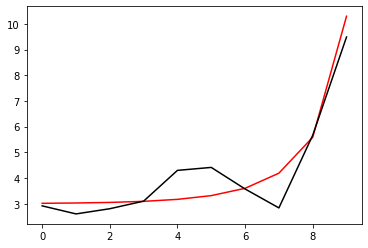

119900 0.03743085646417646
[2.91142283 2.60192521 2.80170873 3.09950375 4.29558662 4.41323225
 3.57564872 2.83918902 5.6670943  9.48983671]


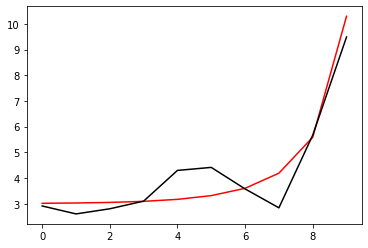

121000 0.02711574600505814
[2.90516506 2.60022507 2.79810579 3.09856864 4.29334329 4.41350385
 3.57761004 2.84214741 5.66975532 9.48979636]


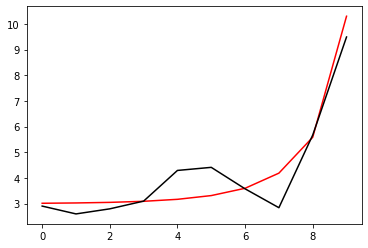

122100 0.021518935196906022
[2.89993454 2.59915052 2.79496107 3.09793984 4.29133005 4.41396182
 3.57974721 2.84527632 5.67254777 9.48975603]


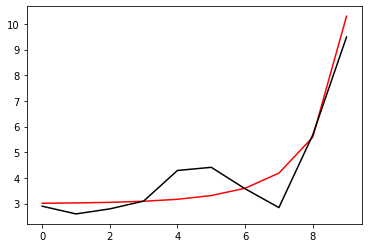

123200 0.015729409984085528
[2.90229191 2.60350482 2.79551986 3.0996706  4.29066268 4.41519011
 3.58230274 2.84854284 5.6752599  9.48971573]


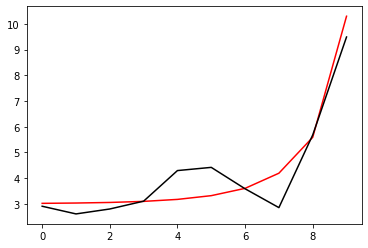

124300 0.012451376056221332
[2.90237475 2.60627257 2.79505846 3.10068094 4.28951809 4.41603863
 3.58451786 2.85149167 5.67773768 9.48967546]


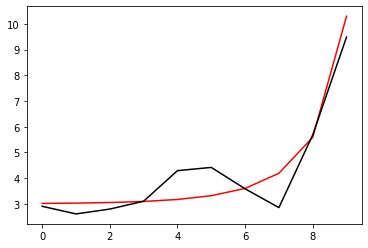

125400 0.007314865676461424
[2.89875032 2.60636747 2.79289495 3.10066234 4.28789529 4.41671898
 3.58678341 2.85467034 5.68051604 9.48963522]


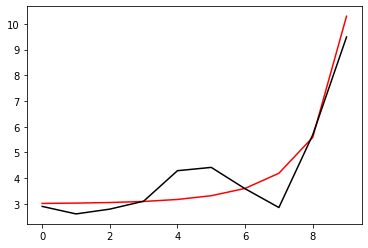

126500 0.0317779809507985
[2.89735954 2.60806532 2.79182645 3.10125606 4.28652597 4.41741359
 3.58888869 2.85753873 5.68294892 9.48959501]


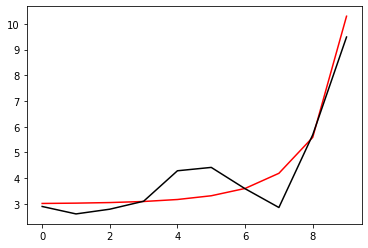

127600 0.022166620477537327
[2.89572531 2.60959025 2.79070494 3.10181151 4.28515035 4.4181034
 3.59099233 2.86040612 5.68538137 9.48955483]


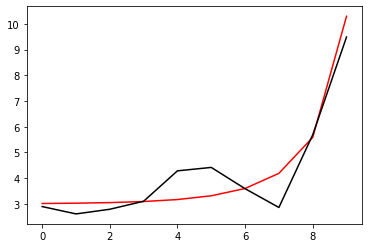

128700 0.03396637168260822
[2.90998926 2.62206956 2.79686348 3.10705386 4.28658997 4.42062753
 3.59440164 2.86419927 5.68830829 9.48951467]


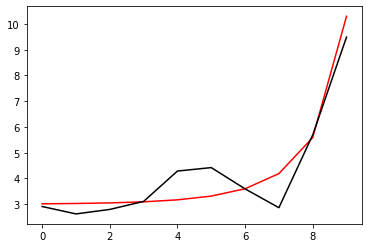

129800 0.05852442031371156
[2.90529781 2.62118017 2.79415389 3.10659174 4.284736   4.42114419
 3.59656116 2.86731511 5.6910652  9.48947454]


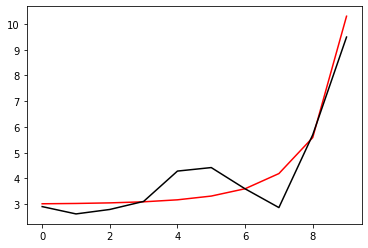

130900 0.03705142216752299
[2.9012042  2.62066592 2.79172846 3.10629768 4.28299348 4.4217314
 3.59877337 2.87047145 5.69384822 9.48943445]


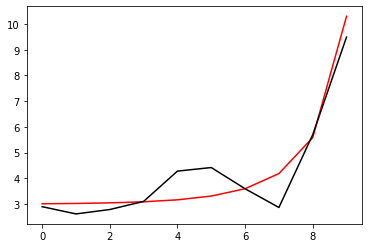

132000 0.026970981656228115
[2.89518782 2.61859455 2.78817163 3.10515659 4.2806804  4.42188339
 3.60062393 2.87332217 5.69642865 9.48939438]


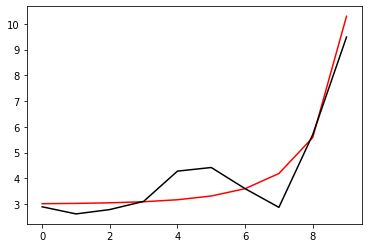

133100 0.02126923375085201
[2.89031215 2.61723479 2.78512477 3.10435658 4.27861637 4.42223236
 3.60265549 2.87634432 5.69913866 9.48935433]


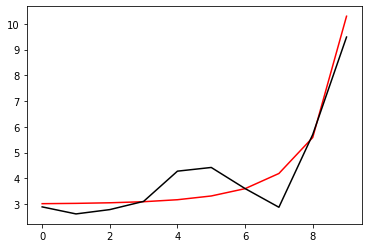

134200 0.015402455345339922
[2.8930642  2.62132645 2.78579673 3.10592257 4.27790039 4.4233488
 3.60509971 2.87949726 5.70176288 9.48931432]


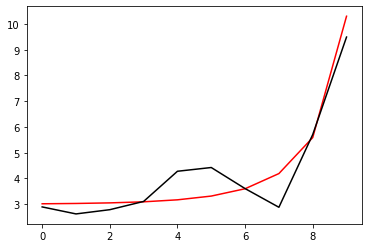

135300 0.012329221242691986
[2.89347531 2.62380984 2.78543449 3.10676937 4.27671184 4.42409382
 3.60721414 2.88234453 5.7041625  9.48927433]


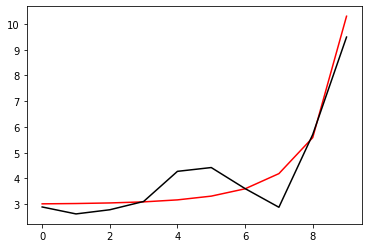

136400 0.006980601502984456
[2.88970136 2.62327267 2.78310919 3.10641009 4.27493071 4.42459324
 3.60932211 2.88538037 5.70684059 9.48923438]


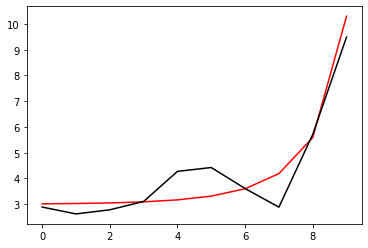

137500 0.03168791541783218
[2.88857119 2.62465953 2.78211043 3.10682855 4.27351059 4.42518278
 3.61132799 2.88815073 5.70919933 9.48919445]


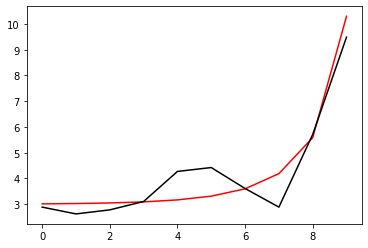

138600 0.02206822862186035
[2.88728398 2.62594029 2.78109578 3.10723398 4.27209749 4.42577544
 3.61333682 2.89092221 5.71155769 9.48915454]


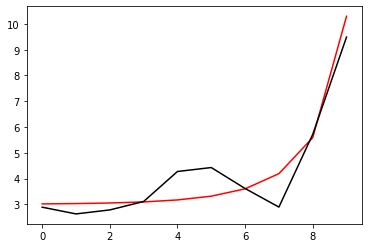

139700 0.033344353670341824
[2.90212014 2.63830205 2.78744694 3.11237405 4.27352958 4.42821845
 3.6166612  2.89462704 5.714417   9.48911467]


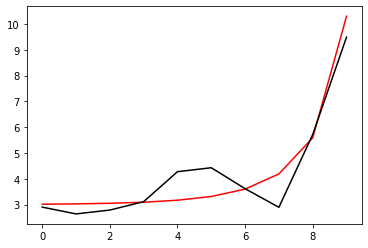

140800 0.05822390770852084
[2.89756482 2.637042   2.78474393 3.11170195 4.27159913 4.42861299
 3.61870763 2.89763308 5.71709174 9.48907482]


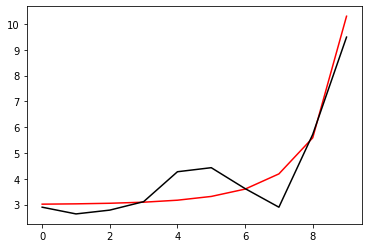

141900 0.03671741848515826
[2.89358831 2.63615119 2.78231561 3.11119211 4.26977389 4.42907166
 3.62079939 2.90067133 5.71978524 9.489035  ]


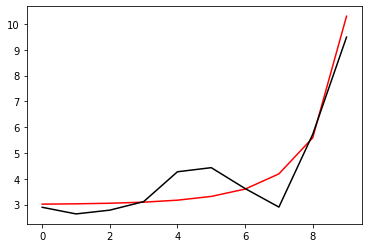

143000 0.026820553570134534
[2.88775224 2.63376582 2.77879878 3.10987491 4.26740884 4.42912422
 3.62255894 2.90343381 5.72229954 9.48899521]


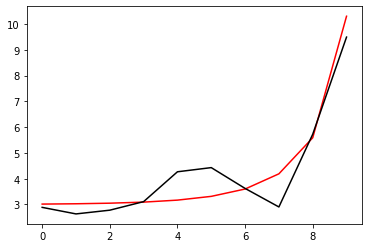

144100 0.021023342996950425
[2.88317222 2.63217801 2.77584473 3.10893365 4.26531171 4.42938386
 3.62450388 2.90636766 5.72494062 9.48895544]


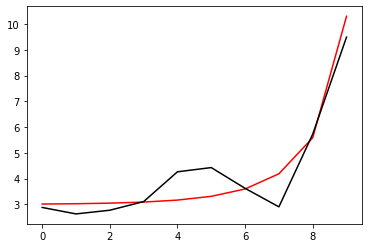

145200 0.015116964776731277
[2.88626013 2.63606458 2.77662447 3.11036429 4.26456408 4.43040733
 3.62685494 2.90942458 5.72748972 9.48891571]


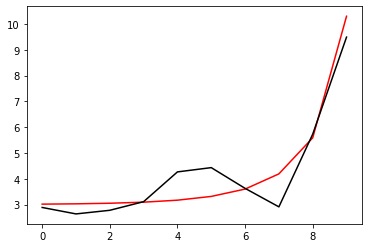

146300 0.01222580822129915
[2.8869468  2.63832228 2.77635747 3.11107711 4.26334858 4.43106766
 3.6288867  2.91218773 5.72982392 9.488876  ]


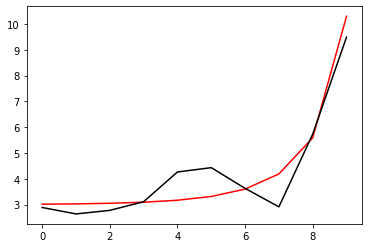

147400 0.0066920557118018064
[2.88307655 2.63729064 2.77392422 3.11044685 4.26145189 4.43142311
 3.63086892 2.91510847 5.73242012 9.48883631]


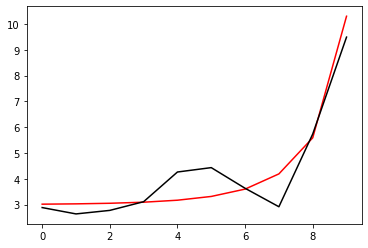

148500 0.03161482885003316
[2.88215043 2.63841776 2.77298746 3.11071572 4.25999541 4.43192435
 3.63279173 2.91779679 5.73471653 9.48879666]


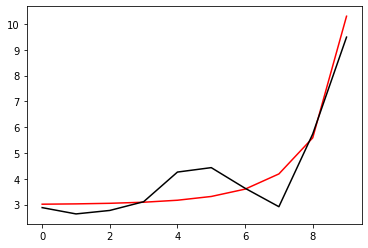

149600 0.02198926366694693
[2.88114286 2.63949657 2.77206722 3.11099346 4.25855741 4.43243539
 3.63472119 2.92048778 5.73701235 9.48875703]


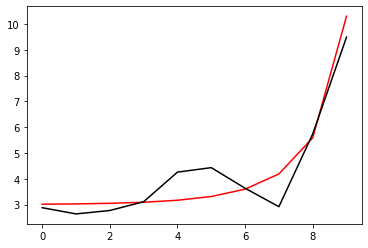

150700 0.03281620392043537
[2.89637821 2.65171446 2.77855326 3.11602539 4.25997782 4.43480205
 3.63796844 2.92411416 5.73981246 9.48871743]


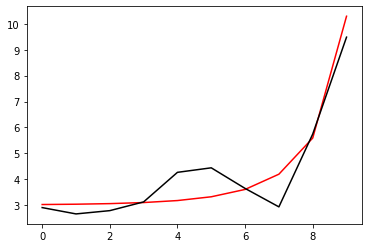

151800 0.05794358810541846
[2.89192963 2.6501487  2.77586157 3.11517624 4.25799032 4.43509489
 3.63992118 2.92702912 5.74241872 9.48867785]


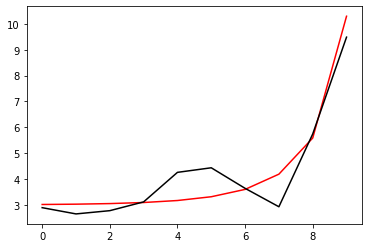

152900 0.036415276699502196
[2.88805696 2.64895672 2.77344302 3.11448835 4.25610451 4.43544695
 3.64191259 2.92996805 5.74503603 9.4886383 ]


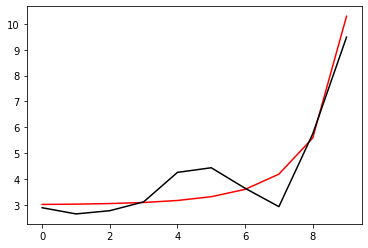

154000 0.02666300563235229
[2.88235771 2.6463067  2.76996048 3.11301865 4.25370009 4.43541462
 3.64359508 2.93265583 5.74749408 9.48859878]


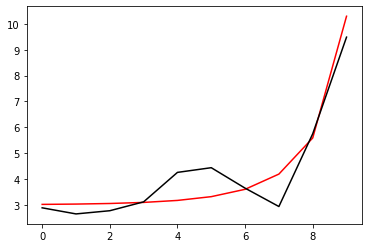

155100 0.020779479428350275
[2.87803269 2.64454107 2.76709503 3.11196025 4.25158262 4.43559928
 3.64546683 2.9355142  5.75007548 9.48855929]


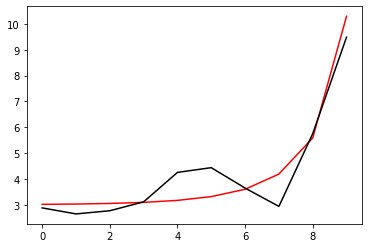

156200 0.014864636776384929
[2.88141219 2.64827066 2.76797665 3.11327847 4.25081522 4.43654344
 3.64773759 2.93848745 5.75255833 9.48851982]


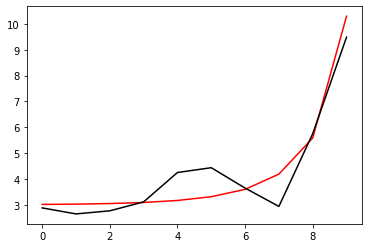

157300 0.012136615748142583
[2.88233323 2.65035062 2.76779959 3.11388004 4.24958456 4.43713258
 3.6496994  2.94117869 5.75483594 9.48848038]


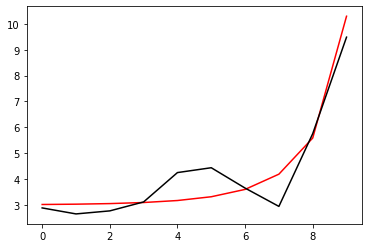

158400 0.006434551650067624
[2.87840391 2.64893031 2.76529581 3.11303097 4.24760294 4.43737075
 3.65157851 2.94400384 5.75736298 9.48844096]


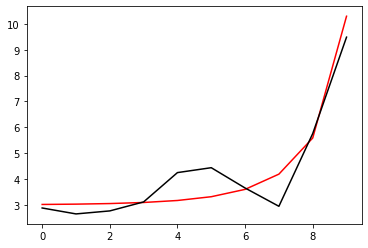

159500 0.03155397500004527
[2.87763753 2.64983995 2.76441312 3.11317029 4.24612015 4.43779586
 3.65342985 2.9466214  5.75960529 9.48840157]


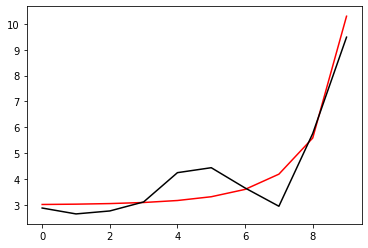

160600 0.021924556512295443
[2.87685795 2.65075294 2.76357638 3.1133382  4.24466615 4.4382367
 3.65529101 2.94924279 5.76184661 9.48836221]


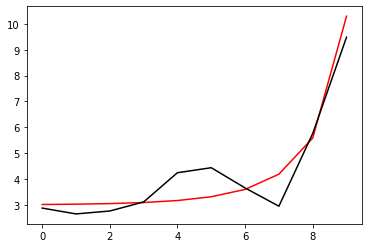

161700 0.03236195065964884
[2.89235794 2.66280979 2.77015099 3.11825797 4.24607071 4.44053006
 3.65846629 2.95279739 5.76459317 9.48832287]


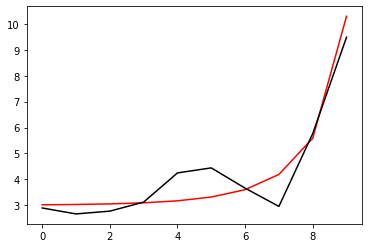

162800 0.05767637972043091
[2.88799286 2.66099125 2.76747284 3.11725774 4.24404034 4.44073638
 3.66033945 2.95563469 5.76714058 9.48828356]


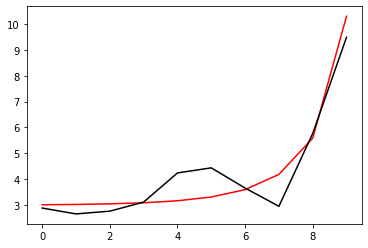

163900 0.036136705467385045
[2.88421617 2.65956131 2.76507411 3.11642259 4.24211094 4.44099854
 3.66224543 2.95848791 5.76969114 9.48824428]


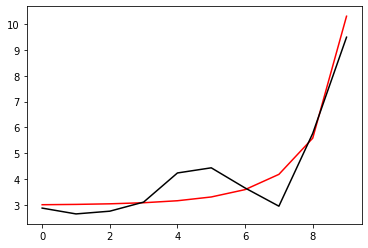

165000 0.02649864935953837
[2.87862242 2.6566898  2.76162186 3.11482039 4.23967689 4.44089255
 3.66386114 2.9611107  5.77209985 9.48820502]


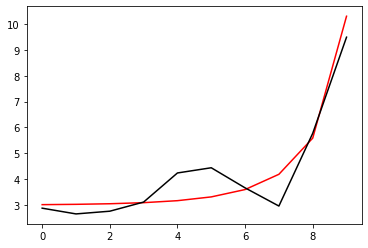

166100 0.020537044381766713
[2.87452103 2.65478863 2.75884118 3.11366466 4.23754864 4.4410131
 3.66566959 2.96390283 5.77462803 9.48816579]


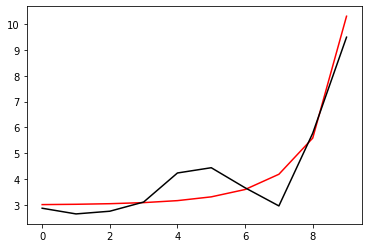

167200 0.014639316286203217
[2.87815449 2.6583997  2.75981821 3.11488865 4.23677002 4.44188822
 3.66786951 2.96680138 5.77705098 9.48812659]


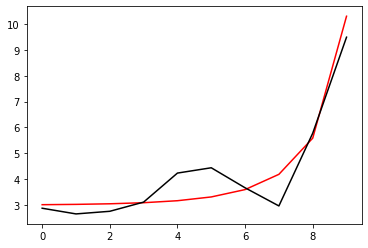

168300 0.01205843863738971
[2.87927583 2.66034087 2.75972556 3.11539722 4.23553278 4.44241637
 3.66977071 2.96942956 5.77927825 9.48808741]


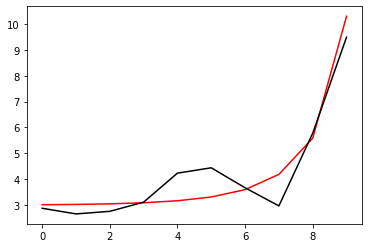

169400 0.00619876733542574
[2.87531373 2.65861503 2.75717843 3.11436995 4.23348909 4.44255729
 3.67156334 2.97217318 5.7817451  9.48804826]


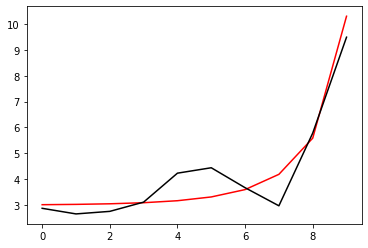

170500 0.031502025069728434
[2.87467122 2.65934223 2.75634275 3.11439622 4.23198747 4.44291559
 3.67335185 2.97472821 5.78393917 9.48800913]


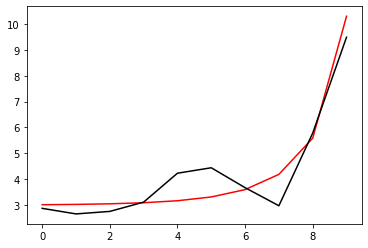

171600 0.02187049721908877
[2.87407853 2.66012003 2.75558044 3.11446934 4.23052422 4.44329504
 3.67515298 2.97728796 5.7861317  9.48797003]


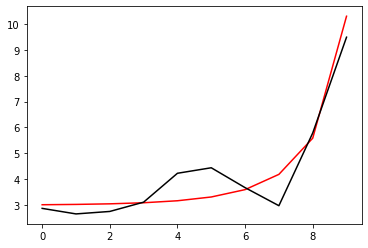

172700 0.031965817930887444
[2.88973777 2.67200567 2.76220739 3.11927543 4.23190983 4.44551775
 3.67826026 2.9807757  5.78882873 9.48793095]


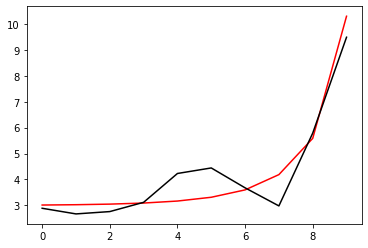

173800 0.05741822921519023
[2.8854381  2.6699787  2.75954459 3.11814583 4.22984767 4.44564942
 3.68006451 2.98354521 5.79132421 9.4878919 ]


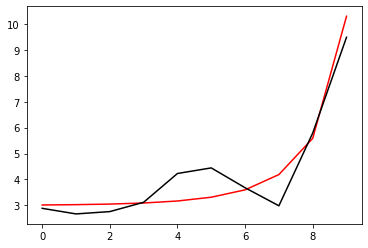

174900 0.03587661498965675
[2.88175274 2.66836419 2.75717442 3.11718945 4.22788834 4.44583501
 3.68189649 2.98632285 5.79381476 9.48785288]


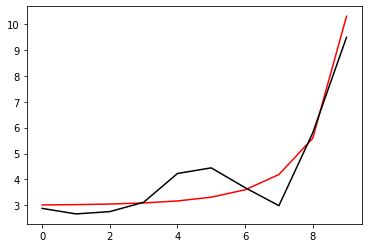

176000 0.02632869806276906
[2.87624202 2.66530935 2.75375056 3.11547267 4.22543282 4.44566451
 3.68345341 2.98888786 5.79617897 9.48781388]


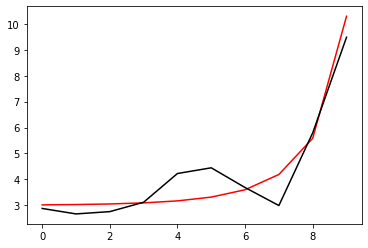

177100 0.020296090121791763
[2.8723373  2.66330707 2.75105099 3.11423614 4.2233012  4.44572953
 3.68520603 2.99162056 5.79865853 9.4877749 ]


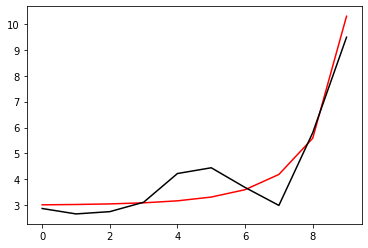

178200 0.014436342075836037
[2.87619004 2.66682925 2.75211654 3.11538057 4.22251768 4.4465436
 3.68734234 2.99445117 5.80102627 9.48773596]


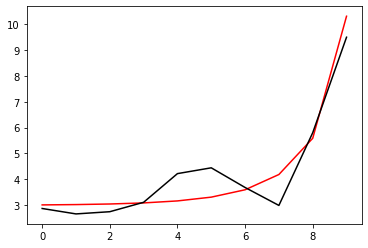

179300 0.01198896777045953
[2.87748243 2.66866325 2.75210312 3.11581136 4.22128047 4.4470188
 3.68919007 2.99702286 5.80320774 9.48769704]


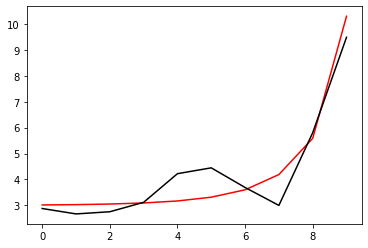

180400 0.005978829370604309
[2.87350658 2.66669847 2.74953347 3.1146387  4.21919245 4.44707803
 3.6909088  2.99969532 5.80562074 9.48765814]


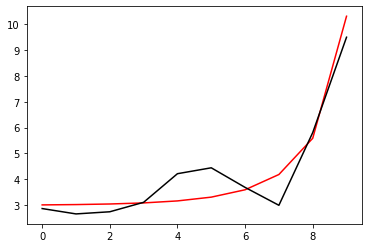

181500 0.031456613180805205
[2.87295819 2.66727234 2.74873893 3.1145661  4.21767797 4.44737704
 3.69264116 3.00219399 5.8077708  9.48761927]


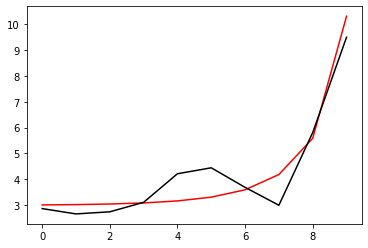

182600 0.0218245100512435
[2.8725187  2.66794079 2.74804377 3.11455759 4.21621093 4.44770229
 3.6943887  3.00469811 5.8099187  9.48758042]


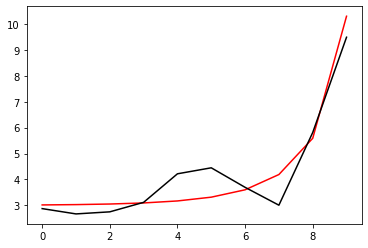

183700 0.03161550671326533
[2.88825377 2.67964989 2.7546951  3.11925074 4.21757568 4.44985699
 3.69743133 3.00812287 5.81256917 9.4875416 ]


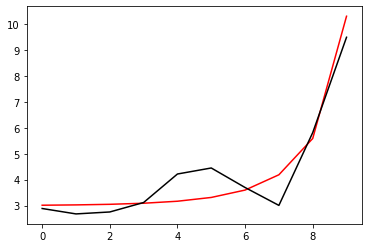

184800 0.05716691532699951
[2.88400591 2.67745243 2.75205    3.11801081 4.21549101 4.44992375
 3.69917505 3.01083205 5.81501768 9.48750281]


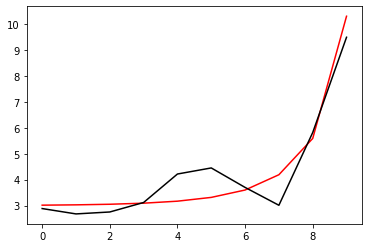

185900 0.03563187532211206
[2.88040915 2.67569861 2.7497164  3.11695577 4.2135131  4.45004371
 3.70094205 3.01354178 5.81745309 9.48746404]


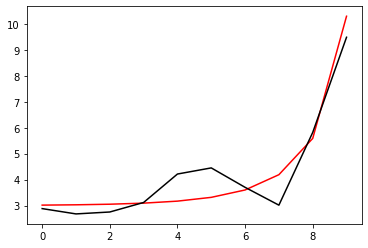

187000 0.026154783004324236
[2.87496563 2.67249446 2.74632118 3.11514096 4.2110434  4.44981653
 3.70244659 3.01605446 5.81977619 9.48742529]


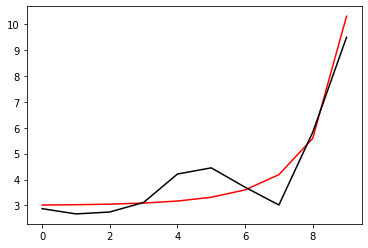

188100 0.020057026092679796
[2.87123259 2.6704183  2.74369901 3.11383758 4.20891426 4.44983294
 3.70414921 3.01873285 5.82221044 9.48738657]


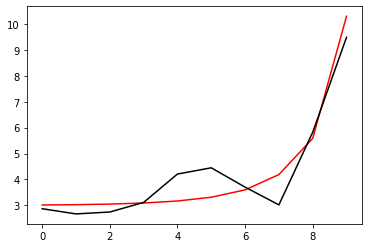

189200 0.014252115856198894
[2.8752715  2.67387367 2.74484601 3.11491444 4.20813064 4.45059239
 3.70622758 3.02150074 5.82452648 9.48734788]


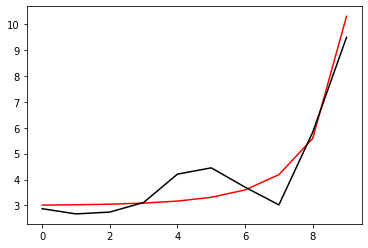

190300 0.011926506077469675
[2.87670935 2.67562606 2.74490725 3.11528055 4.20689881 4.45102121
 3.70802744 3.02402097 5.82666548 9.48730921]


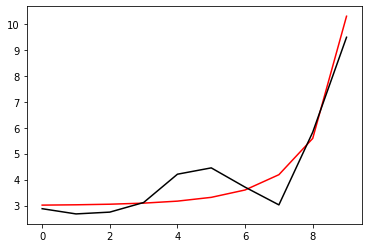

191400 0.005771095296081748
[2.87273403 2.6734766  2.74233184 3.11398982 4.20478072 4.45101127
 3.70968206 3.02663003 5.82902915 9.48727056]


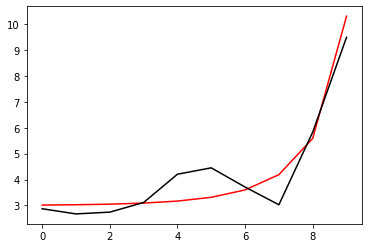

192500 0.03141603912318678
[2.87225463 2.67392132 2.74157375 3.11383084 4.20325837 4.45125726
 3.71136358 3.02907708 5.83113828 9.48723194]


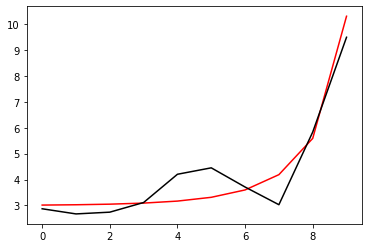

193600 0.02178472242989874
[2.87194022 2.67450204 2.74094008 3.11375246 4.20179218 4.45153433
 3.71306268 3.03153017 5.83324458 9.48719335]


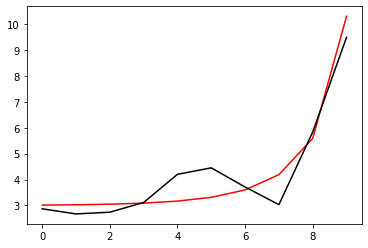

194700 0.03130146486354867
[2.88768429 2.68603236 2.74759426 3.11833513 4.20313523 4.45362378
 3.71604369 3.03489513 5.83585075 9.48715477]


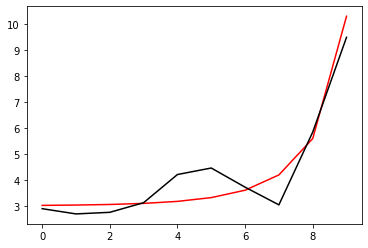

195800 0.05692134787817724
[2.88347864 2.68369745 2.74497015 3.11700212 4.20103613 4.45363392
 3.71773362 3.03754968 5.83825581 9.48711623]


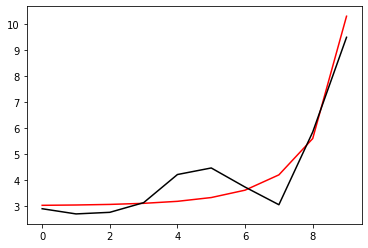

196900 0.03540055674661808
[2.87996881 2.68184264 2.74268059 3.11586825 4.19904932 4.45369744
 3.7194429  3.04019743 5.84063963 9.48707771]


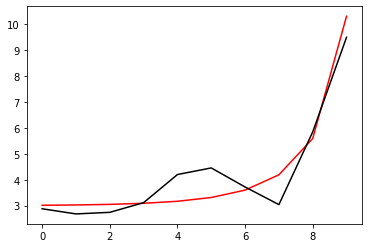

198000 0.02597866997646733
[2.87458177 2.67851959 2.73931601 3.11397097 4.19657219 4.45342049
 3.72090036 3.04266195 5.84292395 9.48703921]


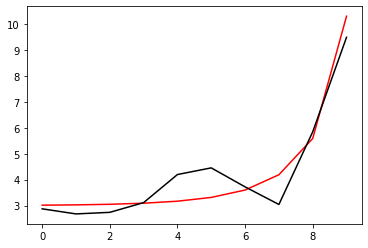

199100 0.01982044801720181
[2.87099639 2.67639046 2.73676748 3.11261255 4.19445023 4.45339399
 3.72255759 3.04528995 5.84531529 9.48700074]


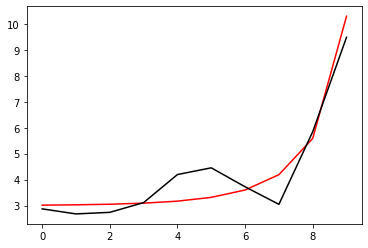

200200 0.014083811606469862
[2.87518965 2.67979487 2.73798879 3.11363179 4.19367022 4.45410409
 3.72458255 3.04799921 5.8475823  9.48696229]


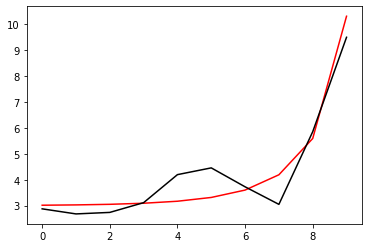

201300 0.011869775173806319
[2.8767504  2.68148631 2.73812083 3.11394467 4.19244821 4.45449207
 3.72633907 3.05047188 5.84968125 9.48692387]


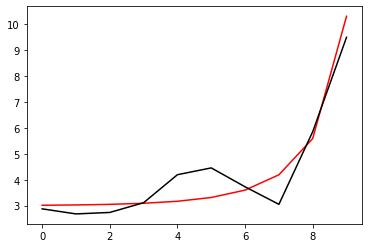

202400 0.0055733628722574625
[2.87278672 2.67919693 2.73555365 3.11255914 4.19031187 4.45442324
 3.72793733 3.05302346 5.85199879 9.48688547]


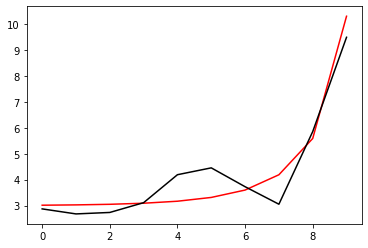

203500 0.03137906951884592
[2.87235497 2.67953252 2.73482843 3.11232502 4.18878594 4.45462157
 3.72957237 3.05542257 5.85406925 9.4868471 ]


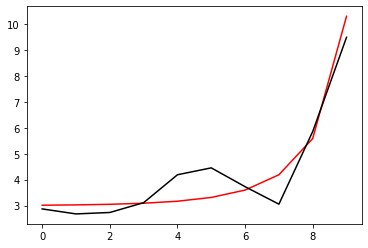

204600 0.021749749544438483
[2.87214187 2.68004354 2.73425185 3.11218742 4.18732464 4.45485564
 3.73122723 3.05782822 5.85613614 9.48680875]


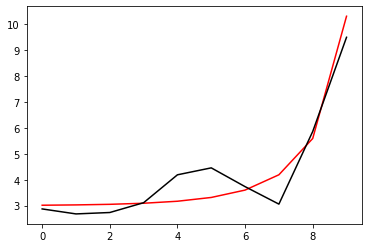

205700 0.031016261448241975
[2.88784083 2.69139456 2.74089228 3.11666319 4.18864593 4.45688268
 3.73414935 3.06113606 5.85869975 9.48677042]


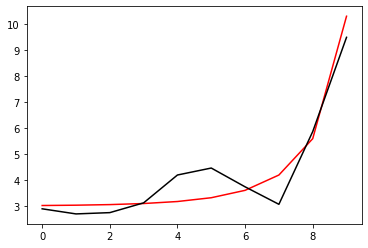

206800 0.05668113608075232
[2.88367124 2.68895132 2.7382934  3.115253   4.18653973 4.45684342
 3.73579105 3.06374037 5.86106387 9.48673212]


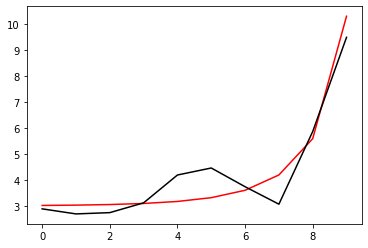

207900 0.035181455180135615
[2.88024725 2.68702785 2.73605478 3.11405784 4.18455235 4.45685831
 3.73744854 3.06633076 5.86339864 9.48669385]


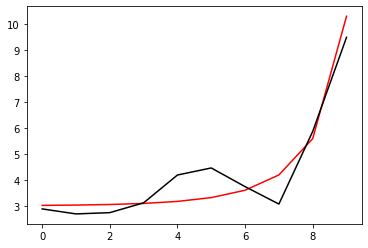

209000 0.025802087174328234
[2.8749099  2.68361309 2.73272423 3.11209274 4.1820741  4.45653776
 3.73886336 3.06875037 5.86564574 9.4866556 ]


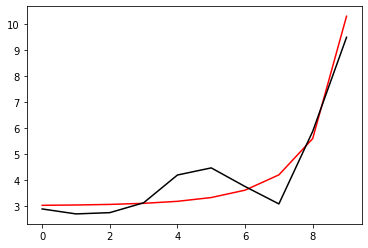

210100 0.019587032536898783
[2.8714489  2.68144653 2.73024541 3.11068932 4.1799631  4.4564731
 3.7404789  3.071331   5.8679959  9.48661737]


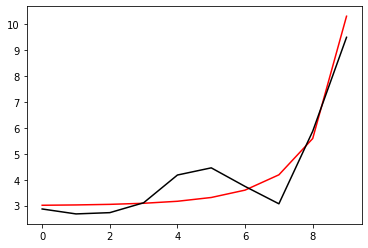

211200 0.013929174896642523
[2.87576612 2.68481088 2.73153406 3.11165928 4.17918961 4.45713828
 3.74245416 3.0739849  5.87021594 9.48657916]


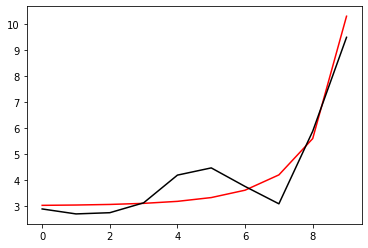

212300 0.011817784018747803
[2.87742993 2.686458   2.73173364 3.11192909 4.17798124 4.45749016
 3.74417104 3.07641305 5.87227664 9.48654098]


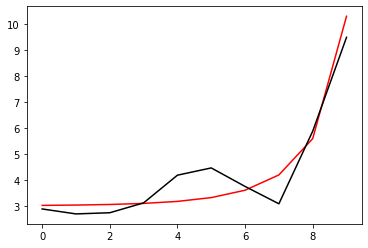

213400 0.005384348242401066
[2.87348686 2.68406589 2.72918666 3.11046888 4.17583657 4.45737106
 3.74571919 3.0789117  5.8745503  9.48650283]


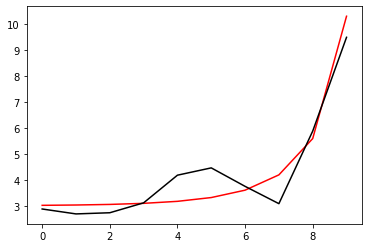

214500 0.03134480253415075
[2.87308458 2.68430889 2.72849157 3.11016973 4.17431084 4.45752638
 3.74731133 3.08126578 5.87658372 9.4864647 ]


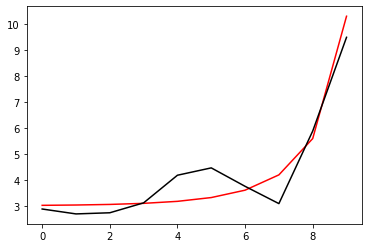

215600 0.0217185508148178
[2.87295264 2.6847651  2.72796874 3.10998255 4.17285802 4.45772196
 3.74892544 3.08362682 5.87861282 9.48642659]


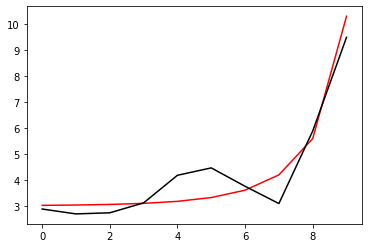

216700 0.030754089711917055
[2.88856225 2.69593717 2.73458246 3.1143557  4.174158   4.4596894
 3.75179116 3.08687978 5.88113519 9.48638851]


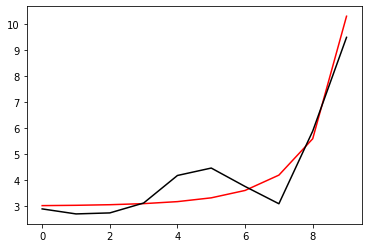

217800 0.056446309377470825
[2.88442556 2.69341146 2.73201384 3.11288311 4.17205139 4.45960713
 3.75338927 3.08943728 5.88346006 9.48635045]


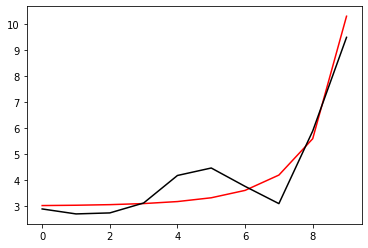

218900 0.03497379166795798
[2.88108653 2.69144641 2.72983237 3.11164214 4.17007064 4.4595801
 3.75499985 3.09197395 5.88574766 9.48631241]


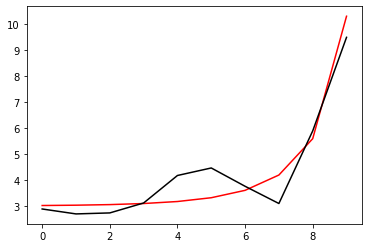

220000 0.025626620208085878
[2.87579509 2.68796412 2.72654016 3.10962297 4.16759717 4.45922152
 3.75637582 3.09435117 5.88795853 9.4862744 ]


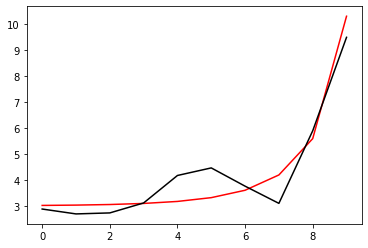

221100 0.019357468604517213
[2.87243603 2.68577129 2.72412704 3.1081831  4.16550018 4.45912267
 3.75795266 3.09688679 5.89026876 9.48623641]


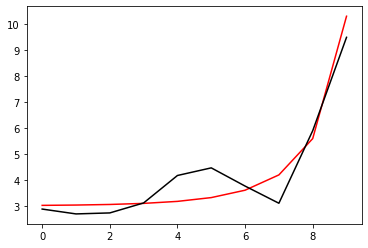

222200 0.013786381527266085
[2.87684868 2.68910266 2.72547628 3.1091108  4.16473552 4.45974668
 3.75988126 3.09948798 5.89244345 9.48619844]


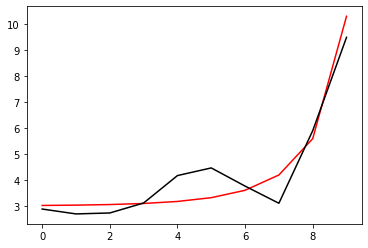

223300 0.011769740546954368
[2.87859822 2.69071881 2.7257407  3.1093466  4.16354406 4.46006656
 3.76156159 3.10187406 5.8944672  9.4861605 ]


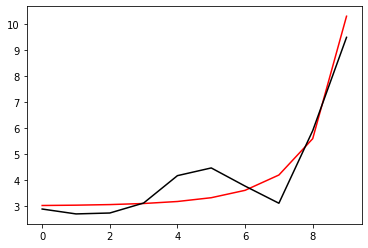

224400 0.005203337653564615
[2.8746832  2.68825493 2.72322423 3.10782923 4.16139953 4.4599045
 3.76306471 3.10432329 5.89669855 9.48612259]


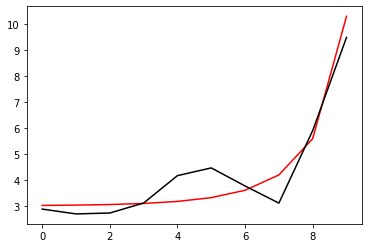

225500 0.03131257466105997
[2.87429493 2.68841897 2.7225572  3.10747418 4.15987733 4.46002089
 3.76461696 3.10663465 5.89869614 9.48608469]


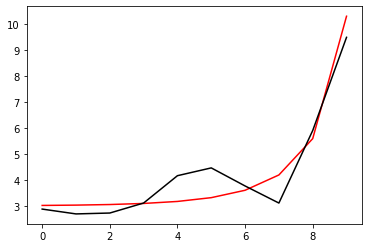

226600 0.021690332576358082
[2.87422703 2.68883258 2.72208548 3.10724619 4.15843614 4.46018194
 3.76619324 3.10895333 5.90068861 9.48604682]


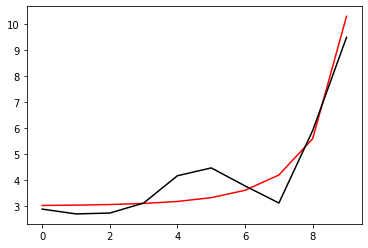

227700 0.0305103867231036
[2.88971089 2.69982634 2.72866225 3.11152124 4.15971555 4.46209247
 3.76900477 3.1121533  5.90317077 9.48600897]


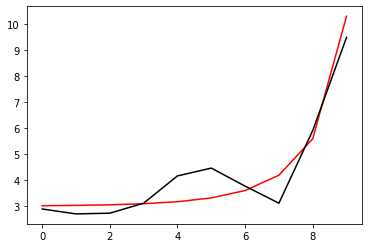

228800 0.0562171298278784
[2.88560649 2.69724122 2.72612947 3.11000002 4.15761473 4.46197291
 3.77056324 3.11466671 5.90545754 9.48597115]


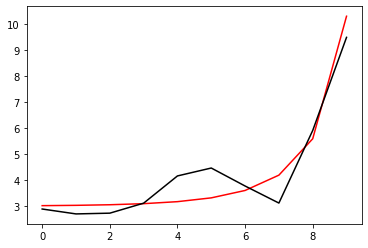

229900 0.03477702193269425
[2.88235152 2.69525703 2.72401057 3.10872685 4.1556468  4.46190973
 3.77213097 3.11715255 5.90769934 9.48593335]


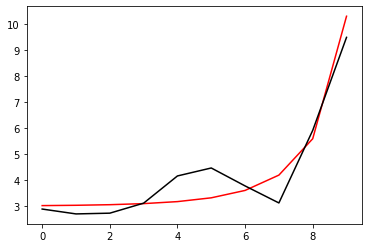

231000 0.02545365155105331
[2.87710441 2.69172857 2.72076147 3.10666638 4.15318357 4.46151813
 3.77347131 3.1194894  5.90987459 9.48589557]


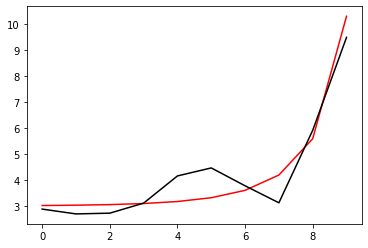

232100 0.019132411260664475
[2.87382605 2.68951715 2.71840999 3.10519731 4.15110303 4.46138847
 3.77501189 3.12198186 5.9121458  9.48585782]


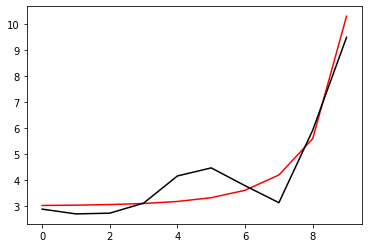

233200 0.013653936313185157
[2.87830777 2.69281969 2.7198134  3.10608875 4.15034901 4.4619745
 3.7768964  3.12453252 5.91427641 9.48582009]


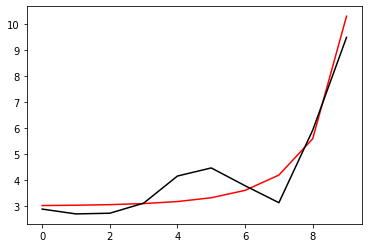

234300 0.011724993028459758
[2.88012804 2.69441557 2.72014036 3.10629865 4.14917734 4.46226599
 3.77854275 3.12687849 5.91626422 9.48578239]


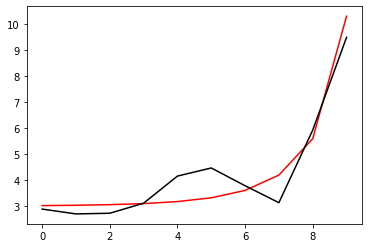

235400 0.005029954479082068
[2.87624733 2.69190571 2.71766324 3.10473937 4.14704014 4.46206719
 3.78000505 3.12928108 5.91845436 9.4857447 ]


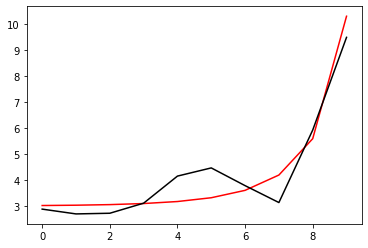

236500 0.031281895832174125
[2.87586004 2.69200191 2.71702264 3.10433666 4.14552439 4.46214822
 3.78151994 3.13155159 5.920417   9.48570704]


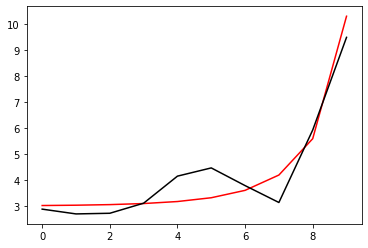

237600 0.021664481269640014
[2.87584167 2.69238285 2.71659995 3.10407573 4.14409762 4.46227823
 3.78306085 3.13382974 5.92237371 9.4856694 ]


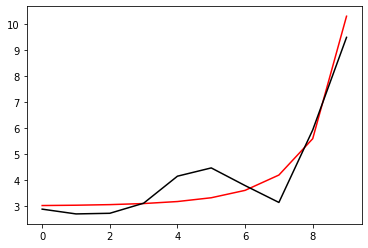

238700 0.030281547286046206
[2.89116977 2.70319891 2.72313149 3.10825721 4.14535732 4.46413439
 3.78582017 3.13697833 5.92481644 9.48563179]


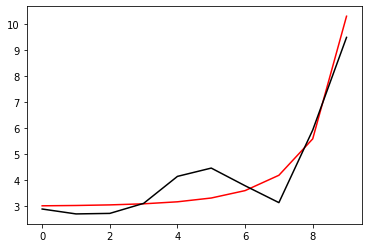

239800 0.055993963536844875
[2.88709911 2.70057497 2.72064044 3.10670015 4.14326799 4.46398268
 3.78734237 3.13944979 5.92706587 9.4855942 ]


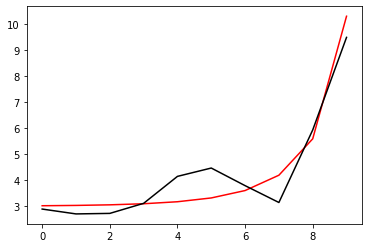

240900 0.03459071759824945
[2.88392712 2.69858997 2.71858862 3.10540663 4.14131815 4.4638883
 3.78887064 3.14188718 5.92926291 9.48555663]


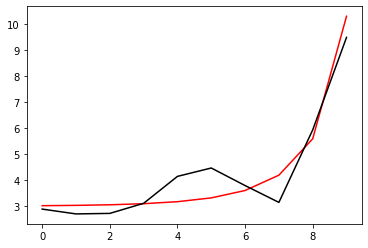

242000 0.025284331555093964
[2.87872432 2.69503402 2.71538747 3.10331661 4.13887015 4.46346818
 3.79017814 3.14418525 5.93140291 9.48551909]


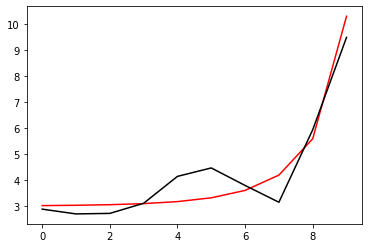

243100 0.018912450645439963
[2.87550698 2.69280901 2.7130936  3.10182453 4.13680801 4.46331058
 3.79168446 3.14663605 5.93363579 9.48548156]


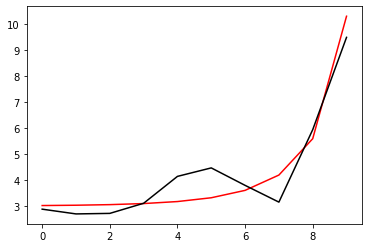

244200 0.013530599597884305
[2.88003386 2.69608479 2.71454512 3.10268484 4.13606607 4.46386142
 3.79352705 3.14913801 5.93572337 9.48544406]


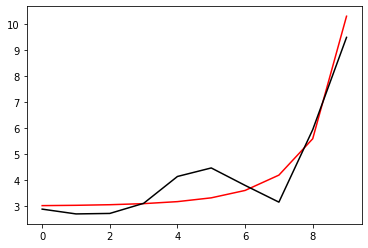

245300 0.011682991706276066
[2.88191207 2.69766888 2.71493263 3.10287604 4.13491666 4.46412768
 3.79514163 3.1514455  5.93767601 9.48540659]


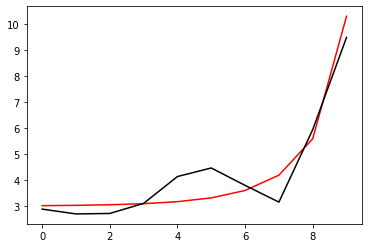

246400 0.004864004917396076
[2.8780709  2.69513437 2.71250234 3.10128812 4.13279293 4.46389746
 3.79656657 3.15380368 5.93982573 9.48536914]


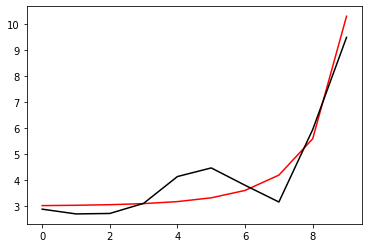

247500 0.0312524038261951
[2.87767371 2.6951718  2.71188685 3.10084513 4.13128619 4.4639463
 3.79804626 3.15603487 5.94175409 9.4853317 ]


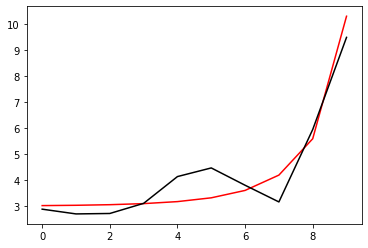

248600 0.021640517087327782
[2.87769268 2.69552807 2.7115114  3.10055833 4.12987626 4.46404834
 3.79955389 3.158274   5.94367571 9.4852943 ]


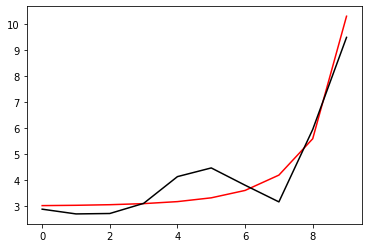

249700 0.030064709792225273
[2.89284027 2.70616684 2.71799091 3.10465059 4.13111709 4.46585244
 3.80226277 3.16137257 5.94607964 9.48525691]


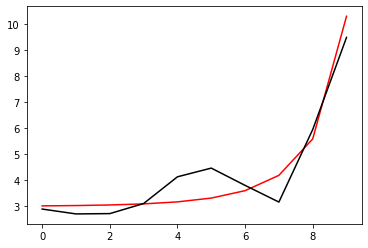

250800 0.05577719308259285
[2.88880641 2.70352241 2.71554751 3.10306947 4.12904449 4.46567322
 3.80375162 3.16380385 5.94829222 9.48521955]


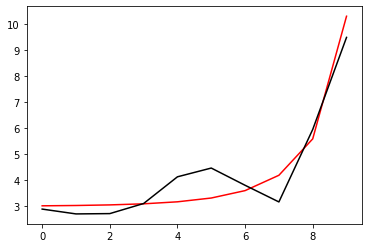

251900 0.03441449496416756
[2.88571605 2.70155136 2.71356633 3.10176585 4.12711717 4.4655519
 3.80524328 3.16619476 5.95044536 9.48518221]


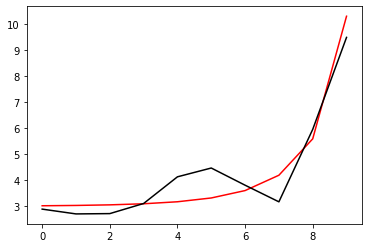

253000 0.025119572470984917
[2.88055859 2.69798406 2.71041776 3.09965688 4.12468886 4.46510729
 3.80652032 3.16845537 5.9525503  9.48514489]


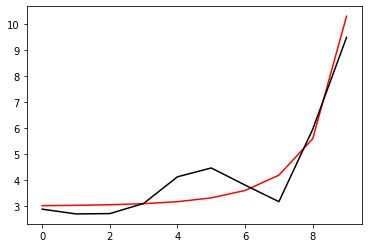

254100 0.018698092488291178
[2.87738445 2.69574849 2.70817753 3.09814711 4.12264666 4.46492421
 3.80799407 3.17086575 5.95474542 9.4851076 ]


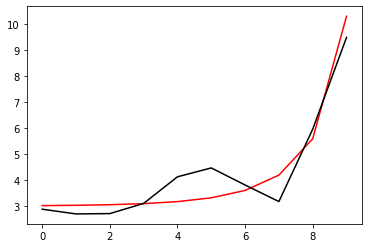

255200 0.013415333184728062
[2.88193518 2.69899805 2.7096715  3.09898068 4.12191796 4.46544227
 3.80979661 3.17332061 5.95679089 9.48507032]


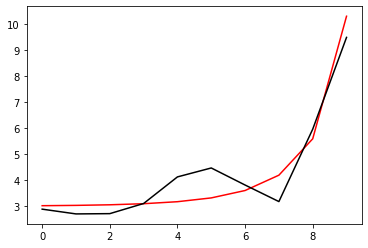

256300 0.011643263928141261
[2.88386054 2.7005771  2.7101178  3.09915961 4.12079294 4.4656861
 3.81138132 3.175591   5.95870901 9.48503307]


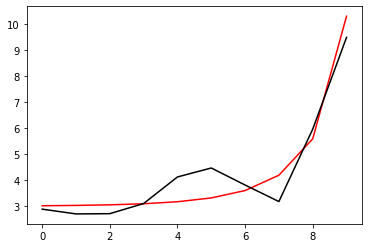

257400 0.004705378375055435
[2.88006328 2.69803542 2.7077405  3.09755452 4.11868784 4.46542902
 3.81277182 3.17790658 5.96081892 9.48499585]


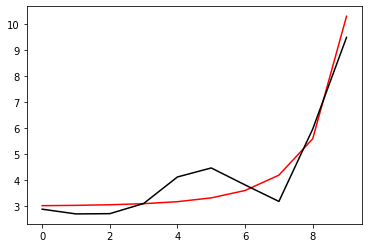

258500 0.031223831892112947
[2.87964723 2.69802142 2.70714896 3.09707782 4.11719231 4.46544847
 3.81421815 3.18009976 5.96271353 9.48495864]


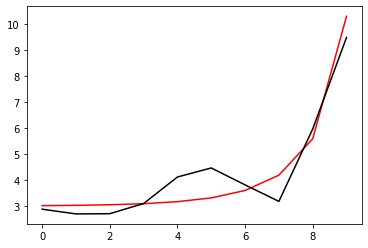

259600 0.021618061452005892
[2.87969334 2.69835936 2.70681915 3.0967714  4.1158013  4.46552524
 3.81569432 3.18230115 5.96460062 9.48492146]


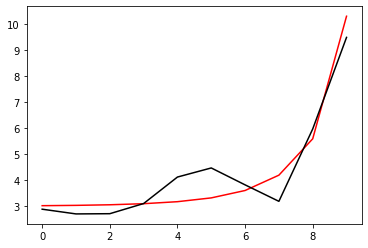

260700 0.02985759531829659
[2.89464015 2.70882108 2.71324091 3.10077849 4.11702407 4.46727942
 3.81835429 3.1853509  5.96696626 9.4848843 ]


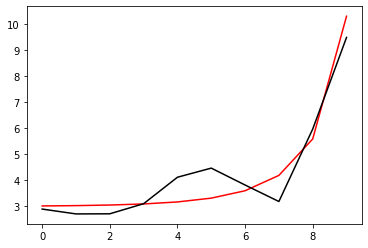

261800 0.05556716010076815
[2.8906473  2.7061724  2.71085089 3.09918412 4.11497296 4.46707686
 3.81981235 3.18774348 5.96914236 9.48484716]


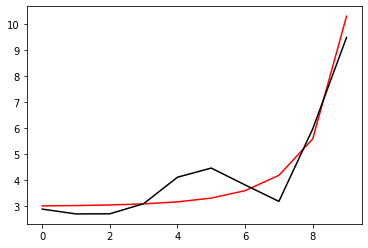

262900 0.034247975410300474
[2.88763695 2.7042269  2.70894293 3.09787912 4.11307181 4.46693225
 3.82126982 3.1900896  5.97125234 9.48481004]


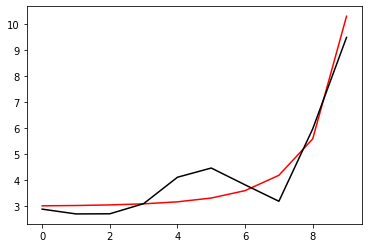

264000 0.024960058830353783
[2.88252647 2.70066198 2.70585109 3.09576072 4.11066713 4.4664667
 3.82251849 3.19231385 5.97332238 9.48477295]


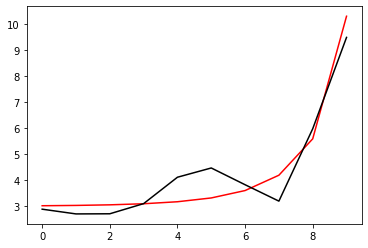

265100 0.018489747746966413
[2.87937981 2.69841753 2.70366075 3.09423779 4.10864609 4.46626028
 3.82396111 3.19468489 5.97548022 9.48473588]


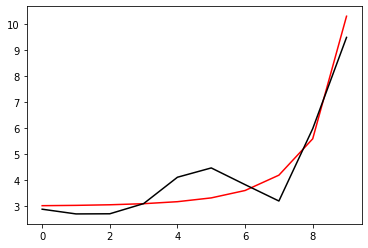

266200 0.013307259980594325
[2.88393573 2.70164039 2.70519189 3.09504842 4.10793151 4.4667477
 3.82572523 3.19709407 5.97748442 9.48469883]


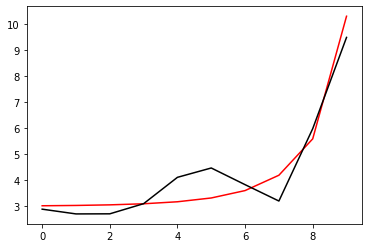

267300 0.01160539795911658
[2.8858993  2.7032197  2.70569533 3.09522077 4.10683273 4.4669716
 3.82728174 3.1993286  5.97936859 9.4846618 ]


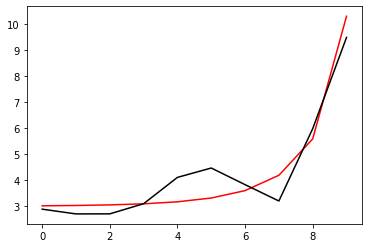

268400 0.004553986076066258
[2.88214949 2.70068503 2.70337592 3.09360832 4.10475057 4.46669156
 3.82864025 3.20160311 5.9814392  9.48462479]


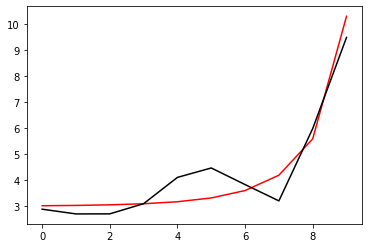

269500 0.031195985472269948
[2.88170731 2.70062549 2.70280726 3.09310373 4.10326814 4.46668409
 3.83005486 3.20375944 5.98330057 9.48458781]


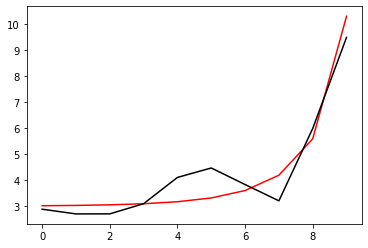

270600 0.021596813873634442
[2.88177212 2.70095007 2.70252158 3.09278323 4.1018978  4.46673798
 3.83150114 3.20592421 5.98515362 9.48455085]


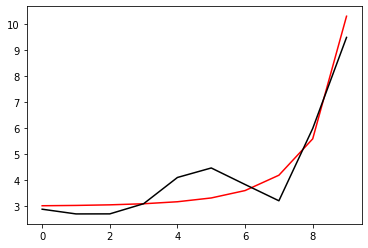

271700 0.029658385529087256
[2.89650167 2.71123478 2.70888069 3.09670886 4.10310319 4.46844417
 3.83411358 3.20892621 5.98748144 9.48451391]


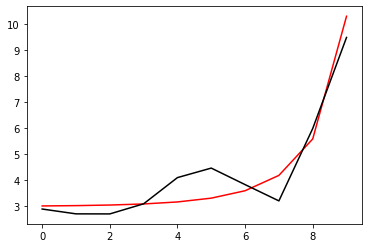

272800 0.055364130682622865
[2.89255487 2.70859616 2.70654943 3.09511103 4.10107785 4.46822204
 3.8355431  3.21128139 5.98962135 9.48447699]


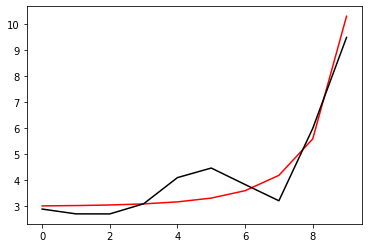

273900 0.03409076650602305
[2.88962261 2.7066851  2.70471633 3.093812   4.09920583 4.46805724
 3.83696846 3.21358421 5.99168888 9.48444009]


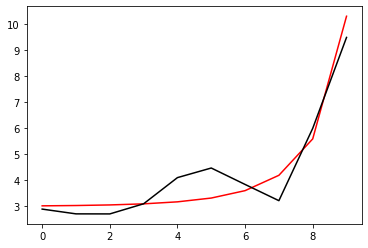

275000 0.024806268627544214
[2.88456101 2.70313409 2.70168477 3.09169252 4.0968282  4.4675739
 3.83819057 3.21577309 5.99372417 9.48440322]


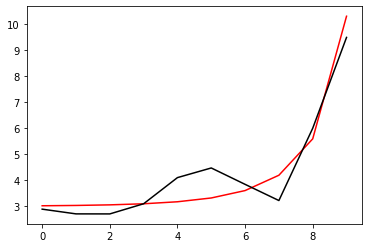

276100 0.018287729577858337
[2.88142831 2.7008815  2.69954074 3.09016039 4.09482929 4.46734602
 3.83960331 3.21810576 5.99584522 9.48436636]


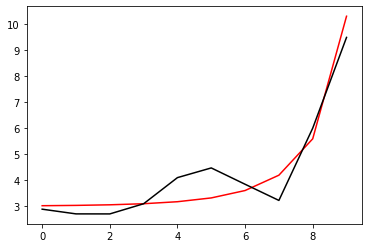

277200 0.013205633388420835
[2.88597336 2.70407654 2.70110417 3.09095135 4.09412952 4.46780471
 3.84133049 3.22047057 5.99780895 9.48432953]


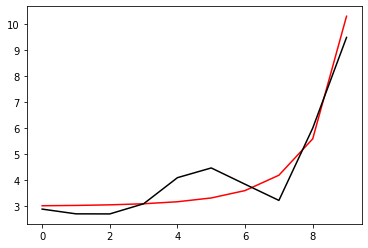

278300 0.011569032144590784
[2.88796789 2.70566029 2.7016632  3.09112214 4.09305854 4.46801091
 3.8428603  3.22267037 5.99965975 9.48429272]


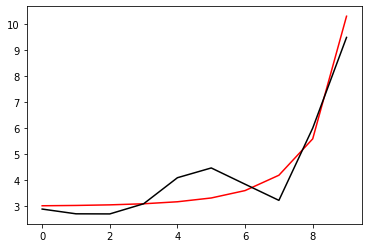

279400 0.004409726153459989
[2.88426829 2.70314389 2.6994054  3.08951066 4.09100285 4.46771124
 3.8441889  3.22490516 6.00169155 9.48425594]


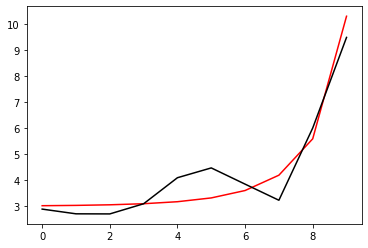

280500 0.03116872521851609
[2.88379423 2.70304356 2.69885857 3.08898332 4.08953512 4.46767906
 3.84557323 3.22702567 6.00352015 9.48421917]


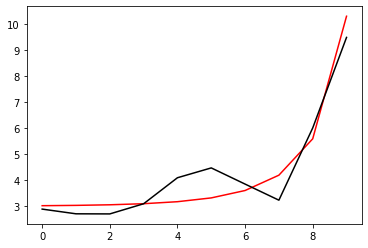

281600 0.021576535174225964
[2.88387083 2.7033586  2.6986155  3.08865355 4.08818691 4.46771219
 3.846991   3.22915487 6.00533965 9.48418243]


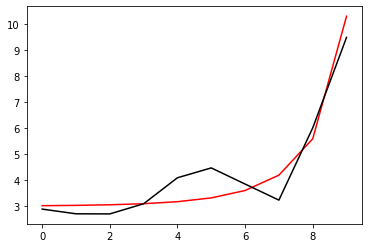

282700 0.029465628731365944
[2.89836991 2.71346623 2.70490771 3.09250106 4.08937548 4.46937212
 3.84955716 3.23211009 6.00763011 9.4841457 ]


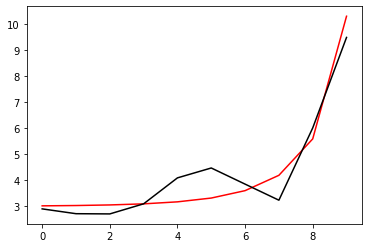

283800 0.05516827797012142
[2.89447463 2.71085018 2.7026401  3.09090858 4.08737974 4.46913382
 3.85096017 3.23442905 6.00973413 9.484109  ]


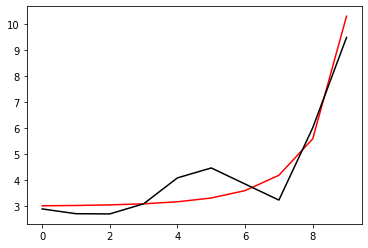

284900 0.03394245616416301
[2.89161831 2.70898015 2.7008826  3.08962164 4.08553921 4.46895151
 3.85235521 3.23668994 6.01175995 9.48407232]


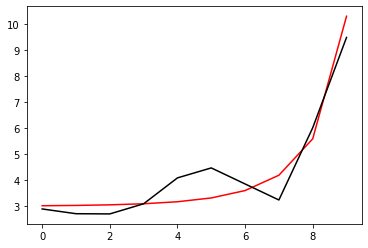

286000 0.024658500652506354
[2.88660752 2.70545249 2.69791417 3.08750836 4.08319149 4.46845314
 3.85355235 3.23884437 6.01376068 9.48403566]


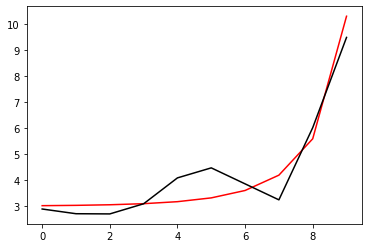

287100 0.018092255984022393
[2.88347748 2.70319198 2.69581314 3.08597043 4.08121547 4.46820547
 3.85493635 3.2411396  6.01584544 9.48399902]


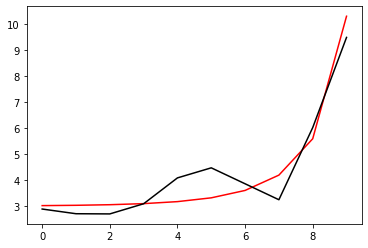

288200 0.013109813686416198
[2.88799804 2.70635772 2.69740437 3.08674455 4.08053104 4.46863714
 3.85662795 3.24346128 6.01776953 9.48396241]


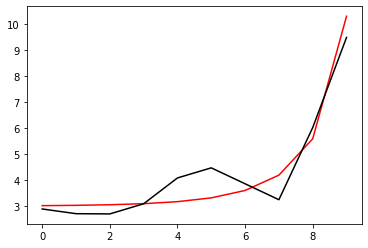

289300 0.011533847201759985
[2.89001778 2.70794916 2.69801749 3.08691822 4.07948919 4.46882765
 3.85813241 3.24562743 6.01958754 9.48392581]


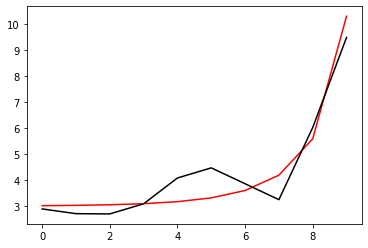

290400 0.0042724666445153915
[2.88637043 2.70545984 2.69582392 3.08531469 4.07746283 4.46851119
 3.8594329  3.24782373 6.02158106 9.48388924]


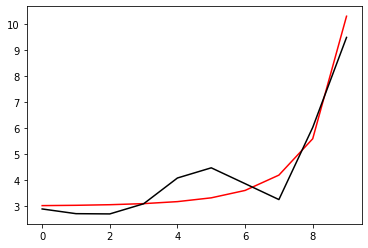

291500 0.031141954392399904
[2.88586006 2.70532247 2.69529783 3.08476909 4.07601113 4.46845627
 3.86078825 3.24990941 6.02337738 9.48385269]


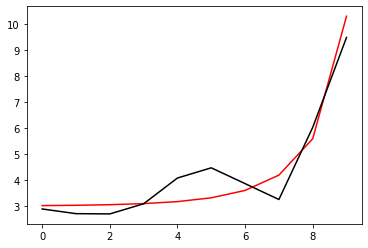

292600 0.02155703504476552
[2.88594286 2.70563088 2.69509582 3.08443422 4.07468625 4.46847054
 3.86217877 3.252004   6.02516384 9.48381616]


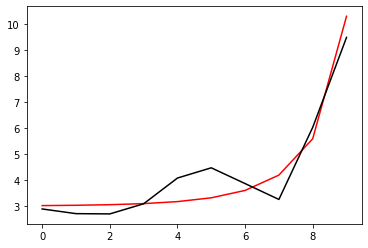

293700 0.029278166445864687
[2.9002011  2.71556132 2.70131742 3.08820664 4.07585847 4.47008579
 3.8646998  3.25491338 6.02741742 9.48377965]


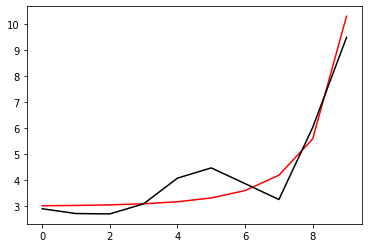

294800 0.054979677302136355
[2.89636299 2.71297865 2.69911776 3.08662735 4.07389569 4.46983438
 3.86607813 3.25719725 6.02948591 9.48374316]


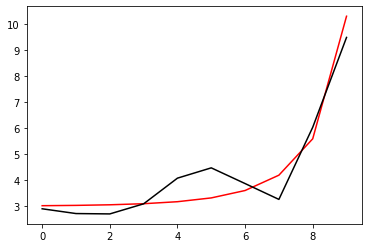

295900 0.033802614467870085
[2.89358022 2.71115431 2.69743584 3.0853575  4.07208846 4.46963683
 3.86744444 3.25941752 6.03147079 9.48370669]


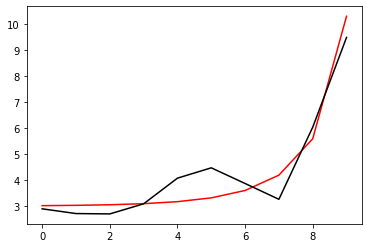

297000 0.024516904271506428
[2.88862201 2.7076576  2.69453263 3.08325663 4.06977305 4.46912585
 3.86861802 3.26153836 6.03343725 9.48367024]


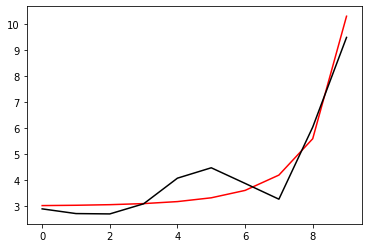

298100 0.017903456581838693
[2.88548546 2.7053891  2.69247157 3.08171592 4.06782053 4.4688599
 3.86997433 3.26379705 6.03548627 9.48363382]


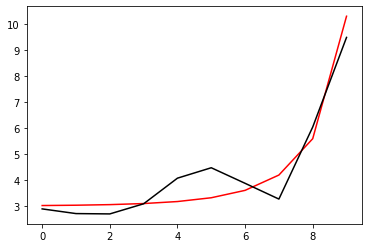

299200 0.013019249472921738
[2.88997021 2.70852387 2.69408645 3.08247566 4.06715184 4.46926612
 3.87163159 3.26607683 6.03737156 9.48359741]


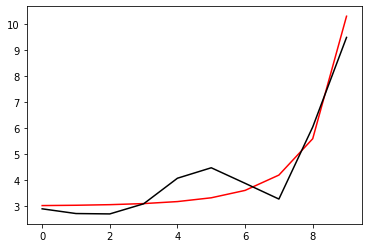

300300 0.011499560225398893
[2.89201074 2.71012559 2.69475222 3.0826561  4.06614025 4.46944279
 3.87311199 3.26821039 6.03915742 9.48356103]


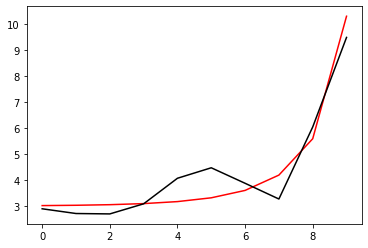

301400 0.004142040098316868
[2.888417   2.70767001 2.6926245  3.08106629 4.06414547 4.46911198
 3.87438594 3.27036935 6.04111325 9.48352466]


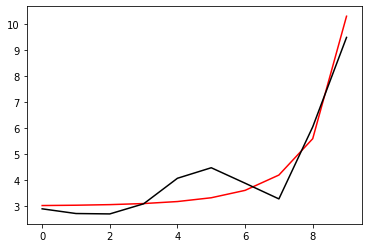

302500 0.031115609354714534
[2.88786704 2.70749862 2.69211806 3.08050636 4.06271092 4.46903609
 3.8757135  3.27242117 6.04287784 9.48348832]


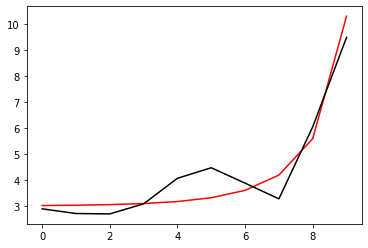

303600 0.02153816257029644
[2.88795155 2.7078025  2.69195549 3.08017    4.06141031 4.46903317
 3.87707791 3.27448211 6.04463183 9.483452  ]


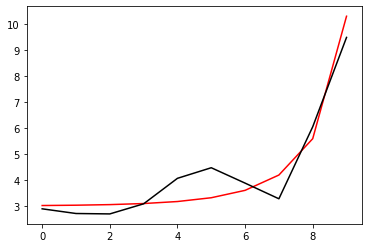

304700 0.029095075129898965
[2.90196102 2.71755566 2.69810321 3.08387    4.06256655 4.4706052
 3.87955487 3.27734658 6.04684902 9.4834157 ]


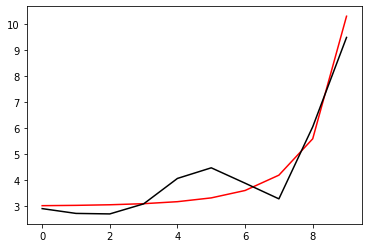

305800 0.054798309988368515
[2.89818567 2.71501567 2.69597518 3.08231083 4.06063968 4.47034345
 3.88091022 3.27959646 6.04888242 9.48337942]


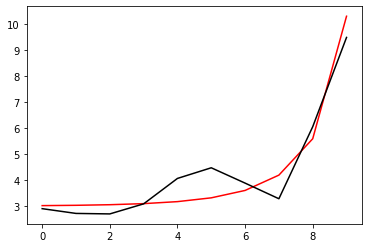

306900 0.03367079947858223
[2.89547392 2.71324006 2.69436811 3.08106214 4.0588671  4.47013262
 3.88224921 3.28177736 6.05082721 9.48334316]


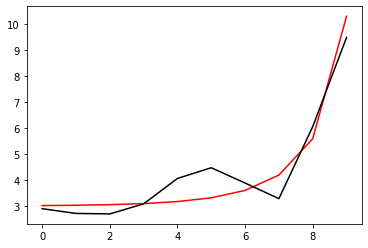

308000 0.024381508918702353
[2.89056979 2.70978025 2.69153149 3.0789789  4.05658592 4.46961114
 3.8834005  3.28386547 6.05275978 9.48330692]


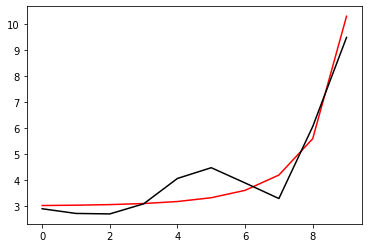

309100 0.017721382063297122
[2.88741953 2.70750358 2.68950766 3.07743806 4.05465739 4.46932831
 3.88473012 3.28608855 6.05477368 9.4832707 ]


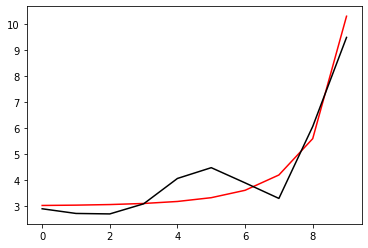

310200 0.01293346284504888
[2.89185921 2.71060571 2.69114239 3.07818555 4.05400474 4.46971052
 3.88635424 3.28832764 6.05662105 9.4832345 ]


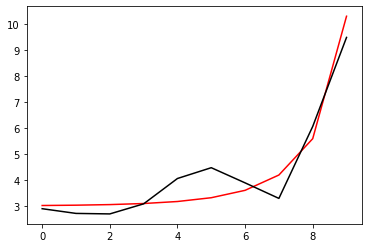

311300 0.011465919559800275
[2.8939173  2.71221977 2.69185942 3.07837621 4.05302439 4.46987504
 3.88781178 3.2904297  6.05837548 9.48319833]


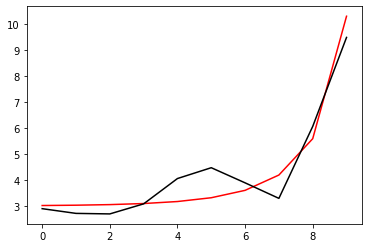

312400 0.004018245245265152
[2.89037793 2.70980278 2.68979828 3.07680484 4.05106292 4.46953196
 3.88906059 3.29255243 6.06029427 9.48316217]


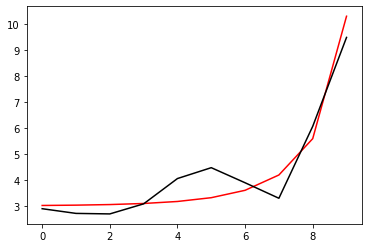

313500 0.031089652269217616
[2.88978606 2.70959979 2.68931035 3.076234   4.04964643 4.46943673
 3.89036149 3.29457134 6.06202773 9.48312603]


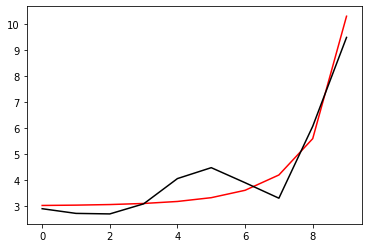

314600 0.021519798818728605
[2.88986876 2.70990064 2.68918557 3.07589923 4.04837085 4.46941814
 3.89170087 3.29659959 6.06374987 9.48308992]


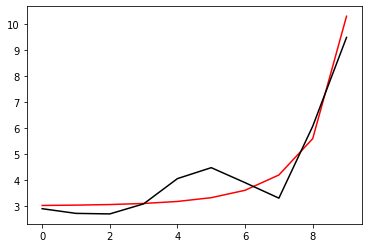

315700 0.02891561930796034
[2.90362358 2.7194765  2.6952565  3.07952922 4.04951138 4.4709483
 3.89413478 3.29942007 6.06593126 9.48305382]


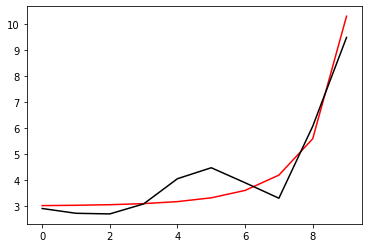

316800 0.054624072467118194
[2.89991636 2.71698709 2.69320318 3.07799623 4.047623   4.4706787
 3.89546871 3.30163707 6.0679301  9.48301775]


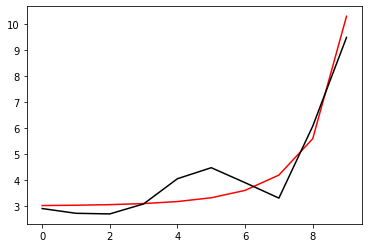

317900 0.033546564587490495
[2.89727298 2.71526194 2.69166966 3.0767719  4.04588602 4.4704563
 3.89678168 3.30377985 6.06983572 9.48298169]


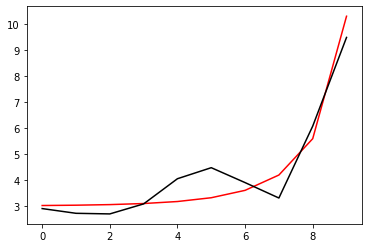

319000 0.02425225146920299
[2.89242407 2.71184351 2.68890031 3.07471065 4.04364059 4.46992614
 3.89791184 3.30583614 6.07173487 9.48294566]


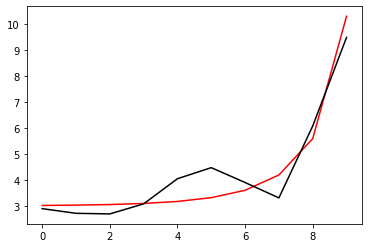

320100 0.017546015128324967
[2.88925468 2.70955852 2.68691124 3.07317204 4.04173646 4.46962773
 3.89921572 3.30802454 6.07371433 9.48290964]


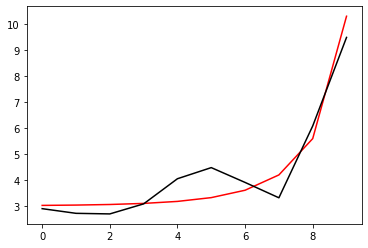

321200 0.012852037387296091
[2.89364186 2.71262642 2.68856236 3.07390916 4.04110008 4.46998728
 3.90080786 3.31022417 6.07552474 9.48287365]


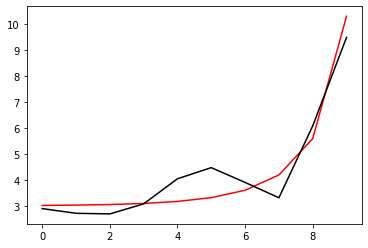

322300 0.01143270006547508
[2.89571532 2.71425451 2.68932932 3.07411307 4.04015181 4.47014125
 3.90224373 3.31229581 6.07724852 9.48283768]


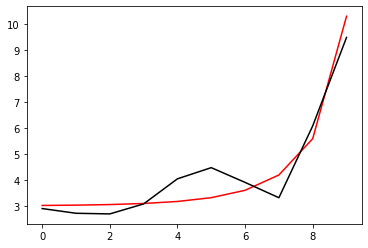

323400 0.003900852529986254
[2.8922305  2.71187945 2.68733473 3.07256394 4.03822494 4.46978769
 3.90346866 3.31438345 6.07913102 9.48280172]


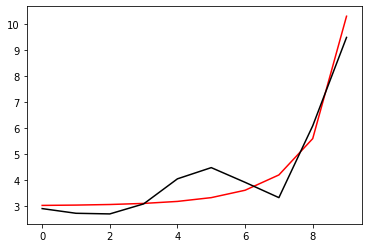

324500 0.031064065429331864
[2.89159524 2.71164679 2.68686416 3.07198516 4.03682727 4.4696746
 3.90474395 3.31637043 6.08083401 9.48276579]


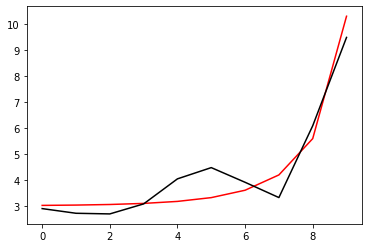

325600 0.02150185089989223
[2.89167339 2.71194564 2.68677543 3.07165459 4.0355773  4.46964173
 3.90605932 3.31836694 6.08252501 9.48272988]


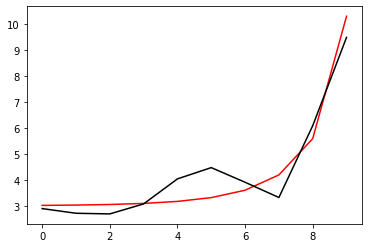

326700 0.028739213493606017
[2.90516944 2.7213443  2.69276703 3.07521672 4.03670234 4.47113128
 3.90845117 3.32114439 6.08467121 9.48269398]


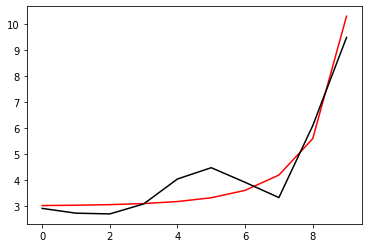

327800 0.05445678828294122
[2.90153541 2.71891208 2.69079089 3.07371522 4.03485465 4.47085612
 3.90976518 3.32332964 6.08663614 9.48265811]


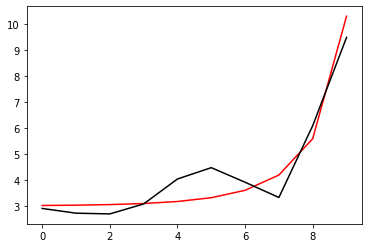

328900 0.03342946589993803
[2.89895766 2.71723809 2.68932914 3.07251775 4.03315393 4.47062361
 3.91105333 3.32543557 6.08850358 9.48262226]


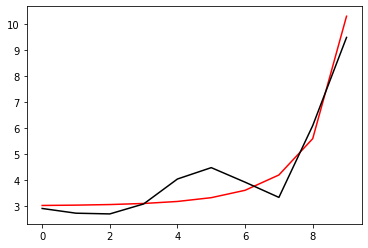

330000 0.02412900044067792
[2.8941647  2.71386427 2.68662712 3.07048204 4.03094538 4.4700864
 3.91216341 3.32746092 6.09036991 9.48258642]


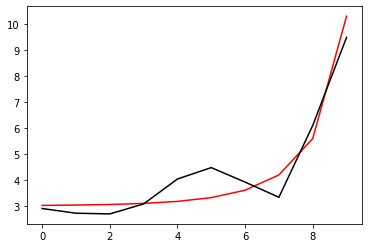

331100 0.017377281901078453
[2.8909723  2.71157087 2.68467058 3.06894776 4.02906601 4.46977362
 3.91344251 3.32961564 6.0923157  9.48255061]


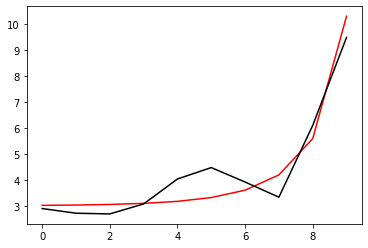

332200 0.012774608324719001
[2.89530117 2.71460309 2.68633495 3.06967616 4.02844607 4.47011181
 3.91500381 3.33177705 6.09409014 9.48251481]


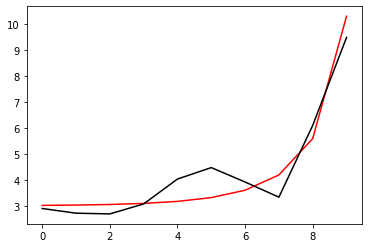

333300 0.011399698543382925
[2.89738872 2.71624665 2.68715059 3.06989604 4.02753062 4.47025672
 3.91641917 3.33381942 6.09578411 9.48247904]


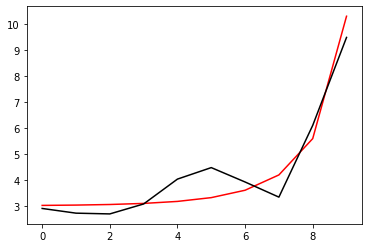

334400 0.003789611351371654
[2.89395815 2.71391561 2.6852219  3.06837213 4.02563929 4.46989425
 3.91762137 3.33587307 6.09763117 9.48244329]


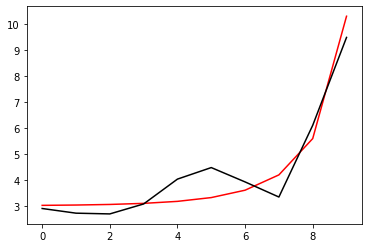

335500 0.031038846806629074
[2.8932787  2.71365486 2.68476751 3.06778802 4.02426106 4.46976467
 3.9188721  3.33782912 6.09930443 9.48240755]


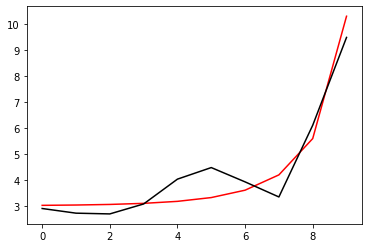

336600 0.021484247107703542
[2.89335021 2.71395234 2.6847131  3.06746388 4.02303713 4.46971879
 3.92016444 3.33979491 6.10096504 9.48237184]


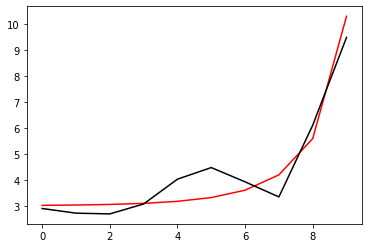

337700 0.02856539104445798
[2.90658484 2.72317403 2.69062311 3.07096009 4.02414688 4.47116895
 3.9225152  3.34253029 6.10307674 9.48233614]


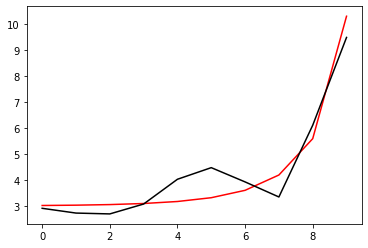

338800 0.054296220975029154
[2.90302864 2.72080454 2.68872607 3.06949464 4.02234178 4.4708903
 3.92381071 3.34468499 6.10500852 9.48230047]


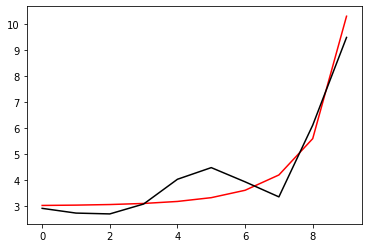

339900 0.03331906880708458
[2.90051374 2.71918157 2.68733396 3.06832595 4.02067769 4.470649
 3.92507517 3.34675532 6.10683885 9.48226481]


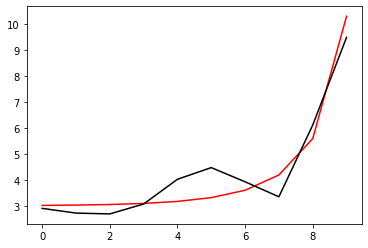

341000 0.024011576576636457
[2.89577703 2.71585448 2.68469875 3.06631863 4.01850687 4.47010614
 3.92616618 3.34875069 6.10867306 9.48222917]


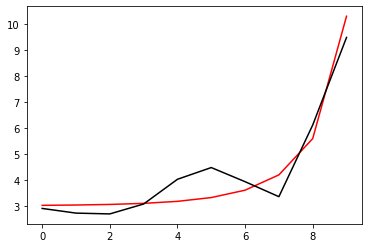

342100 0.017215063094584617
[2.89255907 2.7135527  2.68277278 3.06479057 4.01665255 4.46978018
 3.92742144 3.35087274 6.110586   9.48219356]


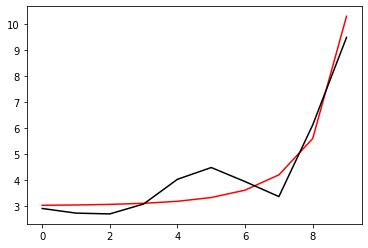

343200 0.012700854382040416
[2.89682521 2.71654798 2.68444754 3.06551171 4.01604921 4.47009824
 3.92895304 3.35299721 6.11232554 9.48215796]


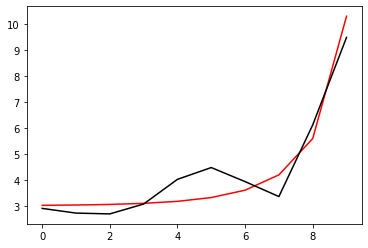

344300 0.01136672921158945
[2.89892634 2.71820832 2.68531073 3.06575    4.01516727 4.47023555
 3.93034903 3.35501149 6.11399063 9.48212238]


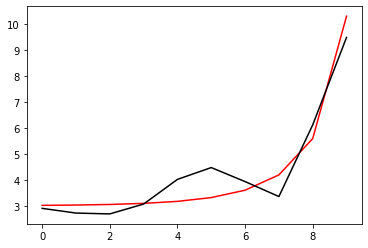

345400 0.00368425763734069
[2.89554928 2.71592236 2.68344672 3.06425364 4.01331208 4.46986552
 3.93152961 3.35703231 6.11580316 9.48208682]


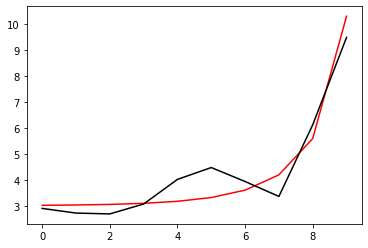

346500 0.031014006545437362
[2.89482543 2.71563483 2.68300739 3.06366648 4.01195383 4.46972076
 3.93275679 3.35895846 6.11744748 9.48205128]


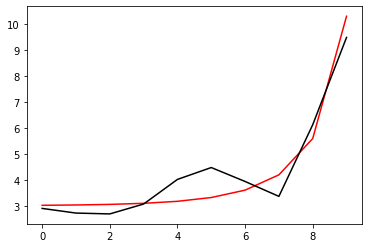

347600 0.021466932892027037
[2.89488873 2.71593127 2.68298551 3.06335063 4.01075627 4.46966306
 3.93402706 3.36089454 6.11907854 9.48201576]


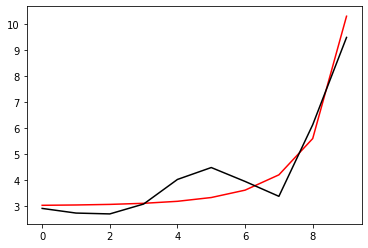

348700 0.0283937785925478
[2.90786048 2.72497636 2.68881197 3.06678268 4.01185088 4.47107498
 3.9363377  3.36358887 6.12115649 9.48198026]


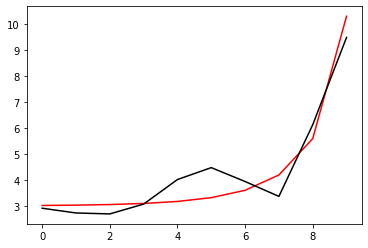

349800 0.05414208655408424
[2.90438628 2.72267417 2.68699545 3.06535724 4.01009    4.47079477
 3.93761609 3.36571423 6.12305599 9.48194478]


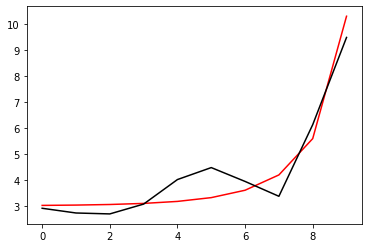

350900 0.03321495335455698
[2.90193146 2.72110145 2.68567057 3.06421874 4.00846273 4.47054585
 3.93885795 3.36775027 6.12485034 9.48190932]


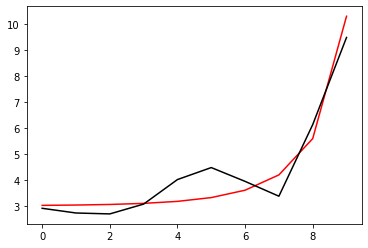

352000 0.02389976979615098
[2.89725089 2.71782228 2.68310118 3.06224202 4.00633021 4.46999859
 3.93993084 3.36971664 6.12665321 9.48187388]


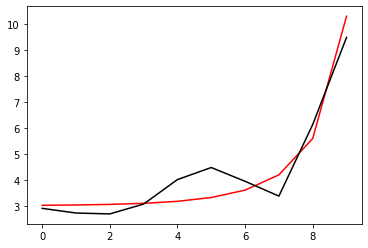

353100 0.01705920442312481
[2.89400588 2.71551228 2.68120402 3.0607219  4.00450122 4.46966058
 3.94116322 3.37180709 6.12853421 9.48183845]


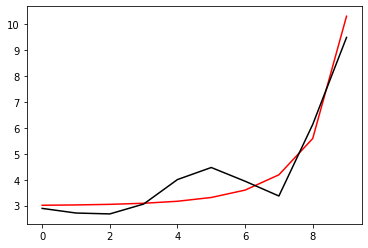

354200 0.012630491014103525
[2.89820603 2.71846956 2.68288661 3.0614371  4.0039146  4.4699597
 3.94266623 3.37389592 6.13023994 9.48180305]


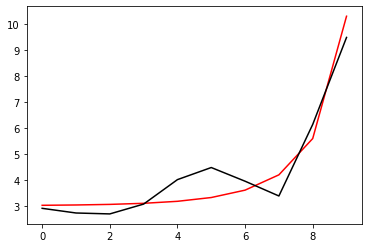

355300 0.01133361919184718
[2.90032093 2.72014791 2.68379635 3.06169604 4.00306684 4.47009083
 3.94404405 3.37588334 6.13187715 9.48176767]


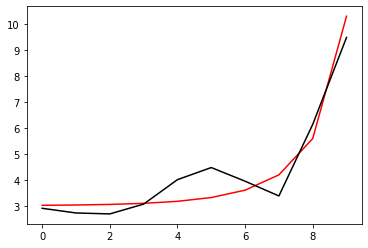

356400 0.0035845209505388697
[2.89699628 2.71790727 2.68199541 3.06022897 4.00124816 4.46971446
 3.94520403 3.37787249 6.13365616 9.4817323 ]


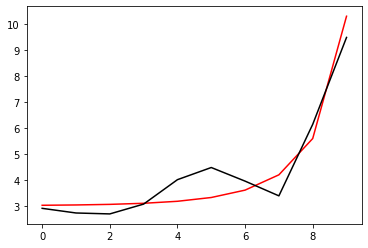

357500 0.030989564210072647
[2.89622827 2.71759409 2.68157002 3.05964076 3.99991033 4.46955575
 3.94640867 3.3797698  6.1352724  9.48169695]


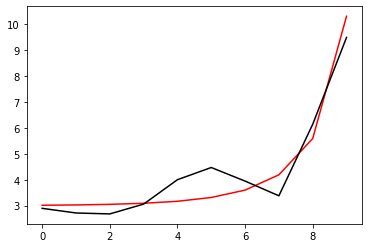

358600 0.021449867491169578
[2.8962822  2.71788959 2.68157892 3.05933481 3.99873938 4.46948735
 3.94765782 3.38167724 6.13687479 9.48166162]


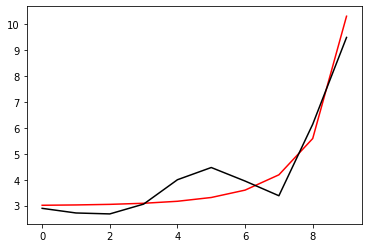

359700 0.028224075019888398
[2.90899056 2.7267586  2.6873201  3.06270429 3.99981902 4.47086216
 3.94992933 3.38433156 6.1389198  9.48162631]


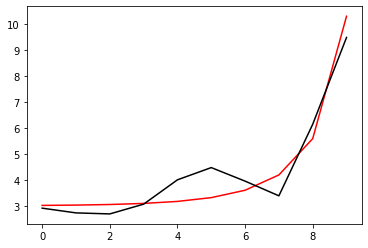

360800 0.05399406473281238
[2.90560212 2.72452744 2.68558511 3.06132226 3.99810377 4.47058218
 3.95119195 3.38642888 6.14078798 9.48159102]


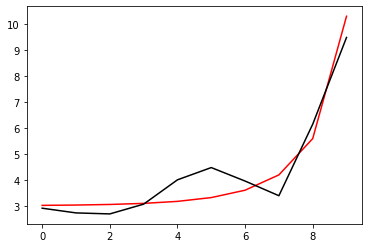

361900 0.03311671831150583
[2.90320459 2.72300371 2.68432484 3.06021497 3.99651334 4.47032672
 3.95241226 3.38843192 6.14254756 9.48155575]


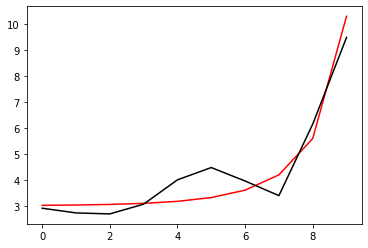

363000 0.02379335277094804
[2.89857964 2.71977289 2.68181989 3.05827055 3.99441946 4.46977618
 3.95346794 3.39037032 6.14431998 9.4815205 ]


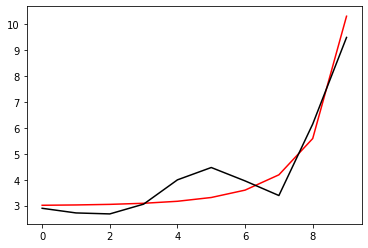

364100 0.016909525963269983
[2.89530692 2.71745492 2.67994998 3.05675992 3.99261606 4.46942723
 3.95467841 3.39243029 6.14616998 9.48148527]


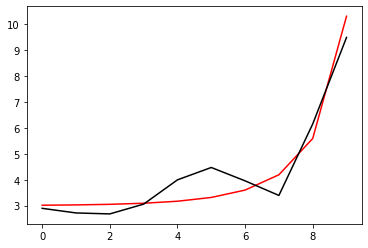

365200 0.012563264755105722
[2.89943883 2.72037334 2.68163809 3.05747036 3.99204632 4.46970859
 3.95615398 3.39448481 6.14784305 9.48145005]


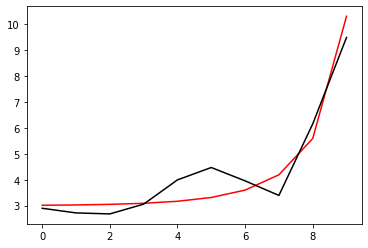

366300 0.011300203981464916
[2.90156829 2.72207098 2.68259356 3.05775203 3.99123337 4.46983495
 3.9575148  3.39644664 6.14945345 9.48141486]


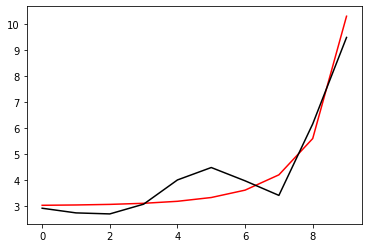

367400 0.0034901307162782547
[2.89829462 2.71987521 2.68085373 3.05631553 3.98945139 4.46945332
 3.9586552  3.39840533 6.15120001 9.48137968]


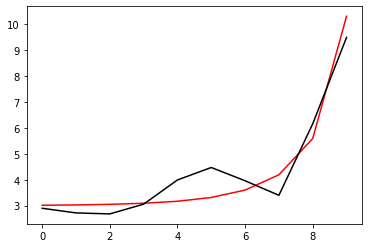

368500 0.030965546644719264
[2.89748307 2.71953736 2.68044122 3.05572805 3.9881344  4.46928186
 3.9598383  3.40027491 6.15278909 9.48134452]


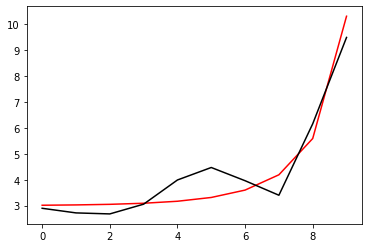

369600 0.021433021107814733
[2.89752681 2.71983189 2.68047917 3.05543334 3.98699024 4.46920382
 3.96106729 3.40215479 6.15436375 9.48130938]


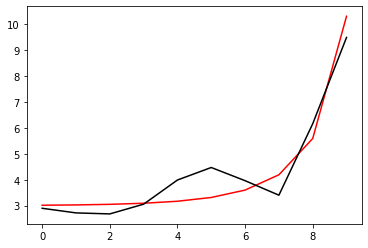

370700 0.028056034165009746
[2.909972   2.72852542 2.68613357 3.05874174 3.98805505 4.47054265
 3.96330067 3.40477019 6.15637667 9.48127426]


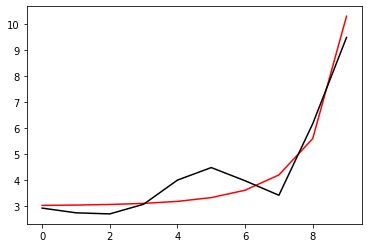

371800 0.0538518084496526
[2.90667264 2.72636832 2.68448075 3.05740605 3.98638667 4.4702646
 3.96454885 3.40684081 6.1582146  9.48123916]


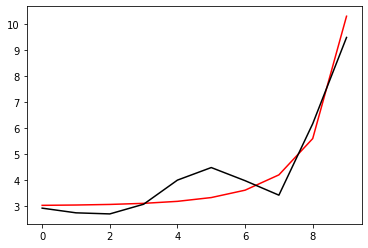

372900 0.03302398401725346
[2.90432964 2.72489199 2.68328239 3.05633066 3.984833   4.47000358
 3.96574865 3.4088122  6.15994066 9.48120408]


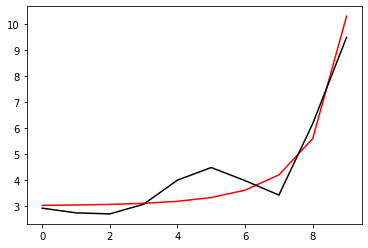

374000 0.02369209154350193
[2.89975937 2.72170927 2.68084015 3.0544198  3.98277793 4.46945076
 3.96678803 3.41072369 6.16168357 9.48116901]


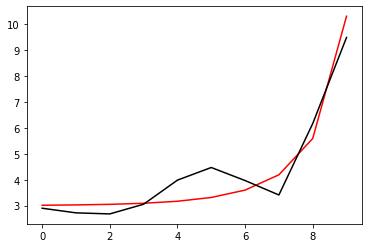

375100 0.016765830324866646
[2.89645897 2.71938367 2.67899609 3.05292005 3.98100037 4.46909197
 3.96797758 3.41275432 6.16350359 9.48113397]


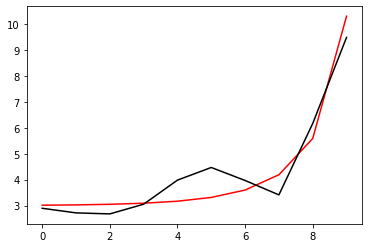

376200 0.01249894848907276
[2.90052117 2.7222626  2.68068768 3.05362684 3.98044764 4.46935674
 3.96942685 3.41477589 6.16514521 9.48109894]


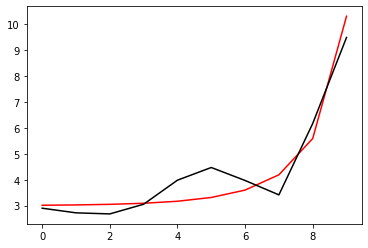

377300 0.011266322876380895
[2.90266655 2.72398085 2.68168824 3.05393322 3.97967021 4.46947973
 3.97077191 3.41671347 6.1667299  9.48106393]


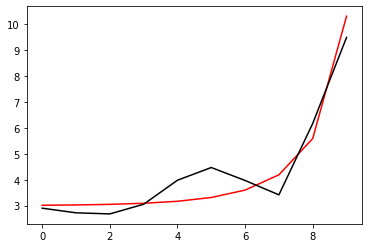

378400 0.003400821424910102
[2.89944213 2.721829   2.68000732 3.05252818 3.97792495 4.46909384
 3.9718937  3.41864293 6.16844515 9.48102894]


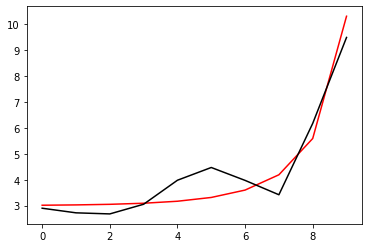

379500 0.030941986341350165
[2.89858798 2.7214674  2.67960672 3.05194304 3.97662918 4.46891081
 3.97305629 3.42048589 6.17000802 9.48099397]


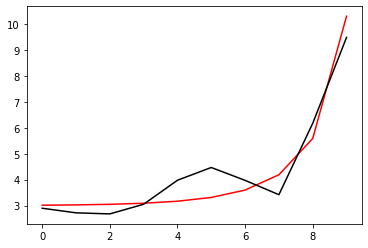

380600 0.021416372542473083
[2.89862092 2.72176077 2.67967202 3.05166071 3.97551195 4.46882418
 3.97426607 3.42233935 6.17155595 9.48095901]


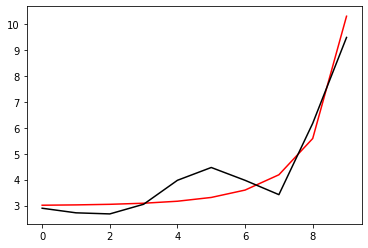

381700 0.027889450592973344
[2.91080372 2.73027955 2.68523835 3.05490937 3.97656211 4.47012812
 3.97646233 3.42491696 6.1735377  9.48092408]


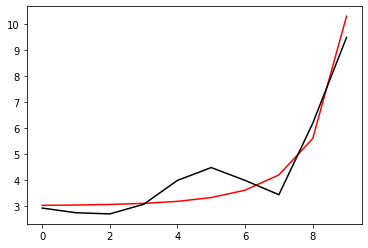

382800 0.05371495149053963
[2.90759634 2.72819898 2.68366808 3.0536226  3.9749417  4.46985362
 3.97769743 3.42696226 6.17534653 9.48088916]


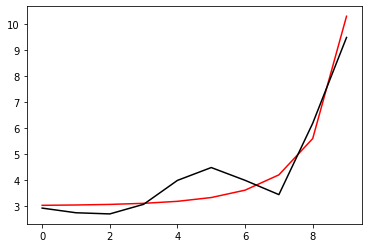

383900 0.03293639417312275
[2.90530514 2.72676818 2.68252885 3.05257955 3.97342463 4.46958798
 3.97887775 3.42890336 6.17704035 9.48085426]


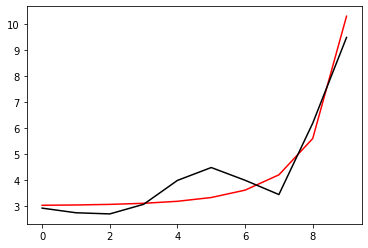

385000 0.02359575366260236
[2.90078826 2.72363279 2.68014732 3.05070308 3.97140839 4.46903382
 3.97990171 3.43078906 6.17875479 9.48081938]


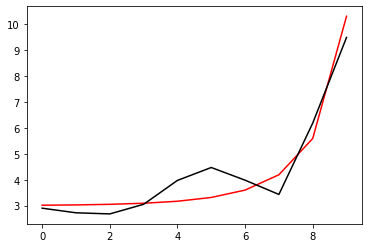

386100 0.016627909612163864
[2.89746064 2.72129994 2.67832786 3.04921551 3.96965692 4.46866628
 3.98107134 3.43279154 6.18054589 9.48078452]


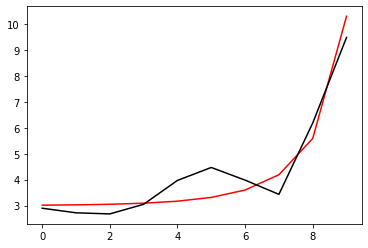

387200 0.012437337481921263
[2.90145234 2.72413893 2.68002111 3.04991967 3.96912139 4.46891561
 3.98249547 3.43478155 6.18215727 9.48074967]


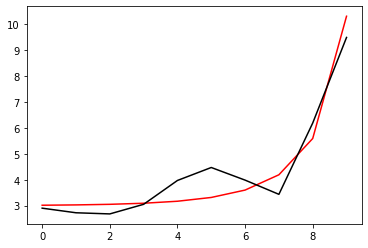

388300 0.011231814285618145
[2.90361549 2.72587928 2.68106636 3.05025269 3.96838019 4.46903667
 3.98382604 3.43669626 6.18371744 9.48071485]


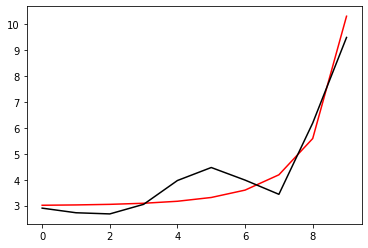

389400 0.003316336823321892
[2.90043835 2.72376996 2.67944198 3.04887967 3.96667158 4.46864747
 3.98493021 3.43859775 6.18540256 9.48068004]


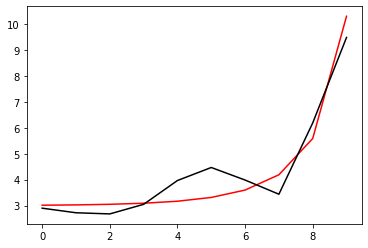

390500 0.030918920234980815
[2.89954276 2.72338549 2.67905242 3.04829834 3.96539741 4.46845401
 3.98607332 3.44041528 6.18694024 9.48064525]


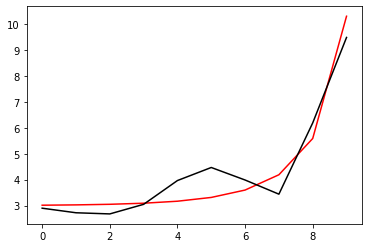

391600 0.021399907217233862
[2.8995645  2.72367744 2.67914343 3.0480294  3.96430725 4.46835981
 3.98726487 3.44224347 6.18846247 9.48061048]


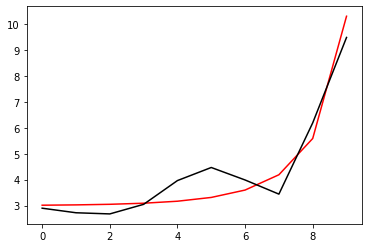

392700 0.027724147865570068
[2.91148602 2.73202223 2.68462056 3.05121957 3.96534292 4.46962997
 3.98942504 3.44478443 6.190414   9.48057572]


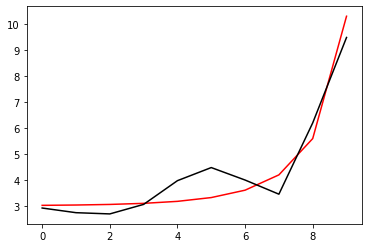

393800 0.05358311418271473
[2.9083732  2.73002021 2.68313301 3.04998396 3.96377149 4.46936059
 3.99064841 3.44680588 6.19219496 9.48054099]


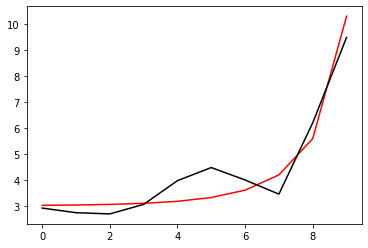

394900 0.032853616782320745
[2.90613111 2.72863292 2.68205014 3.04897349 3.96229082 4.46909125
 3.9918103  3.44871808 6.19385788 9.48050627]


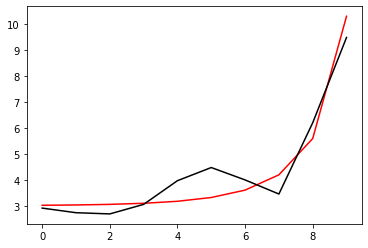

396000 0.02350411431704035
[2.90166593 2.72554361 2.67972711 3.04713198 3.96031333 4.46853661
 3.99281973 3.45057913 6.19554493 9.48047157]


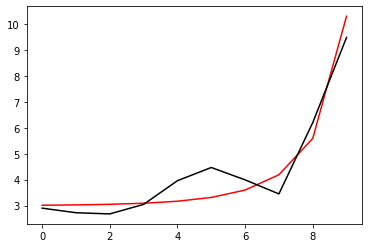

397100 0.01649555123682965
[2.89831189 2.72320393 2.67793112 3.04565775 3.95858821 4.46816139
 3.99397046 3.45255469 6.19730821 9.48043689]


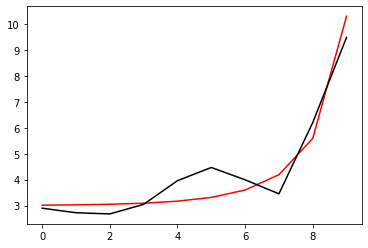

398200 0.012378246042767924
[2.9022328  2.72600272 2.67962444 3.04636025 3.95807009 4.46839645
 3.99537064 3.45451454 6.19889061 9.48040223]


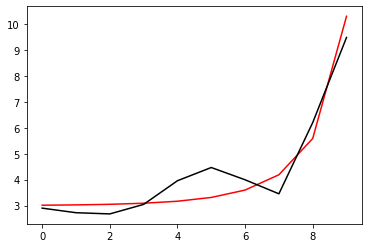

399300 0.011196510841247115
[2.90441603 2.72776682 2.68071423 3.04672183 3.95736594 4.46851708
 3.99668806 3.45640783 6.20042749 9.48036758]


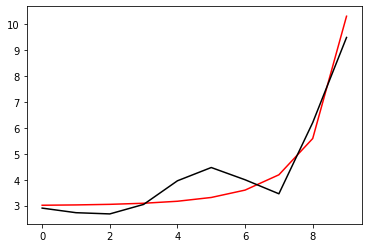

400400 0.0032364332030108806
[2.90128399 2.72569835 2.6791439  3.04538117 3.95569383 4.46812544
 3.99777559 3.45828265 6.20208372 9.48033295]


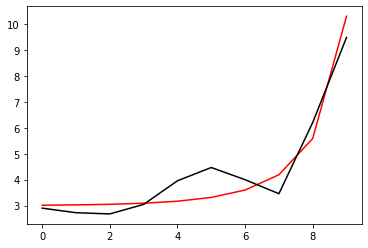

401500 0.03089638886278643
[2.90034831 2.72529186 2.67876461 3.04480501 3.95444165 4.46792272
 3.99890028 3.46007593 6.20359725 9.48029834]


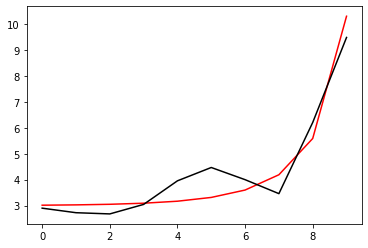

402600 0.021383615534061668
[2.90035855 2.72558208 2.67887979 3.04455032 3.95337868 4.46782197
 4.00007459 3.46188006 6.20509487 9.48026375]


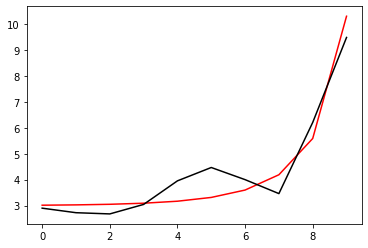

403700 0.02755996882677158
[2.91202014 2.73375366 2.68426672 3.04768317 3.95440008 4.46905945
 4.00219972 3.46438557 6.20701717 9.48022918]


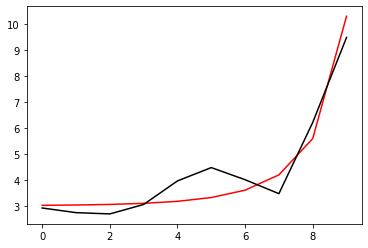

404800 0.05345590722697443
[2.90900416 2.73183185 2.68286195 3.04650073 3.95287858 4.46879675
 4.00341277 3.46638469 6.20877156 9.48019462]


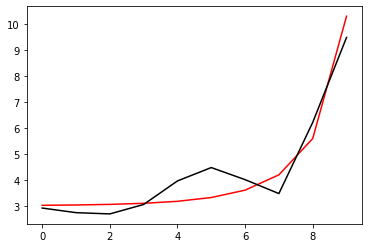

405900 0.03277534444315086
[2.90680849 2.73048595 2.68183268 3.04552294 3.9514341  4.4685246
 4.00455727 3.4682694  6.21040494 9.48016008]


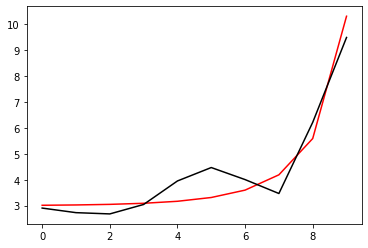

407000 0.02341696091792982
[2.90239301 2.72744111 2.67956581 3.04371666 3.94949519 4.46797031
 4.00555306 3.47010698 6.21206575 9.48012556]


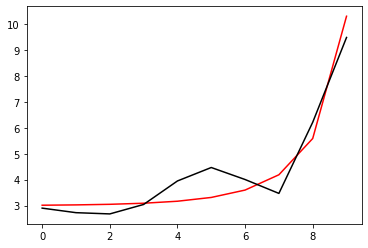

408100 0.016368542696001295
[2.8990135  2.72509501 2.67779225 3.04225686 3.9477967  4.46758851
 4.00668596 3.47205689 6.21380236 9.48009106]


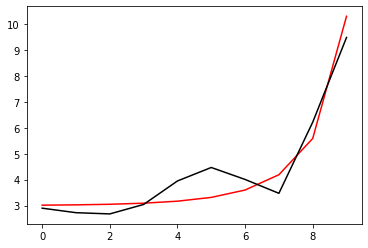

409200 0.012321504702814822
[2.90286375 2.72785347 2.67948427 3.04295864 3.94729624 4.46781048
 4.00806338 3.47398802 6.21535706 9.48005657]


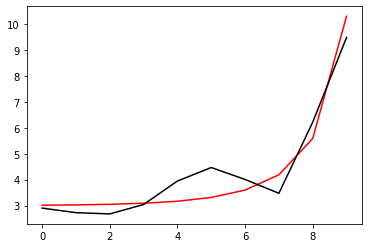

410300 0.011160234163582484
[2.90506981 2.72964323 2.68061874 3.04335073 3.94663005 4.46793221
 4.00936903 3.47586138 6.21687192 9.4800221 ]


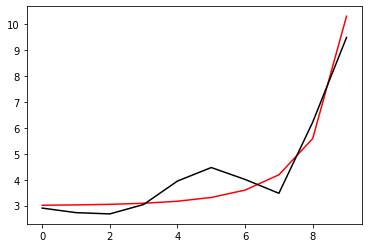

411400 0.0031608819397528423
[2.90198048 2.72761366 2.67909991 3.04204255 3.94499425 4.46753901
 4.01044092 3.47771086 6.21850056 9.47998765]


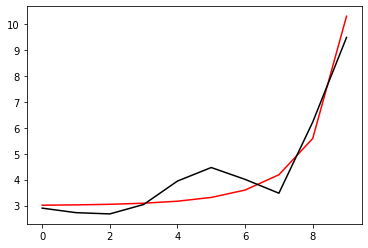

412500 0.030874435836826173
[2.90100622 2.72718604 2.67873026 3.04147287 3.94376449 4.4673282
 4.01154828 3.47948115 6.21999101 9.47995322]


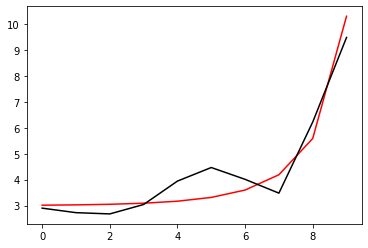

413600 0.021367491519340934
[2.90100474 2.72747418 2.67886813 3.0412332  3.94272886 4.46722192
 4.01270637 3.48126244 6.22146514 9.4799188 ]


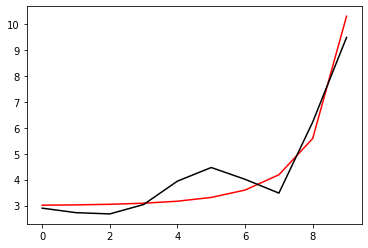

414700 0.027396767480076807
[2.91240777 2.7354733  2.68416399 3.04430982 3.94373622 4.46842783
 4.01479756 3.48373372 6.22335924 9.4798844 ]


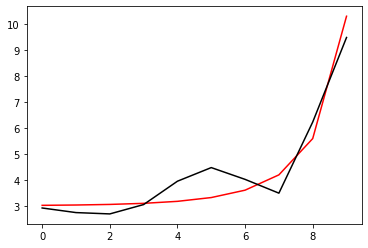

415800 0.05333293376734299
[2.90949068 2.73363313 2.68284199 3.04318239 3.94226559 4.46817337
 4.0160017  3.48571209 6.22508844 9.47985002]


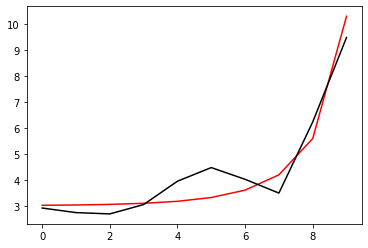

416900 0.03270129418554129
[2.9073388  2.73232644 2.68186366 3.04223729 3.94085709 4.46789931
 4.01712989 3.48757075 6.22669367 9.47981566]


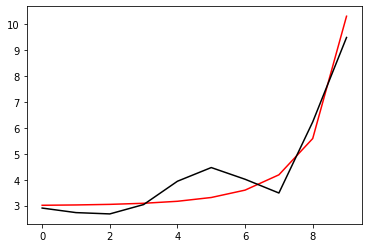

418000 0.02333409653458839
[2.90297065 2.72932412 2.67965045 3.04046631 3.93895654 4.46734618
 4.01811296 3.4893861  6.22832943 9.47978131]


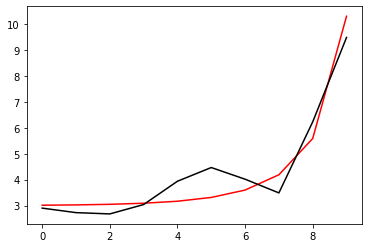

419100 0.016246675456886094
[2.89956668 2.72697198 2.67789839 3.03902194 3.93728498 4.4669589
 4.01922911 3.49131166 6.23004056 9.47974699]


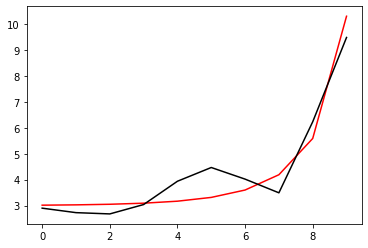

420200 0.01226695781646039
[2.9033467  2.72969014 2.67958794 3.03972391 3.9368025  4.46716899
 4.02058503 3.49321553 6.23156887 9.47971268]


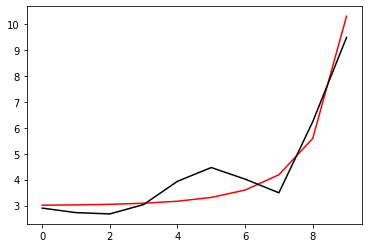

421300 0.011122789087277783
[2.90557881 2.73150773 2.68076754 3.04014856 3.93617531 4.46729345
 4.02188038 3.49507054 6.23306304 9.47967838]


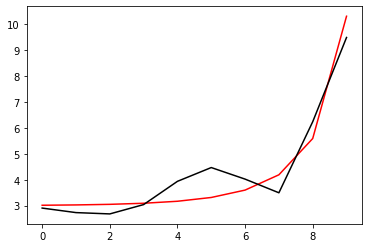

422400 0.003089471459039838
[2.9025296  2.72951492 2.67929763 3.03887283 3.93457562 4.46689954
 4.02293764 3.49689605 6.2346654  9.47964411]


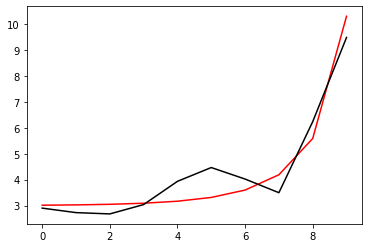

423500 0.03085310759127878
[2.90151838 2.72906709 2.67893713 3.03831091 3.93336876 4.46668184
 4.0240288  3.49864461 6.2361339  9.47960985]


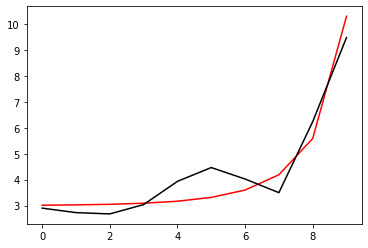

424600 0.02135153171179615
[2.90150498 2.72935278 2.67909634 3.03808698 3.93236063 4.46657109
 4.02517173 3.50040433 6.2375857  9.4795756 ]


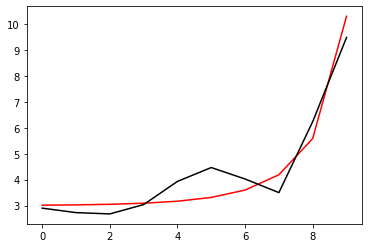

425700 0.027234402082910978
[2.91265077 2.73718012 2.68430033 3.04110837 3.93335421 4.46774655
 4.02723008 3.50284265 6.23945265 9.47954138]


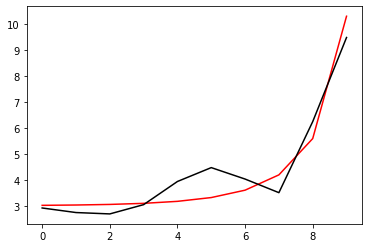

426800 0.0532137897854685
[2.90983446 2.73542287 2.68306111 3.04003769 3.93193541 4.46750192
 4.02842682 3.50480193 6.24115812 9.47950717]


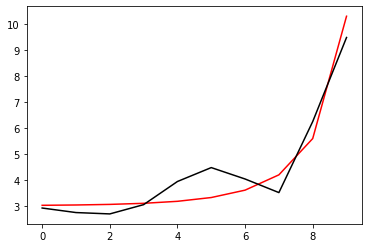

427900 0.032631207018500724
[2.90772372 2.73415319 2.68213113 3.03912522 3.93056272 4.46722687
 4.02953979 3.506636   6.24273661 9.47947298]


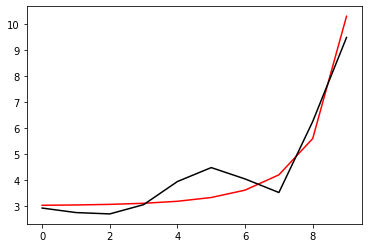

429000 0.023255342540138935
[2.90340023 2.73119117 2.67996904 3.03738945 3.92870029 4.46667568
 4.03051108 3.50843039 6.24434857 9.47943881]


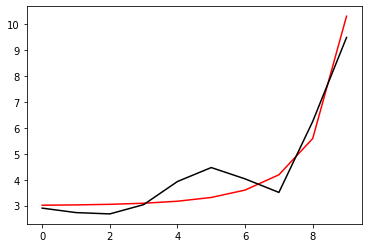

430100 0.01612974810194412
[2.89997275 2.7288333  2.67823759 3.03596142 3.927056   4.46628405
 4.03161162 3.51033295 6.24603544 9.47940465]


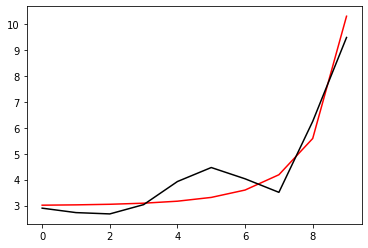

431200 0.012214461502420504
[2.90368317 2.73151132 2.67992368 3.0366645  3.92659187 4.46648349
 4.03294729 3.51221106 6.24753869 9.47937052]


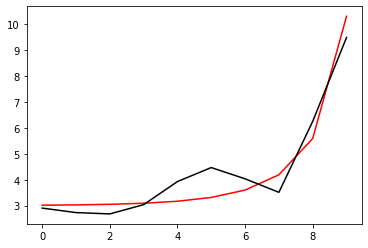

432300 0.011083957086019485
[2.90594499 2.73335924 2.68114925 3.03712389 3.92600488 4.46661241
 4.0342339  3.51404936 6.24901357 9.47933639]


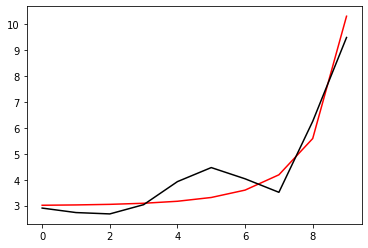

433400 0.0030220088058026213
[2.90293315 2.73140091 2.67972568 3.03588049 3.92444109 4.46621867
 4.03527759 3.51585231 6.25059102 9.47930229]


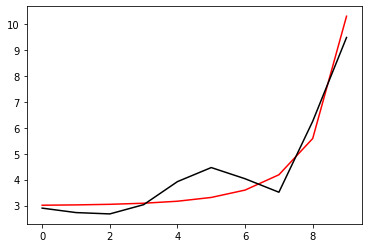

434500 0.03083245337510317
[2.90188666 2.73093384 2.679374   3.03532758 3.92325767 4.46599533
 4.03635372 3.51758046 6.25203872 9.4792682 ]


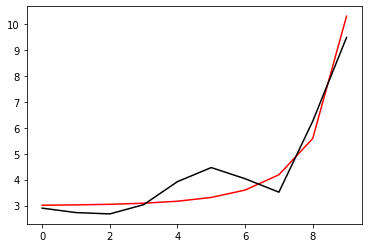

435600 0.02133573425534616
[2.90186115 2.73121671 2.6795533  3.03512007 3.92227729 4.46588117
 4.0374826  3.51931993 6.25346937 9.47923413]


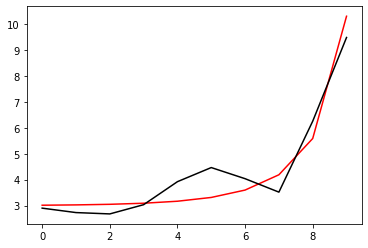

436700 0.027072729121896566
[2.9127508  2.73887282 2.68466467 3.03808716 3.92325737 4.46702734
 4.03950924 3.52172656 6.25531028 9.47920008]


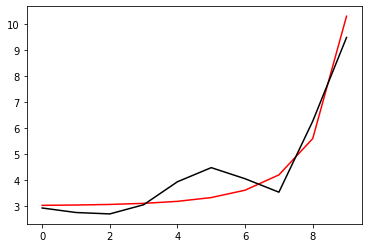

437800 0.053098062860677024
[2.91003707 2.7371997  2.68350833 3.03707496 3.92189144 4.46679418
 4.04070014 3.52366849 6.25699353 9.47916604]


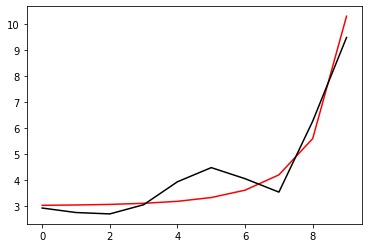

438900 0.03256484733334651
[2.90796485 2.73596483 2.68262425 3.03619503 3.92055444 4.46651909
 4.04179905 3.52547948 6.25854675 9.47913202]


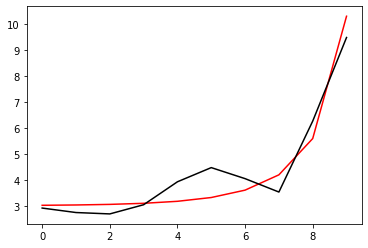

440000 0.02318054078012709
[2.903683   2.73304068 2.68051067 3.03449423 3.91872987 4.46597064
 4.04275953 3.52725423 6.26013619 9.47909802]


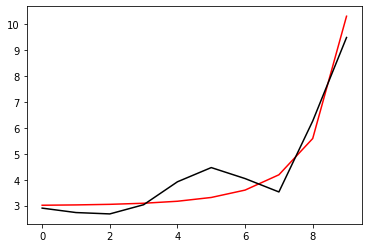

441100 0.016017568891502618
[2.9002328  2.73067728 2.67879901 3.03308343 3.91711322 4.46557581
 4.04384562 3.52913518 6.26180007 9.47906404]


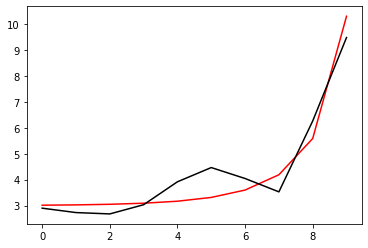

442200 0.012163881853241276
[2.9038744  2.73331539 2.68048084 3.03378855 3.91666789 4.4657659
 4.04516238 3.53098907 6.26327963 9.47903007]


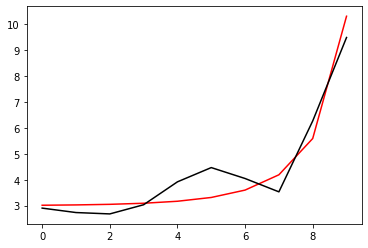

443300 0.011043488544491055
[2.90617009 2.73519654 2.68175359 3.03428502 3.91612249 4.46590112
 4.04644191 3.53281239 6.26473665 9.47899612]


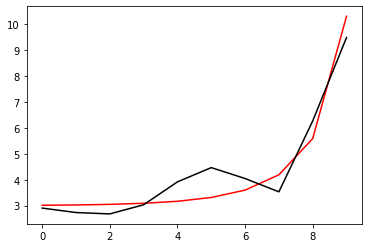

444400 0.0029583209951784383
[2.90319265 2.73327028 2.68037382 3.03307376 3.91459443 4.46550845
 4.04747312 3.53459424 6.26629061 9.47896218]


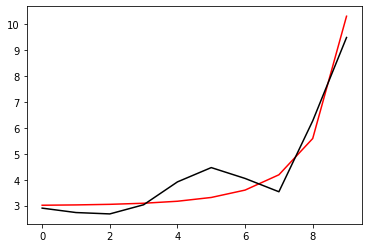

445500 0.030812525470706717
[2.90211268 2.73278503 2.68003081 3.03253115 3.91343509 4.46528076
 4.04853546 3.53630334 6.26771869 9.47892826]


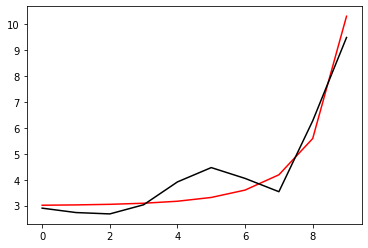

446600 0.021320098162371907
[2.90207483 2.7330647  2.68022908 3.03234074 3.91248275 4.46516433
 4.04965143 3.53802392 6.26912944 9.47889436]


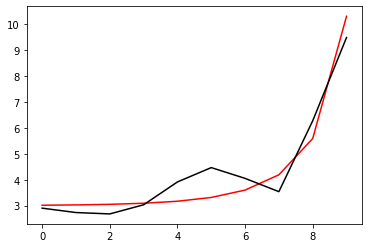

447700 0.026911597859700258
[2.9127091  2.74054994 2.68524711 3.03525439 3.91344965 4.46628236
 4.05164755 3.54040021 6.27094543 9.47886048]


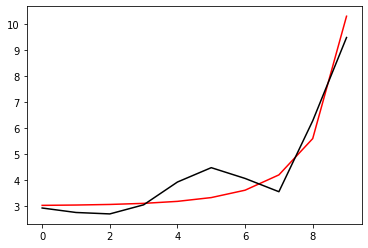

448800 0.05298532926082423
[2.91009973 2.7389622  2.6841739  3.0343024  3.91213772 4.46606243
 4.05283428 3.54232662 6.27260806 9.47882661]


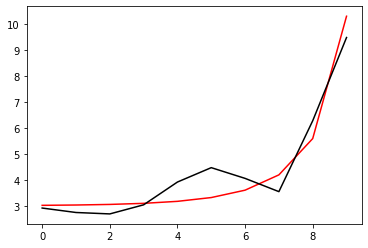

449900 0.032502002288556625
[2.90806341 2.73775997 2.6833334  3.03345493 3.91083636 4.46578829
 4.05392032 3.54411608 6.27413748 9.47879276]


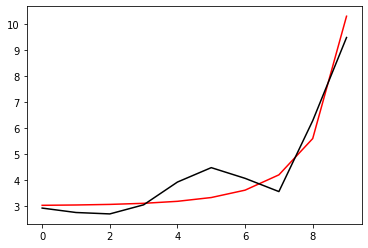

451000 0.023109555545787665
[2.90381984 2.73487102 2.68126567 3.03178877 3.90904943 4.46524342
 4.05487102 3.54587258 6.27570577 9.47875892]


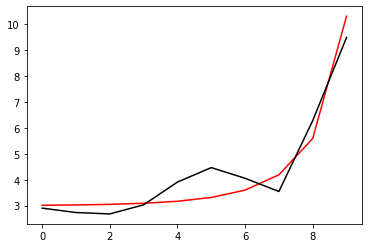

452100 0.01590995789864369
[2.90034747 2.73250218 2.67957302 3.03039603 3.90746084 4.46484659
 4.05594389 3.54773336 6.27734796 9.47872511]


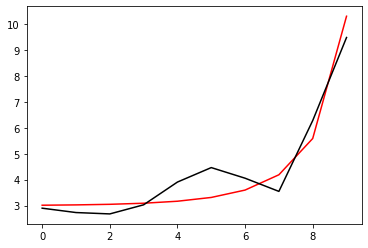

453200 0.012115093349746878
[2.90392109 2.7351007  2.68124997 3.03110415 3.90703484 4.46502866
 4.05724309 3.5495646  6.27880523 9.47869131]


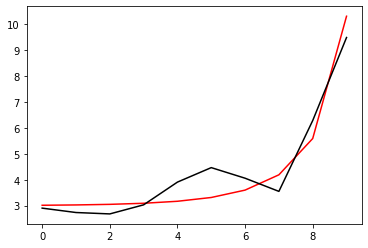

454300 0.011001093404826618
[2.90625534 2.73701841 2.68257159 3.0316403  3.90653265 4.46517218
 4.05851733 3.55137478 6.28024591 9.47865752]


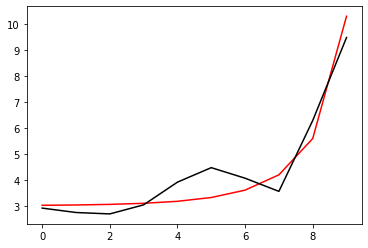

455400 0.0028982563206928634
[2.90330915 2.73512171 2.68123313 3.03046095 3.9050402  4.46478152
 4.05953723 3.55313702 6.28177782 9.47862375]


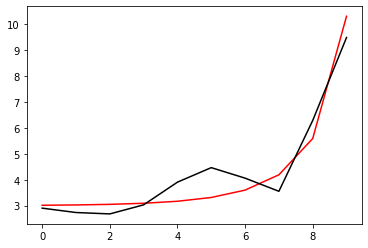

456500 0.03079337962895105
[2.90219752 2.73461943 2.68089883 3.02992998 3.90390568 4.46455087
 4.06058707 3.55482852 6.28318753 9.47859   ]


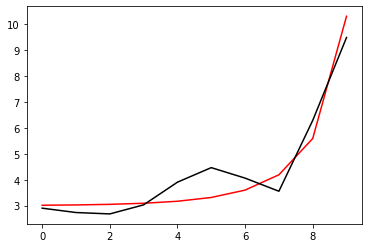

457600 0.021304622716612594
[2.90214704 2.73489553 2.68111508 3.02975736 3.90298176 4.46443334
 4.06169135 3.55653163 6.28457965 9.47855627]


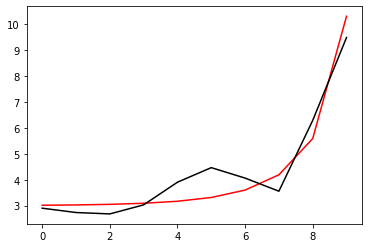

458700 0.026750845160024482
[2.91252624 2.74221003 2.68603903 3.03261835 3.90393583 4.46552444
 4.06365817 3.55887894 6.2863719  9.47852255]


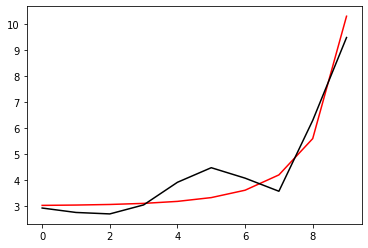

459800 0.05287514922243082
[2.91002309 2.74070903 2.6850494  3.03172843 3.90267919 4.46531958
 4.06484252 3.56079177 6.28801561 9.47848885]


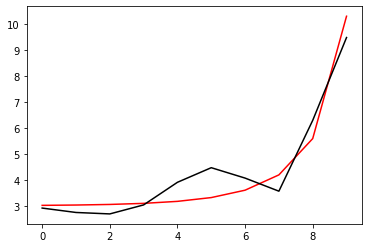

460900 0.032442481289651284
[2.90801998 2.7395373  2.68425032 3.03091338 3.90141351 4.46504746
 4.06591695 3.56256132 6.28952275 9.47845517]


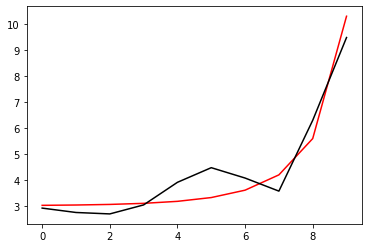

462000 0.023042275617716268
[2.90381098 2.73668068 2.6822258  3.02928147 3.89966402 4.46450704
 4.06685895 3.564301   6.29107128 9.4784215 ]


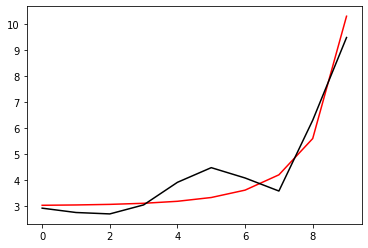

463100 0.01580674886875652
[2.90031669 2.73430632 2.6805514  3.02790757 3.89810397 4.46410946
 4.06791989 3.56614313 6.29269315 9.47838785]


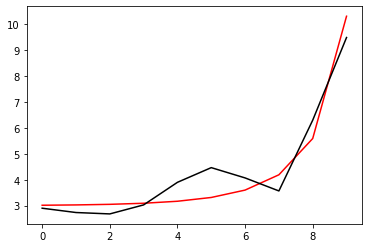

464200 0.01206797742265532
[2.90382317 2.73686564 2.68222302 3.02861971 3.89769795 4.46428491
 4.06920298 3.56795336 6.29412958 9.47835421]


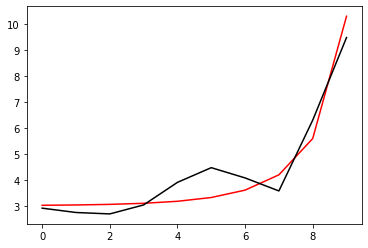

465300 0.010956429544442432
[2.90620127 2.73882376 2.6835957  3.02919843 3.89724087 4.46443895
 4.07047388 3.56975234 6.29555551 9.47832059]


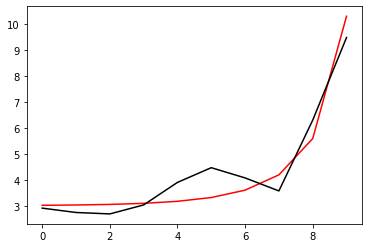

466400 0.0028416858017456643
[2.90328293 2.736954   2.68229613 3.02805074 3.89578397 4.4640513
 4.07148368 3.57149657 6.29706689 9.47828699]


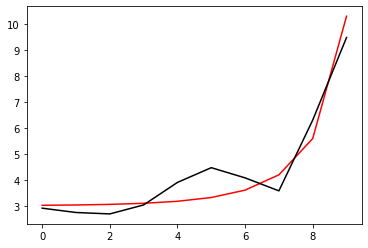

467500 0.030775075721107204
[2.90214152 2.73643593 2.68197079 3.02753285 3.89467514 4.46381914
 4.07252241 3.57317195 6.2984595  9.4782534 ]


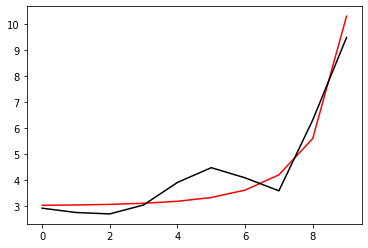

468600 0.021289306988413352
[2.90207804 2.73670811 2.68220417 3.02737876 3.89378013 4.46370179
 4.0736163  3.5748591  6.29983434 9.47821983]


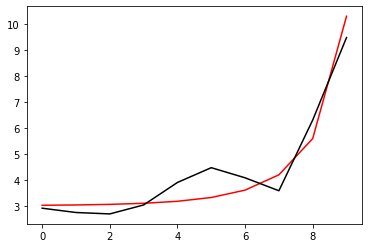

469700 0.026590290298734515
[2.9122019  2.7438517  2.68703327 3.03018782 3.89472176 4.46476718
 4.0755551  3.57717885 6.30160406 9.47818628]


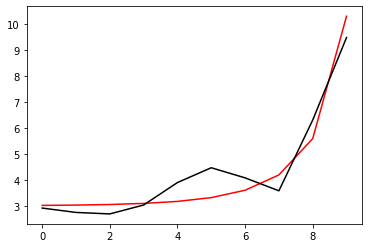

470800 0.052767060133536874
[2.90980698 2.74243899 2.686128   3.02936198 3.8935219  4.46457943
 4.07673899 3.57908019 6.30323063 9.47815274]


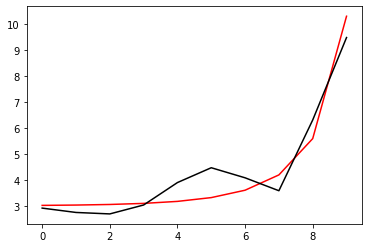

471900 0.032386115673722085
[2.90783436 2.74129567 2.68536832 3.02857937 3.89229206 4.46431048
 4.07780315 3.5808315  6.30471707 9.47811922]


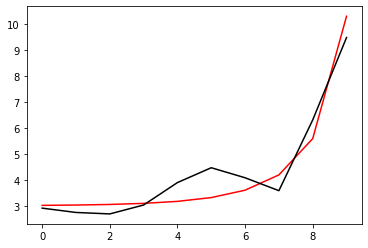

473000 0.02297861664990559
[2.90365583 2.7384683  2.68338434 3.02698127 3.89057987 4.46377544
 4.07873763 3.58255589 6.30624731 9.47808572]


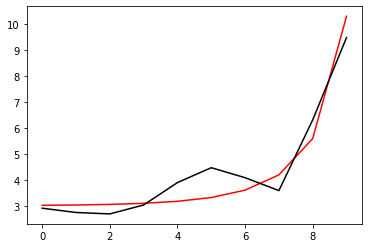

474100 0.015707790956850678
[2.90013943 2.73608814 2.68172746 3.025627   3.88904891 4.46337843
 4.07978801 3.58438095 6.3078503  9.47805223]


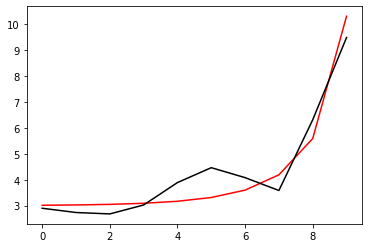

475200 0.012022421106510871
[2.90357957 2.73860869 2.68339347 3.02634424 3.88866363 4.46354876
 4.08105652 3.58617188 6.30926737 9.47801876]


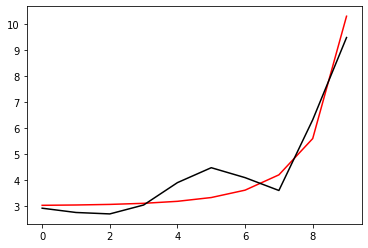

476300 0.010909087997111001
[2.90600747 2.74061169 2.68482001 3.02696881 3.88825387 4.46371572
 4.08232619 3.58796175 6.31068025 9.4779853 ]


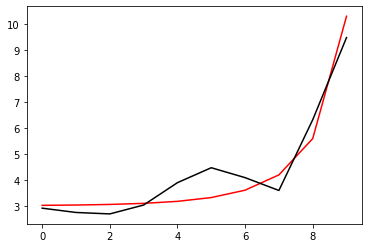

477400 0.0027885049698801725
[2.90311335 2.73876616 2.68355697 3.02585253 3.88683256 4.46333217
 4.0833272  3.58968964 6.31217268 9.47795186]


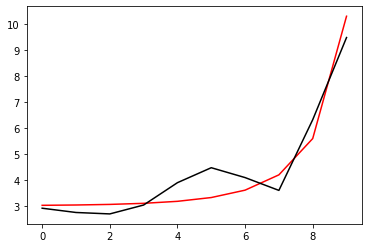

478500 0.03075767861962528
[2.90194407 2.73823367 2.68324108 3.02534929 3.88575046 4.46310009
 4.08435631 3.59135048 6.31354954 9.47791844]


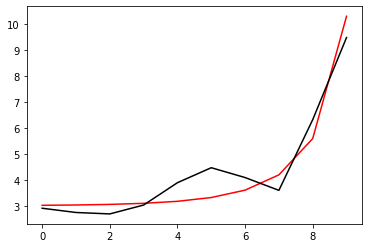

479600 0.021274149438431082
[2.90186709 2.73850157 2.6834909  3.02521455 3.88488497 4.46298428
 4.08544122 3.59302325 6.31490849 9.47788503]


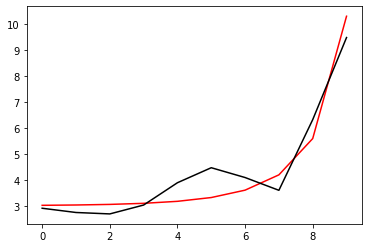

480700 0.026429729453635628
[2.91173463 2.74547369 2.68822429 3.02797233 3.8858146  4.46402526
 4.08735335 3.59531696 6.31665698 9.47785164]


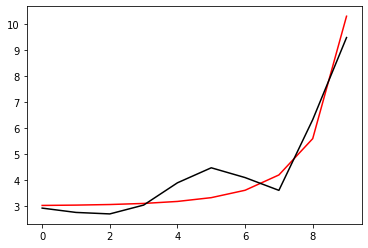

481800 0.05266056713284828
[2.90945019 2.74415116 2.68740453 3.02721284 3.88467329 4.46385682
 4.08853889 3.59720903 6.31826831 9.47781827]


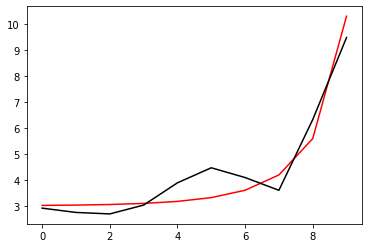

482900 0.03233275871540412
[2.90750526 2.74303417 2.68668243 3.02646279 3.88347957 4.46359231
 4.08959424 3.59894386 6.31973568 9.47778491]


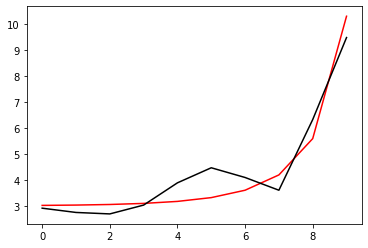

484000 0.022918524194086402
[2.90335265 2.74023278 2.68473633 3.02489805 3.88180463 4.46306366
 4.09052246 3.60065459 6.3212492  9.47775157]


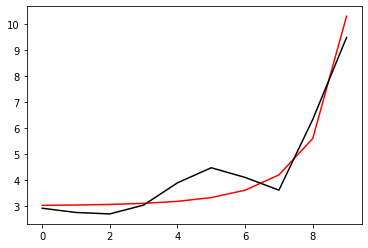

485100 0.015612950503339398
[2.89981347 2.73784631 2.68309624 3.02356418 3.88030341 4.46266864
 4.09156375 3.60246427 6.32283481 9.47771824]


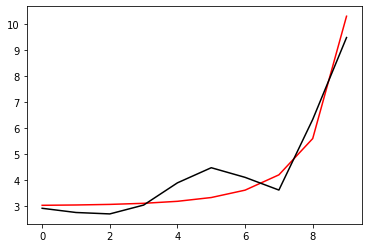

486200 0.011978315730636966
[2.90318793 2.74032852 2.68475653 3.02428771 3.87993976 4.46283546
 4.09281929 3.60423769 6.32423409 9.47768493]


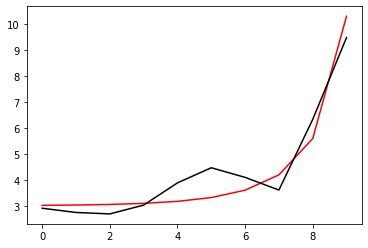

487300 0.010858573770910842
[2.90567242 2.74238158 2.68624041 3.02496185 3.87957993 4.46301804
 4.09409009 3.60602073 6.32563573 9.47765164]


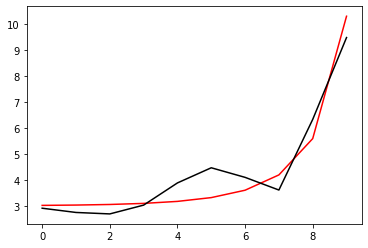

488400 0.0027386362280956084
[2.90279856 2.74055746 2.68501163 3.02387682 3.87819438 4.46263978
 4.09508375 3.60773404 6.32711086 9.47761836]


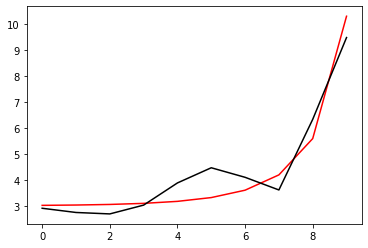

489500 0.030741259332496287
[2.90160338 2.74001206 2.68470594 3.02338995 3.87714021 4.46240951
 4.09610486 3.60938205 6.32847341 9.4775851 ]


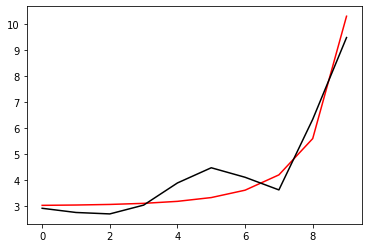

490600 0.021259147589222895
[2.90151225 2.74027535 2.68497169 3.02327548 3.87630502 4.46229674
 4.0971823  3.61104213 6.32981796 9.47755185]


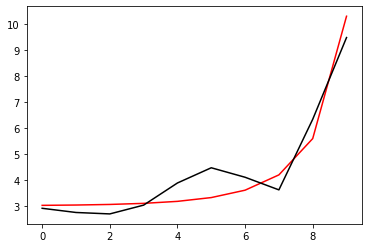

491700 0.026268929527616572
[2.9111216  2.74707498 2.68960838 3.02598256 3.87722315 4.46331465
 4.09906917 3.61331138 6.33154656 9.47751862]


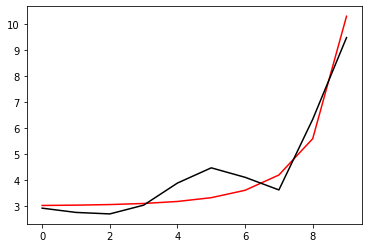

492800 0.05255513035462722
[2.90895028 2.7458449  2.68887577 3.02529204 3.87614246 4.46316802
 4.10025872 3.61519661 6.33314471 9.47748541]


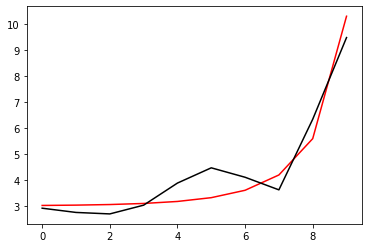

493900 0.03228228609276038
[2.9070301  2.74475224 2.68818963 3.0245748  3.87498535 4.46290934
 4.10130683 3.61691685 6.33459474 9.47745221]


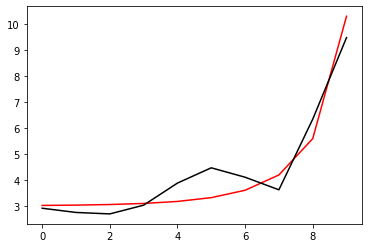

495000 0.022861977729012366
[2.90289839 2.74197328 2.68627875 3.02304298 3.87334769 4.46238822
 4.10223017 3.61861566 6.33609318 9.47741903]


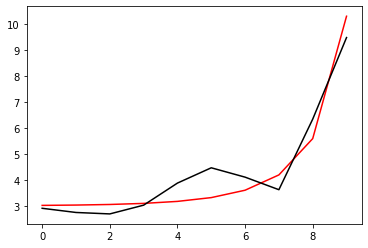

496100 0.015522113027907403
[2.89933512 2.7395797  2.6846547  3.0217303  3.87187698 4.4619967
 4.10326396 3.62041177 6.33766302 9.47738586]


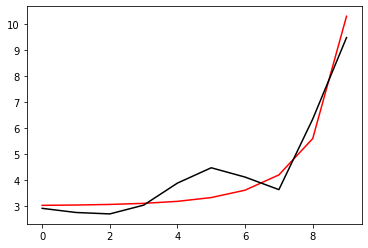

497200 0.011935555587102104
[2.9026444  2.74202403 2.68630936 3.02246143 3.87153604 4.46216176
 4.1045083  3.6221696  6.33904615 9.47735271]


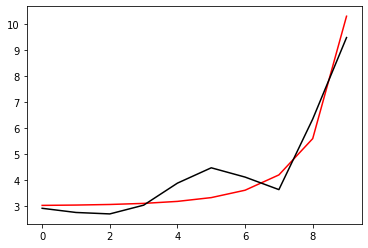

498300 0.010804280483349993
[2.9051932  2.74413317 2.68785487 3.02318944 3.87122921 4.462363
 4.10578286 3.62394831 6.34043851 9.47731958]


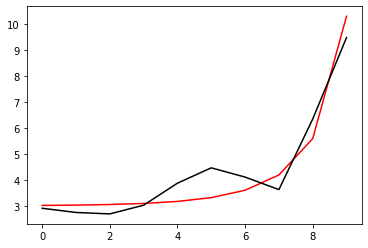

499400 0.002692032078388051
[2.90233529 2.74232751 2.68665815 3.02213555 3.86987971 4.46199135
 4.10677072 3.62564894 6.34189812 9.47728646]


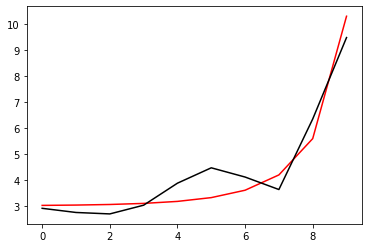

In [48]:
optimizer=tf.optimizers.SGD(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

0 0.022837450503464037
[2.90264076 2.74275636 2.68704249 3.02227861 3.86961188 4.46209807
 4.10753128 3.62673966 6.34279289 9.4772684 ]


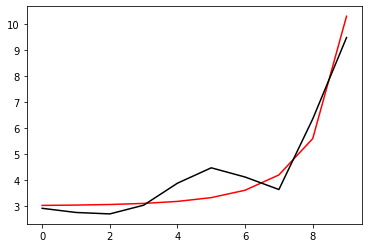

1100 0.015482120574289871
[2.89906592 2.74035919 2.68542549 3.02097584 3.86815533 4.46170869
 4.10856224 3.62853023 6.34435613 9.47723531]


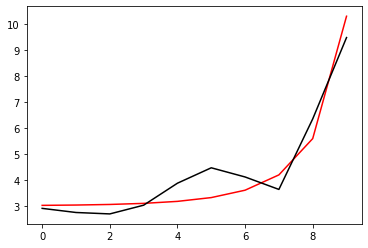

2200 0.011916535670339783
[2.90234567 2.74278644 2.68707765 3.02171089 3.86782512 4.46187357
 4.10980211 3.63028165 6.3457325  9.47720223]


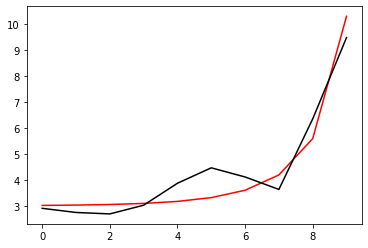

3300 0.010778155523741503
[2.90492655 2.74492334 2.68865284 3.022465   3.86754354 4.4620844
 4.11107933 3.63205929 6.34712134 9.47716917]


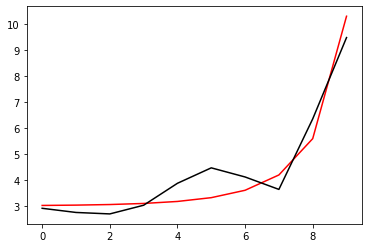

4400 0.002671922664969126
[2.90207435 2.74312504 2.68747    3.02142525 3.86621058 4.46171625
 4.11206511 3.63375483 6.34857451 9.47713612]


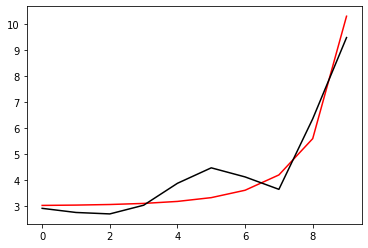

5500 0.0307192858935105
[2.90084506 2.74256389 2.68718111 3.02096575 3.86519972 4.46149206
 4.11307781 3.63538749 6.349919   9.47710309]


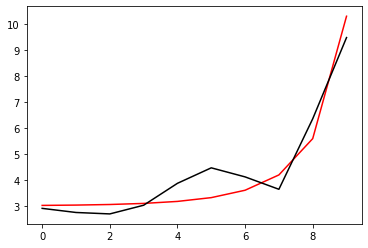

6600 0.021237596736294165
[2.90073182 2.74281989 2.68746951 3.02088274 3.86441039 4.46138674
 4.11414744 3.63703243 6.35124549 9.47707008]


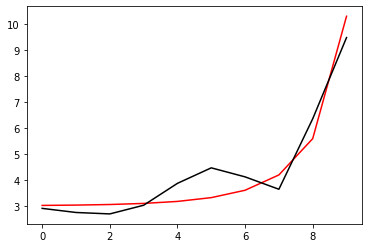

7700 0.026034047353012613
[2.90996011 2.74936569 2.69196348 3.02351697 3.86531282 4.46237371
 4.11600037 3.63926918 6.35294778 9.47703708]


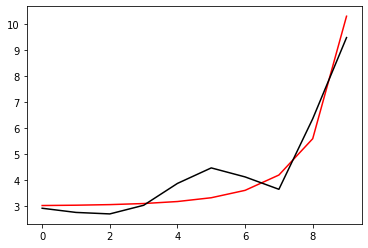

8800 0.0524023961233909
[2.90795908 2.74827532 2.69136184 3.02293245 3.86432492 4.4622639
 4.1172005  3.64114932 6.35453077 9.4770041 ]


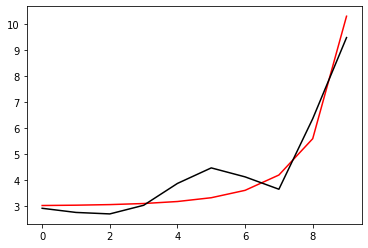

9900 0.03221381892107282
[2.90606933 2.74721446 2.69072549 3.0222637  3.8632223  4.46201655
 4.11824124 3.64285199 6.35595888 9.47697113]


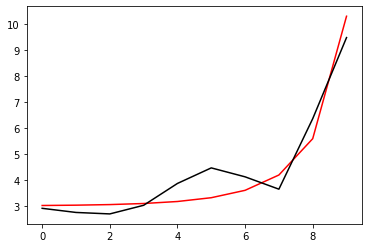

11000 0.022786108002740266
[2.9019578  2.74446128 2.68886112 3.02077907 3.86163925 4.46150868
 4.1191603  3.64453691 6.35743862 9.47693818]


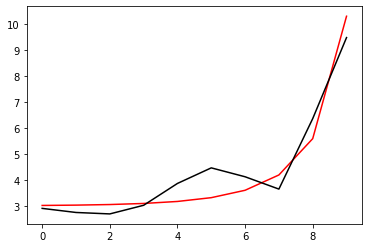

12100 0.015396946375219251
[2.89835564 2.7420552  2.68725903 3.01949872 3.86021456 4.46112529
 4.12018637 3.64631683 6.35898865 9.47690524]


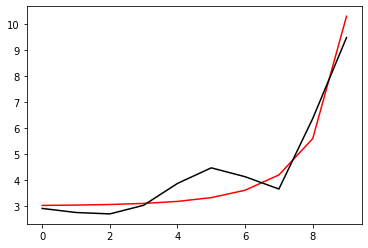

13200 0.011875546316993255
[2.90157045 2.74444516 2.68890599 3.02024356 3.859909   4.46129128
 4.1214179  3.64805572 6.36035149 9.47687232]


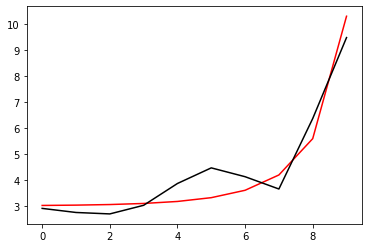

14300 0.010716973316231088
[2.90422896 2.74664881 2.69055081 3.02105912 3.85968596 4.46152595
 4.12270331 3.64983316 6.36173425 9.47683942]


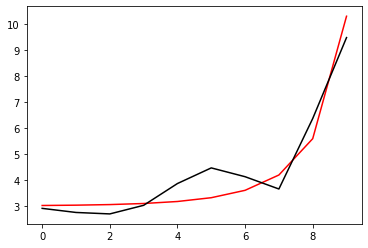

15400 0.0026300547387401057
[2.90138562 2.74486436 2.689397   3.02005054 3.85838982 4.46116666
 4.1236859  3.65151911 6.36317472 9.47680653]


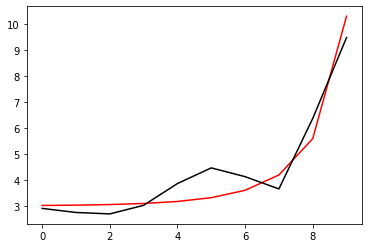

16500 0.030705619523492142
[2.90013539 2.74429476 2.68912151 3.01961269 3.85741098 4.46094936
 4.12469533 3.65314376 6.36450888 9.47677366]


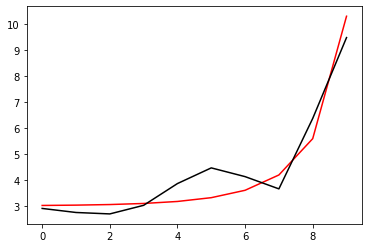

17600 0.02122295835953715
[2.90000559 2.74454535 2.68942545 3.01955297 3.85665477 4.46085154
 4.12576197 3.65478083 6.36582513 9.4767408 ]


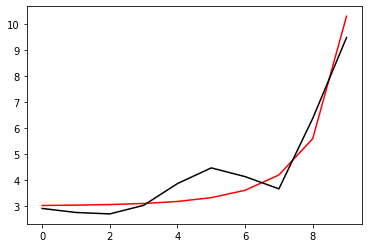

18700 0.025871421626148954
[2.90896624 2.75091364 2.69381958 3.02213767 3.85754725 4.46181921
 4.12759369 3.65699758 6.36751131 9.47670796]


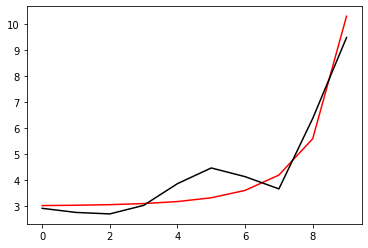

19800 0.052296814833628004
[2.90708726 2.74992398 2.69331198 3.02163079 3.85662709 4.46173884
 4.12880491 3.65887801 6.36908698 9.47667513]


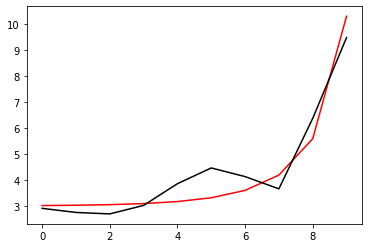

20900 0.032170051771190554
[2.90521425 2.74888254 2.6927085  3.02099624 3.85556317 4.46150158
 4.12984306 3.6605714  6.3705025  9.47664232]


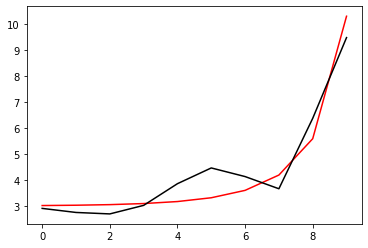

22000 0.02273844479163678
[2.90110855 2.74614189 2.69087283 3.01954369 3.85401817 4.46100468
 4.13076139 3.66224943 6.37197184 9.47660953]


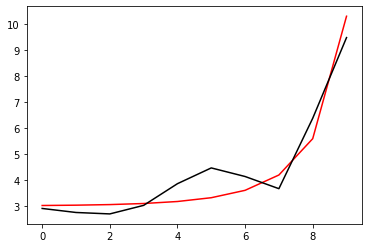

23100 0.015315592464566525
[2.89747566 2.74372509 2.68928481 3.01828667 3.85262652 4.46062923
 4.13178463 3.66402096 6.37351066 9.47657675]


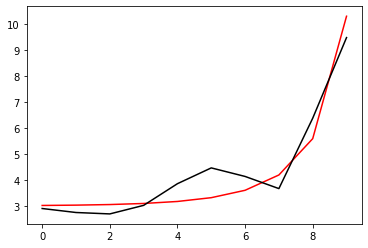

24200 0.011835645871433794
[2.90062524 2.7460781  2.69092713 3.01904309 3.85234728 4.46079859
 4.13301007 3.66574968 6.37486196 9.47654399]


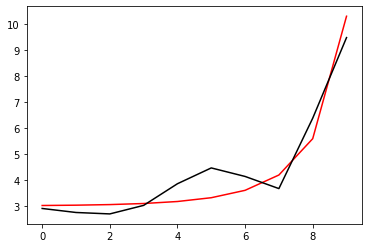

25300 0.010649806534245215
[2.90337238 2.74835746 2.69264857 3.01992645 3.85218748 4.46106135
 4.13430728 3.66753022 6.37624115 9.47651124]


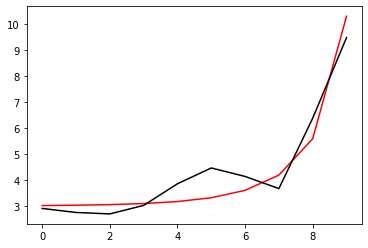

26400 0.002591495019412204
[2.9005323  2.74658343 2.69152184 3.01894926 3.850929   4.46071275
 4.13528875 3.66920898 6.37767108 9.47647851]


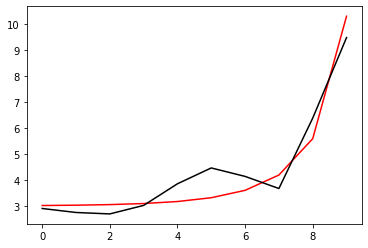

27500 0.030693246683399854
[2.8992632  2.74600758 2.69126175 3.01853582 3.84998443 4.4605049
 4.13629728 3.67082797 6.37899681 9.47644579]


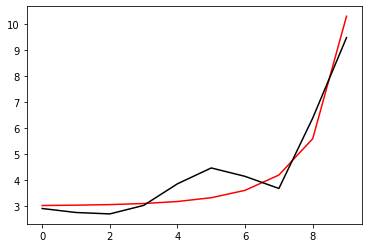

28600 0.021208456320996577
[2.89911538 2.74625247 2.69158151 3.01850106 3.849263   4.46041684
 4.13736317 3.67245954 6.38030483 9.47641309]


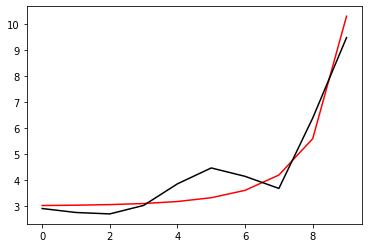

29700 0.025707409292595605
[2.90780197 2.75243983 2.69587408 3.02103661 3.85014638 4.46136701
 4.13917564 3.67465841 6.38197672 9.47638041]


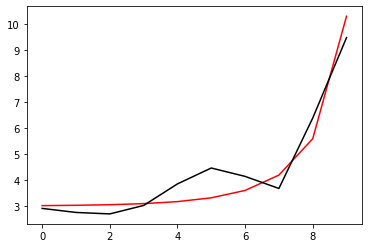

30800 0.05218977457738681
[2.90605018 2.75155579 2.69546496 3.02061224 3.84929798 4.46132009
 4.14040161 3.6765427  6.38354794 9.47634774]


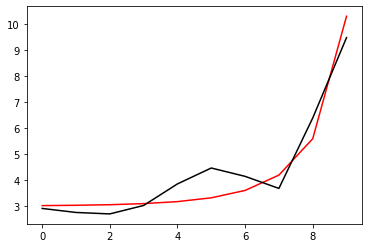

31900 0.03212893594166404
[2.90419014 2.75053179 2.69489351 3.02001293 3.84827415 4.46109512
 4.14143951 3.67822939 6.38495314 9.47631508]


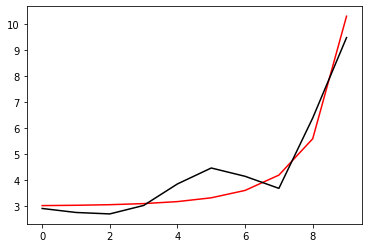

33000 0.022694615854015655
[2.90008265 2.74779894 2.69308387 3.01859228 3.84676789 4.46061098
 4.14235923 3.67990303 6.38641434 9.47628244]


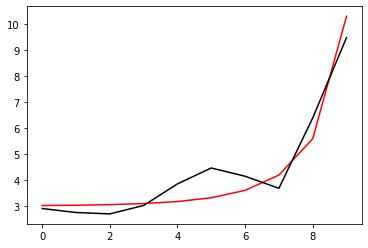

34100 0.015238034704854398
[2.8964144  2.74536905 2.691509   3.01735961 3.84541069 4.4602457
 4.14338198 3.68166871 6.38794414 9.47624982]


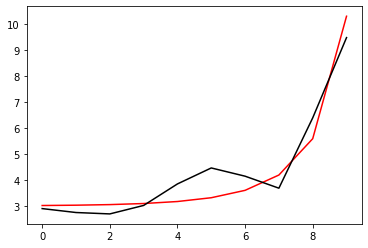

35200 0.011796726441490771
[2.89949797 2.74768535 2.69314746 3.01812968 3.84515978 4.46042099
 4.14460387 3.6833899  6.38928611 9.47621722]


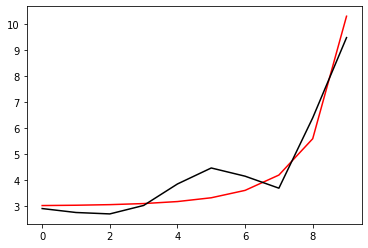

36300 0.010575308261696089
[2.9023466  2.75005108 2.69495409 3.01908842 3.84506891 4.4607168
 4.14591707 3.68517734 6.39066459 9.47618462]


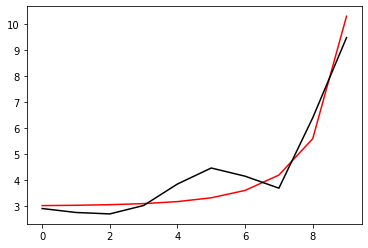

37400 0.0025563479073188655
[2.89950343 2.74828373 2.69385256 3.01814304 3.84384922 4.46038104
 4.14689983 3.68685162 6.3920864  9.47615205]


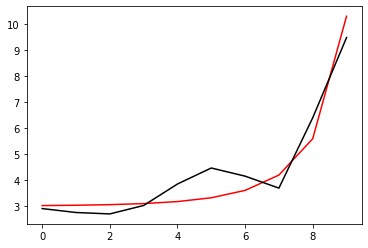

38500 0.030682288758628076
[2.8982176  2.74770413 2.69361037 3.01775726 3.84294167 4.4601856
 4.14791017 3.68846761 6.39340586 9.47611949]


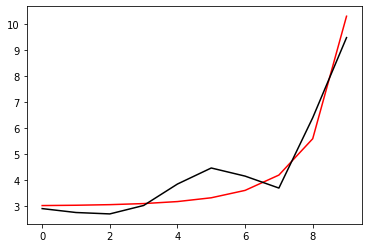

39600 0.02119408105556715
[2.89804994 2.74794302 2.69394657 3.01774951 3.84225709 4.46010993
 4.14897792 3.69009637 6.39470788 9.47608694]


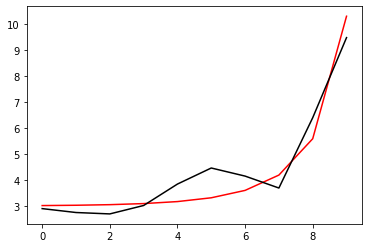

40700 0.025541529679215545
[2.90645406 2.75394503 2.69813554 3.02023626 3.84313239 4.46104464
 4.15077335 3.69227977 6.39636753 9.47605441]


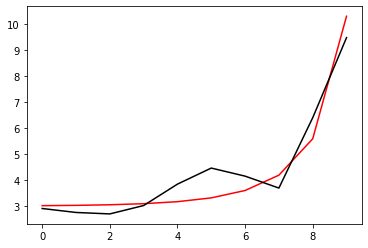

41800 0.052080207504171125
[2.90483591 2.75317284 2.69783065 3.01990038 3.84236072 4.46103591
 4.15201837 3.69417206 6.39793758 9.4760219 ]


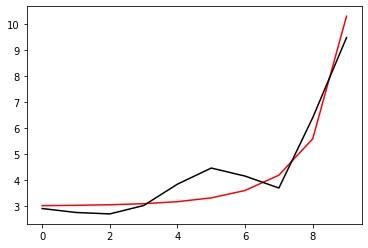

42900 0.03209047649483957
[2.9029846  2.75216424 2.69729073 3.0193377  3.8413788  4.46082583
 4.15305874 3.69585498 6.39933498 9.4759894 ]


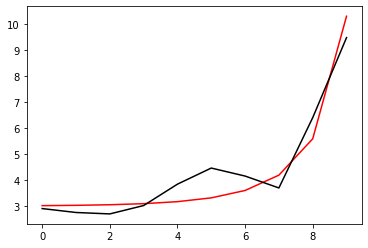

44000 0.022654858573054312
[2.89886656 2.74943392 2.6955044  3.01794895 3.83991227 4.46035659
 4.15398233 3.69752706 6.4007906  9.47595692]


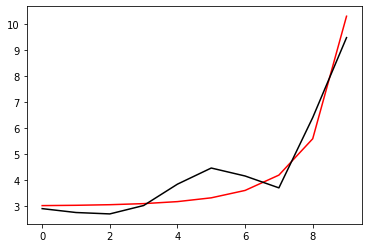

45100 0.01516428729613209
[2.89515676 2.74698782 2.69394164 3.0167418  3.83859125 4.46000403
 4.15500729 3.69928982 6.40231392 9.47592445]


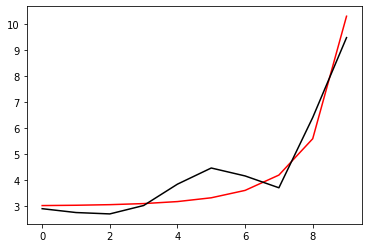

46200 0.01175867442540014
[2.89817289 2.74926751 2.69557729 3.01752797 3.83837111 4.46018823
 4.15622855 3.70100649 6.40364905 9.475892  ]


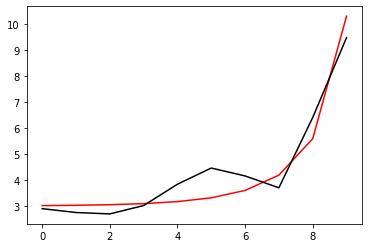

47300 0.010491727479555577
[2.90113825 2.75173237 2.69747958 3.01857119 3.83835605 4.46052297
 4.15756269 3.70280523 6.4050301  9.47585956]


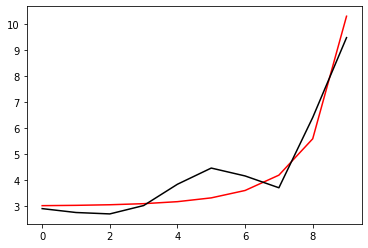

48400 0.002524787948184934
[2.89828465 2.7499676  2.69640149 3.01765833 3.83717668 4.46020257
 4.15854954 3.70447816 6.40644655 9.47582714]


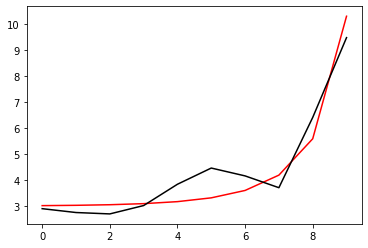

49500 0.030672886743253
[2.89698424 2.7493871  2.69618034 3.01730409 3.83630949 4.46002302
 4.15956488 3.70609424 6.4077622  9.47579473]


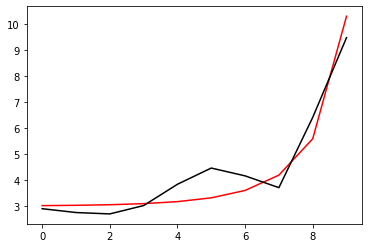

50600 0.02117982095053212
[2.89679447 2.74961972 2.69653398 3.01732587 3.83566436 4.45996284
 4.16063751 3.70772329 6.4090608  9.47576234]


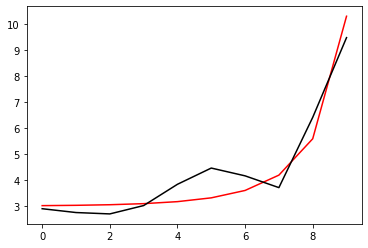

51700 0.02537320153984229
[2.90490532 2.75543071 2.70061692 3.01976421 3.83653287 4.46088444
 4.16241851 3.70989402 6.41071056 9.47572997]


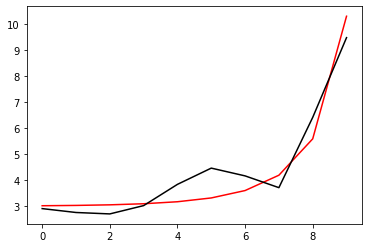

52800 0.05196677318392155
[2.90342895 2.75477828 2.70042371 3.01952422 3.83584407 4.4609196
 4.16368767 3.71179914 6.41228325 9.47569761]


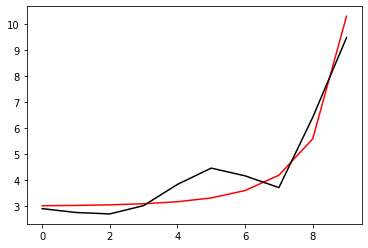

53900 0.03205472492672469
[2.90158157 2.75378299 2.69991518 3.01900007 3.83490643 4.4607275
 4.16473372 3.7134817  6.41367575 9.47566527]


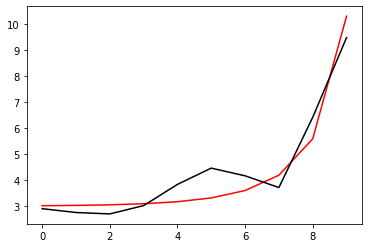

55000 0.02261951929086188
[2.89744272 2.75104926 2.69814939 3.01764344 3.83348103 4.46027573
 4.16566412 3.71515554 6.41512874 9.47563294]


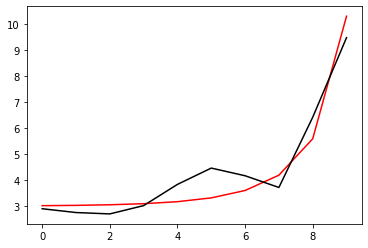

56100 0.01509441275925351
[2.89368324 2.74858289 2.69659752 3.01646314 3.83219828 4.45993888
 4.16669446 3.71691877 6.41664848 9.47560063]


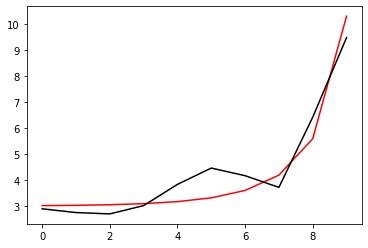

57200 0.011721366884902665
[2.89662959 2.75082585 2.69823172 3.01726833 3.83201193 4.46013548
 4.16791854 3.71863441 6.41797966 9.47556833]


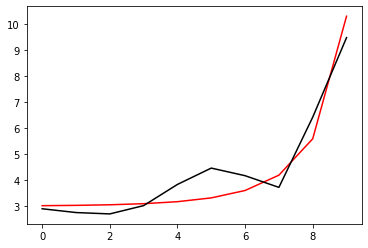

58300 0.010396750309545112
[2.89972991 2.7534053  2.7002426  3.01840713 3.83208112 4.46051622
 4.1692795  3.72044967 6.41936714 9.47553605]


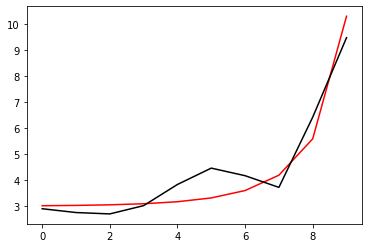

59400 0.002497081802356331
[2.89685732 2.75163851 2.6991863  3.01752787 3.83094411 4.46021425
 4.17027379 3.72212492 6.42078142 9.47550378]


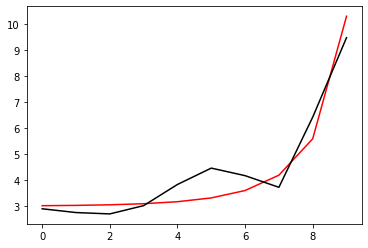

60500 0.03066520604528957
[2.8955445  2.7510604  2.6989901  3.01720983 3.83012138 4.46005469
 4.1712979  3.72374471 6.42209612 9.47547153]


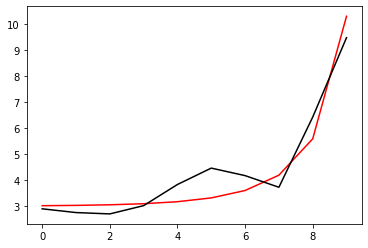

61600 0.021165662318998673
[2.89532977 2.75128649 2.6993627  3.01726433 3.82951899 4.46001373
 4.17237907 3.72537772 6.42339432 9.4754393 ]


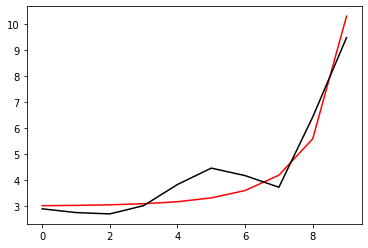

62700 0.0252017136486687
[2.9031336  2.75689929 2.70333671 3.01965468 3.83038232 4.460925
 4.17414869 3.72753905 6.42503696 9.47540708]


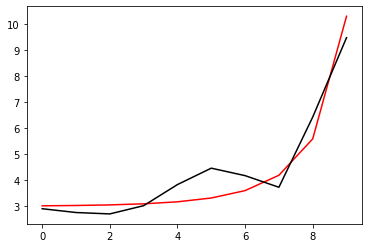

63800 0.051847738640716116
[2.90180945 2.75637681 2.70326485 3.0195199  3.82978414 4.461011
 4.17544819 3.7294628  6.42661678 9.47537487]


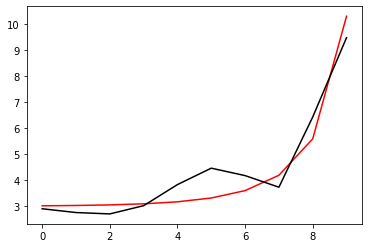

64900 0.03202179368449805
[2.89996039 2.75539264 2.702788   3.01903681 3.82889382 4.46084064
 4.17650376 3.731149   6.42800778 9.47534268]


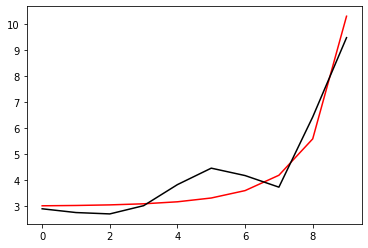

66000 0.022589092896983475
[2.89578857 2.75264864 2.70103989 3.0177128  3.82751145 4.46040948
 4.17744451 3.73282855 6.42946161 9.47531051]


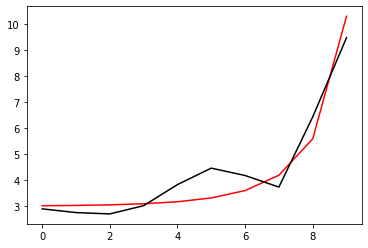

67100 0.015028536717154305
[2.8919687  2.75015673 2.69949748 3.01656096 3.82626962 4.46009192
 4.17848401 3.73459629 6.43098121 9.47527835]


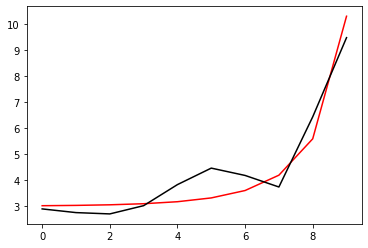

68200 0.011684666460946602
[2.89484177 2.75236253 2.70113196 3.01738872 3.82612078 4.46030511
 4.17971502 3.73631504 6.43231182 9.47524621]


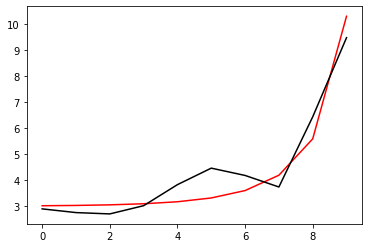

69300 0.010287263690506398
[2.89809913 2.75507548 2.70326746 3.01863672 3.82628465 4.46074041
 4.18110998 3.73815311 6.43371037 9.47521408]


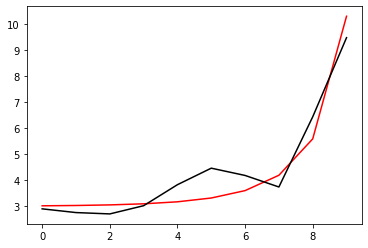

70400 0.0024736207978191095
[2.89519736 2.75330142 2.70223144 3.01779263 3.8251927  4.46046061
 4.18211575 3.73983504 6.43512625 9.47518197]


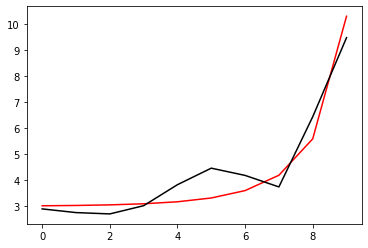

71500 0.03065944253317458
[2.89387428 2.75272954 2.70206509 3.01751651 3.82441955 4.46032605
 4.18315321 3.74146292 6.43644344 9.47514987]


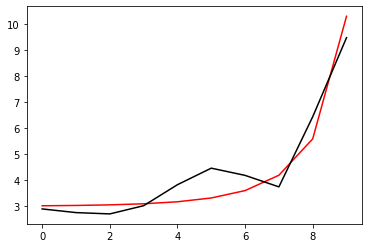

72600 0.021151589569035446
[2.893631   2.7529489  2.70245881 3.01760776 3.82386405 4.46030884
 4.18424732 3.7431043  6.43774484 9.47511779]


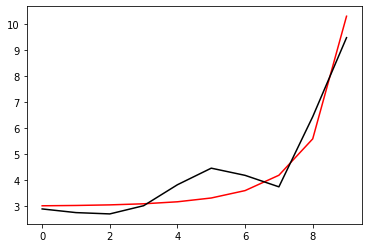

73700 0.025026184161801367
[2.90111042 2.75835451 2.70632048 3.01995067 3.82472432 4.46121316
 4.18600928 3.74526019 6.43938368 9.47508573]


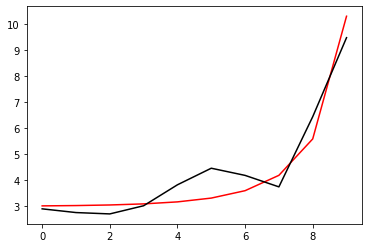

74800 0.05172079296102909
[2.89995202 2.75797519 2.70638259 3.01993297 3.82422658 4.46135863
 4.18734674 3.74720961 6.44097606 9.47505368]


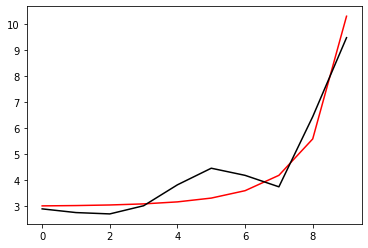

75900 0.031991878786270606
[2.89809464 2.75699978 2.70593829 3.01949429 3.82338758 4.46121463
 4.18841652 3.7489043  6.4423696  9.47502165]


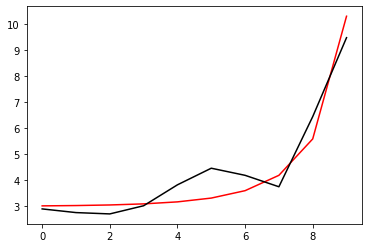

77000 0.022564283293061288
[2.89387517 2.75423751 2.70420488 3.01820383 3.82205082 4.46080797
 4.18937198 3.75059434 6.44382845 9.47498963]


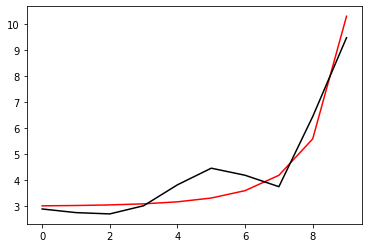

78100 0.01496687042688054
[2.88998079 2.75171314 2.70267014 3.01708239 3.82085321 4.46051405
 4.19042528 3.75237148 6.44535207 9.47495762]


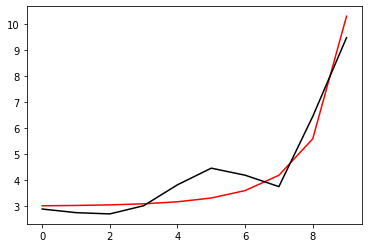

79200 0.011648413936912065
[2.89277542 2.7538809  2.70430707 3.01793708 3.82074656 4.46074892
 4.19166822 3.75409836 6.44668621 9.47492564]


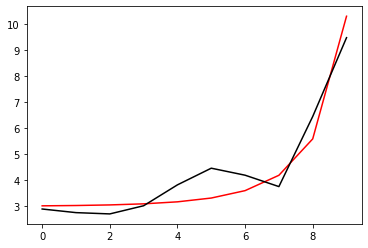

80300 0.010158995886446733
[2.89621692 2.75675078 2.70658731 3.01931129 3.82101818 4.46124939
 4.19310601 3.75596695 6.44810144 9.47489367]


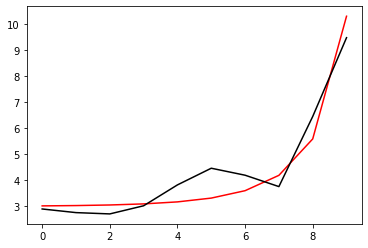

81400 0.002454970158458865
[2.89327361 2.75496337 2.70557022 3.01850458 3.81997488 4.46099643
 4.19412827 3.75766091 6.4495235  9.47486171]


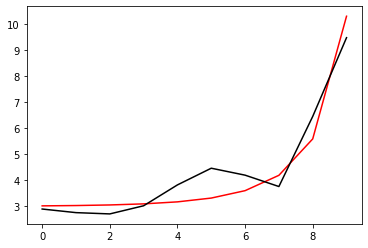

82500 0.03065583010913518
[2.89194239 2.75440224 2.70543988 3.0182775  3.81925773 4.46089301
 4.19518471 3.75930222 6.45084739 9.47482977]


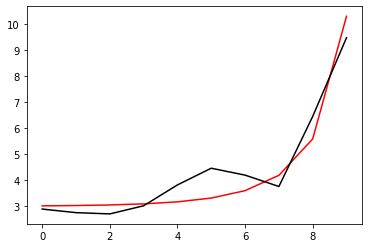

83600 0.021137585774854254
[2.89166599 2.75461472 2.70585776 3.01841066 3.81875451 4.4609052
 4.19629723 3.76095739 6.45215638 9.47479784]


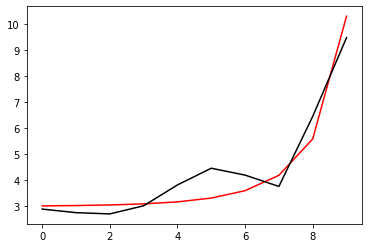

84700 0.024845503417551092
[2.89879904 2.75980189 2.70960308 3.02070697 3.81961454 4.46180678
 4.19805613 3.76311272 6.45379552 9.47476594]


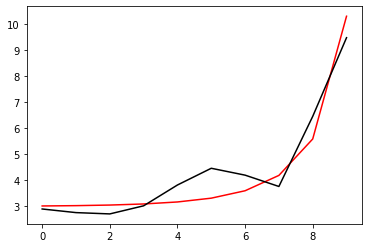

85800 0.05158275097866675
[2.89782425 2.75958314 2.70981579 3.02082168 3.81922989 4.46202261
 4.19944114 3.76509659 6.45540714 9.47473404]


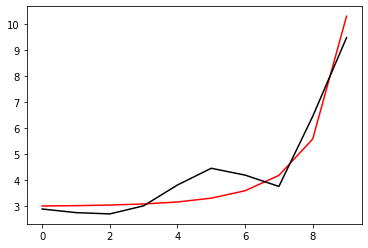

86900 0.03196529584253431
[2.89595046 2.75861395 2.70940564 3.0204319  3.8184474  4.46191077
 4.20053097 3.76680574 6.45680818 9.47470216]


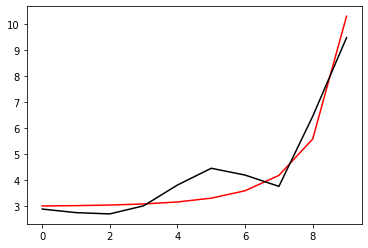

88000 0.022546098433344878
[2.89166531 2.75582381 2.70768376 3.01917646 3.81715978 4.46153354
 4.20150661 3.76851221 6.4582772  9.4746703 ]


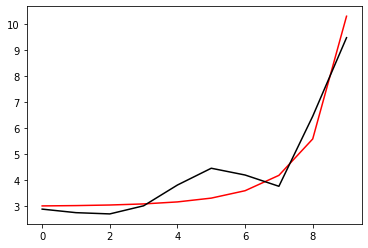

89100 0.014909746349001437
[2.88767771 2.75325787 2.70615445 3.01808781 3.8160106  4.46126867
 4.20257948 3.77030482 6.45980997 9.47463845]


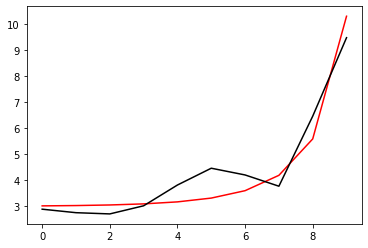

90200 0.011612416885266348
[2.89038645 2.75538607 2.70779657 3.01897488 3.81595208 4.46153156
 4.20384056 3.77204602 6.46115269 9.47460662]


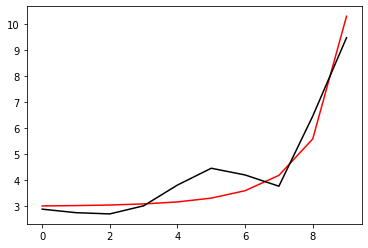

91300 0.010005957298867831
[2.89404575 2.75844226 2.71024706 3.02049676 3.81634804 4.46211052
 4.20533228 3.77395479 6.46259164 9.47457481]


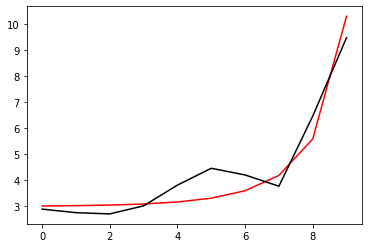

92400 0.0024419452374957063
[2.89104565 2.75663425 2.70924776 3.01973056 3.81535818 4.46189032
 4.20637733 3.77566744 6.46402554 9.47454301]


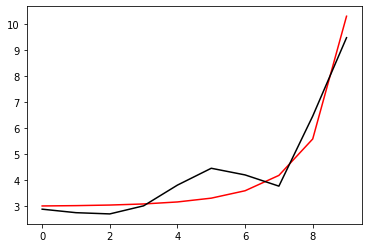

93500 0.03065465004689696
[2.88970826 2.7560893  2.70916128 3.01956151 3.81470525 4.46182575
 4.20745983 3.77732889 6.46536137 9.47451122]


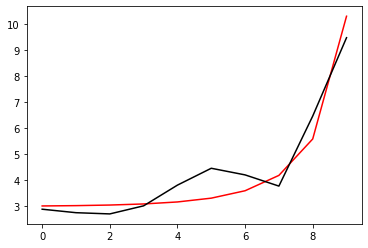

94600 0.02112363406847293
[2.88939288 2.75629487 2.70960751 3.0197433  3.8142613  4.46187451
 4.20859769 3.77900468 6.46668347 9.47447946]


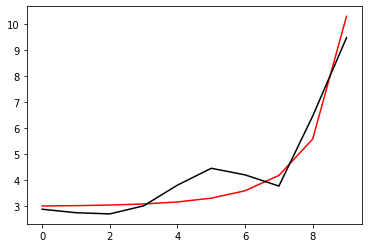

95700 0.02465825197223323
[2.89615183 2.7612496  2.71323184 3.02199434 3.81512491 4.46277873
 4.21035941 3.78116561 6.46832807 9.4744477 ]


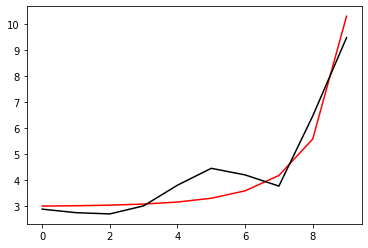

96800 0.051429061101005064
[2.89538468 2.76121476 2.71361741 3.02226167 3.81486995 4.46307896
 4.21180423 3.7831951  6.4699674  9.47441597]


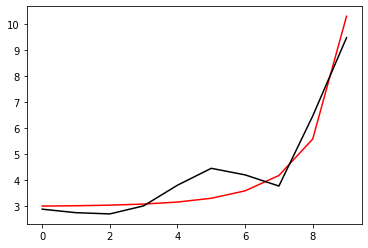

97900 0.031942539080097525
[2.89348443 2.76024892 2.71324396 3.02192678 3.81415089 4.46300672
 4.21292157 3.78492625 6.47138216 9.47438425]


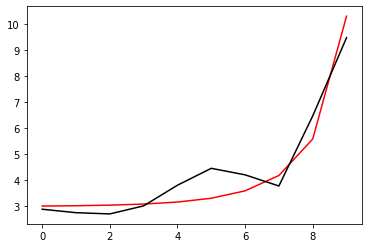

99000 0.022536004796587055
[2.88911102 2.75741923 2.71153022 3.0207086  3.81291717 4.46266526
 4.21392439 3.78665669 6.47286782 9.47435254]


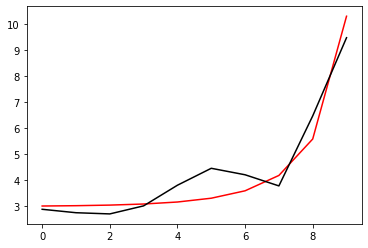

100100 0.01485767675435707
[2.8850051  2.75479955 2.71000343 3.01965576 3.8118219  4.4624363
 4.21502416 3.78847248 6.47441627 9.47432085]


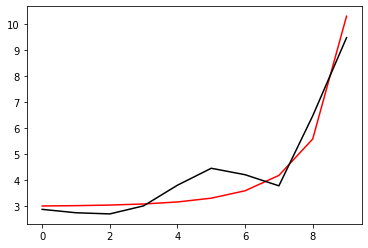

101200 0.011576431546150026
[2.88761715 2.75688567 2.71165414 3.02058214 3.8118192  4.46273526
 4.21631131 3.79023588 6.47577396 9.47428918]


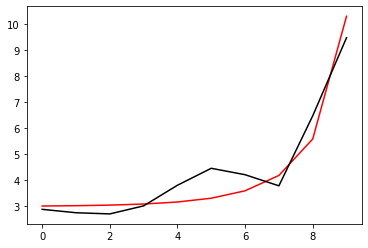

102300 0.009819551450754646
[2.89153669 2.76016553 2.71430763 3.02227921 3.81236083 4.46340972
 4.21787114 3.79219715 6.47724559 9.47425752]


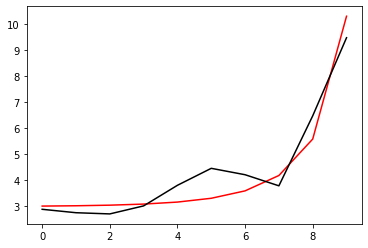

103400 0.0024357327916807153
[2.88846057 2.75832813 2.71332529 3.02155789 3.81143086 4.46322997
 4.21894711 3.79393703 6.47869856 9.47422588]


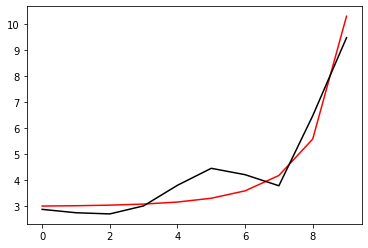

104500 0.030656242058562717
[2.8871187  2.75780596 2.71329276 3.02145841 3.8108528  4.46321415
 4.2200648  3.79562724 6.48005308 9.47419425]


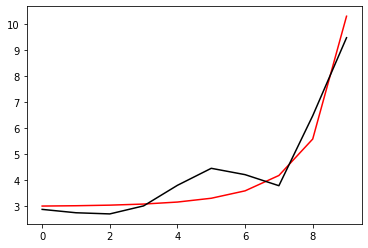

105600 0.021109720705806842
[2.88675672 2.75800477 2.71377315 3.02169777 3.81047739 4.46330875
 4.22123695 3.79733243 6.48139536 9.47416264]


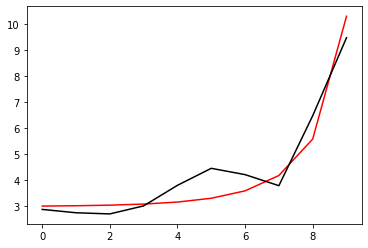

106700 0.02446258123322157
[2.8931065  2.76270971 2.71727125 3.02390573 3.81134996 4.4642227
 4.22300916 3.79950698 6.48305209 9.47413105]


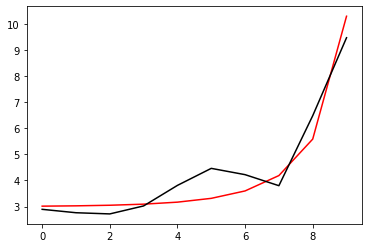

107800 0.05125295086864094
[2.89258016 2.76289075 2.71786006 3.02435283 3.81124691 4.46462587
 4.22452993 3.80159665 6.4847301  9.47409947]


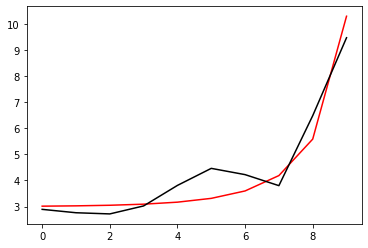

108900 0.0319243814759342
[2.89064062 2.76192496 2.7175272  3.02408095 3.8106005  4.46460293
 4.22568448 3.80335959 6.48616663 9.47406791]


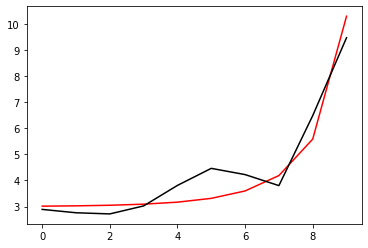

110000 0.022536188326924556
[2.88615001 2.75904113 2.71581786 3.02290339 3.80942725 4.46430563
 4.22672366 3.8051238  6.48767735 9.47403637]


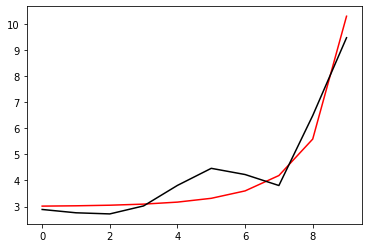

111100 0.01481145551775875
[2.88189169 2.75635126 2.71428971 3.02189024 3.80839311 4.46412149
 4.2278599  3.80697282 6.48924995 9.47400484]


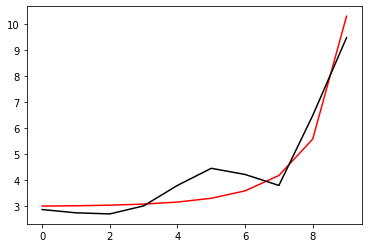

112200 0.01154013250559725
[2.88439134 2.7583912  2.71595329 3.02286488 3.80845631 4.46446696
 4.22918346 3.80876871 6.49063096 9.47397332]


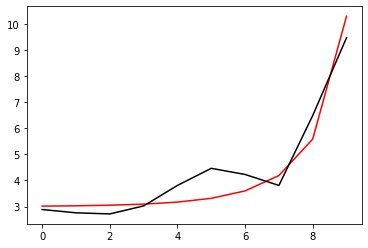

113300 0.009587134756778016
[2.8886253  2.76194294 2.71885238 3.02477296 3.80917152 4.4652591
 4.23082989 3.81079855 6.49214697 9.47394183]


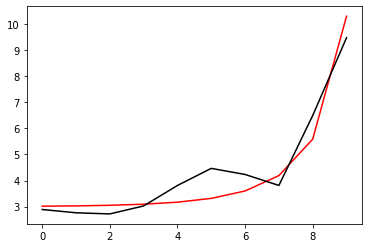

114400 0.002438089699278839
[2.88544834 2.76006519 2.71788659 3.02410267 3.80831027 4.46512996
 4.23194754 3.81257686 6.49362845 9.47391035]


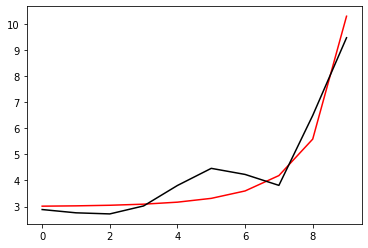

115500 0.030661016168057876
[2.88410316 2.759574   2.7179212  3.02408787 3.80782118 4.46517588
 4.2331124  3.8143072  6.49501054 9.47387888]


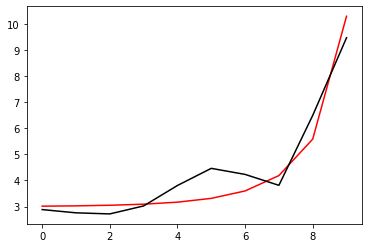

116600 0.021095841575168056
[2.88368455 2.75976653 2.71844388 3.02439686 3.80752679 4.46532861
 4.23433073 3.81605341 6.49638234 9.47384743]


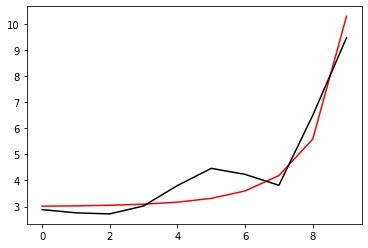

117700 0.02425603765365675
[2.88958075 2.76420023 2.72181008 3.02656541 3.80841599 4.46626192
 4.23612374 3.81825228 6.49806011 9.473816  ]


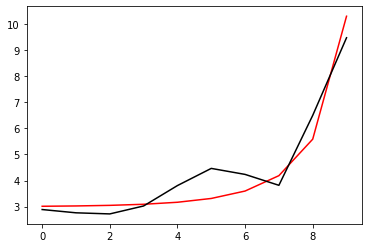

118800 0.05104386590971586
[2.88934234 2.76464217 2.72264453 3.02722973 3.80849531 4.46679314
 4.23774221 3.82042169 6.49979147 9.47378459]


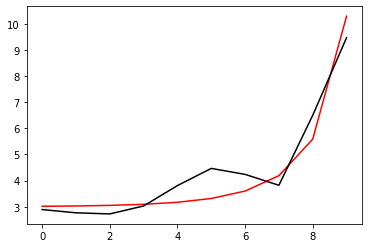

119900 0.031912051661345246
[2.88734671 2.76367253 2.72235802 3.02703201 3.80793415 4.46683251
 4.23894696 3.82222946 6.50126046 9.47375319]


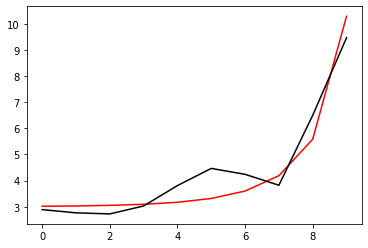

121000 0.022550014989848925
[2.88270102 2.76071586 2.72064889 3.02590001 3.8068305  4.46659064
 4.24003483 3.82404055 6.50280743 9.4737218 ]


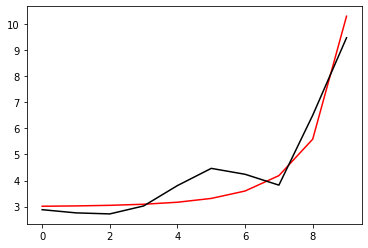

122100 0.01477234675966884
[2.87824335 2.7579332  2.7191141  3.0249317  3.80586722 4.46646321
 4.24122035 3.82593625 6.50441555 9.47369044]


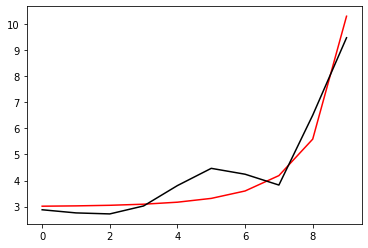

123200 0.011503059376021599
[2.88060731 2.7599204  2.72079586 3.02596634 3.80600984 4.46686912
 4.24259414 3.82777839 6.50583108 9.47365909]


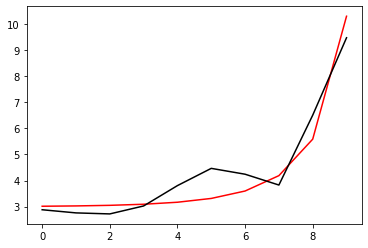

124300 0.009289660205514649
[2.88522564 2.76380691 2.72399671 3.02813276 3.8069357  4.46780832
 4.24435183 3.82989828 6.50740712 9.47362776]


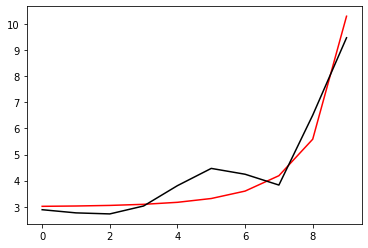

125400 0.002451678740250959
[2.88191503 2.76187479 2.72304765 3.02752224 3.80615539 4.46774362
 4.24552568 3.83173012 6.50892983 9.47359644]


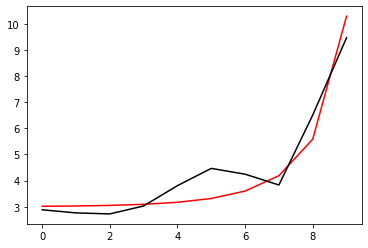

126500 0.030669461924950677
[2.88056676 2.76142494 2.72316696 3.02761231 3.80577429 4.46786872
 4.24675394 3.83351599 6.5103516  9.47356514]


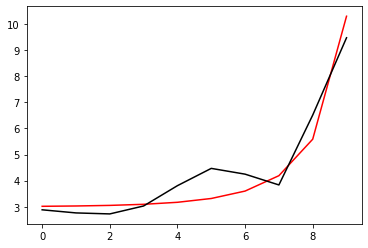

127600 0.021082015867606035
[2.88007806 2.7616122  2.7237434  3.02800751 3.80557811 4.46809631
 4.24803458 3.83531902 6.5117656  9.47353386]


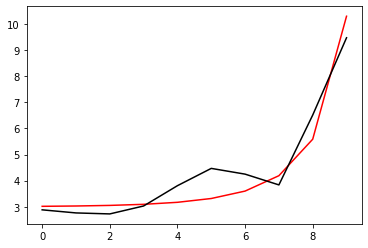

128700 0.024035304207869996
[2.88546453 2.76574849 2.72697216 3.03014299 3.80649525 4.46906245
 4.2498627  3.83755693 6.51347661 9.47350259]


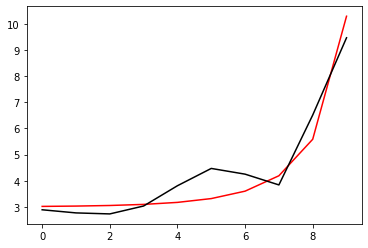

129800 0.05078444512859977
[2.8855835  2.76651682 2.72811323 3.03107764 3.80679989 4.46975675
 4.25160911 3.83983314 6.51528152 9.47347134]


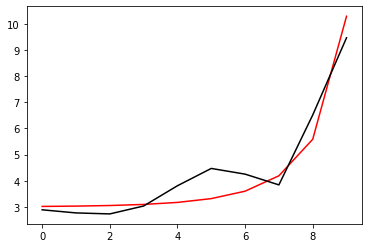

130900 0.031907560968021074
[2.88350918 2.7655385  2.72788146 3.03096963 3.80634147 4.46987625
 4.25288187 3.84170361 6.51679763 9.47344011]


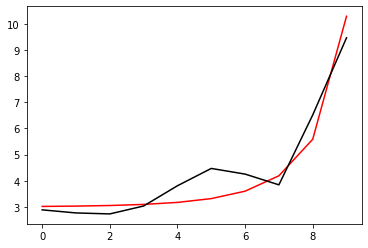

132000 0.02258288406633482
[2.87865765 2.76248445 2.72616774 3.02989048 3.80532032 4.4697054
 4.25403542 3.84357963 6.51839625 9.47340889]


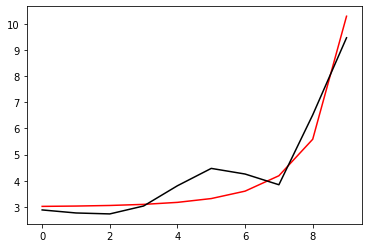

133100 0.014742462995530106
[2.87393496 2.75957756 2.72461902 3.02897401 3.80444134 4.46965098
 4.25528788 3.84554056 6.52005557 9.4733777 ]


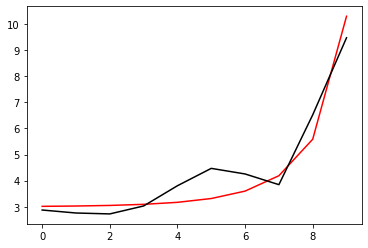

134200 0.011464518322081294
[2.87612818 2.76150137 2.72632552 3.03008436 3.80468186 4.47013634
 4.25673091 3.84744794 6.52152112 9.47334652]


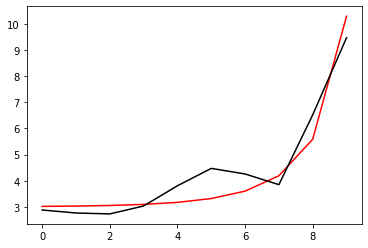

135300 0.008897876205879958
[2.88122148 2.76580528 2.72990276 3.03257236 3.80586827 4.47126229
 4.25863331 3.84968717 6.52317868 9.47331535]


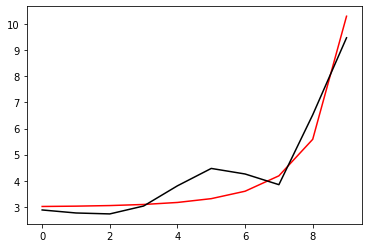

136400 0.0024806518529428907
[2.87773271 2.76380031 2.72897148 3.03203412 3.80518616 4.47128122
 4.25988357 3.85159356 6.52476028 9.47328421]


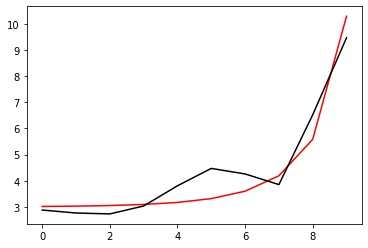

137500 0.03068214440423797
[2.8763799  2.76340508 2.72919922 3.03225662 3.80493926 4.47150954
 4.26119773 3.85345641 6.52623864 9.47325308]


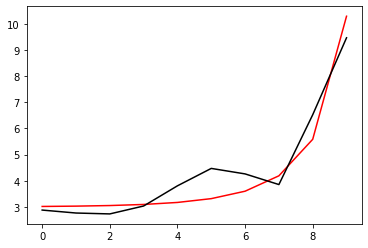

138600 0.021068314786999474
[2.87580275 2.76358895 2.72984585 3.0327613  3.80486537 4.47183527
 4.26256324 3.85533831 6.52771259 9.47322197]


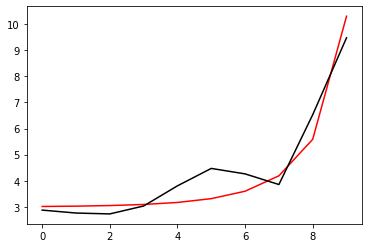

139700 0.023795833710777873
[2.88060907 2.76739667 2.73293299 3.03487463 3.80582756 4.47285369
 4.26444683 3.85763613 6.52947407 9.47319087]


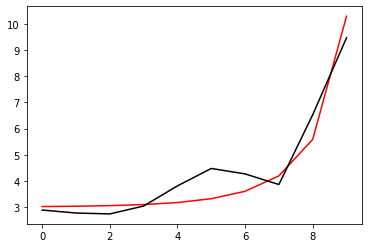

140800 0.05044425671015311
[2.88119224 2.76859035 2.73447139 3.03615755 3.80642006 4.47376157
 4.26636458 3.8600578  6.53138131 9.4731598 ]


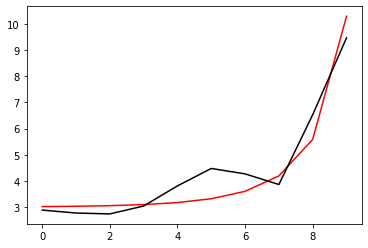

141900 0.03191433713866477
[2.87900792 2.76759703 2.73430655 3.03616117 3.80608907 4.47398624
 4.26773047 3.86201622 6.5329653  9.47312874]


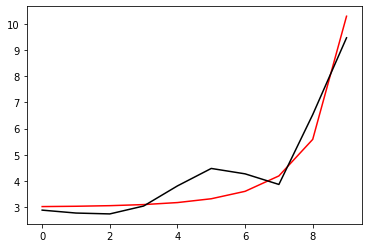

143000 0.022643890103310242
[2.87388113 2.76441267 2.73258261 3.03514573 3.80516898 4.47390849
 4.26897375 3.86398268 6.53463735 9.4730977 ]


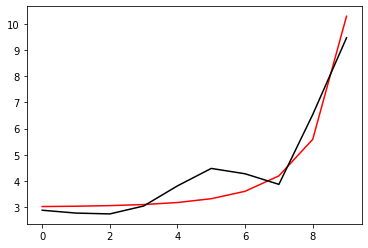

144100 0.01472559584622476
[2.86880093 2.76133749 2.73100999 3.03429106 3.80439339 4.47395005
 4.27031812 3.86603513 6.53637013 9.47306667]


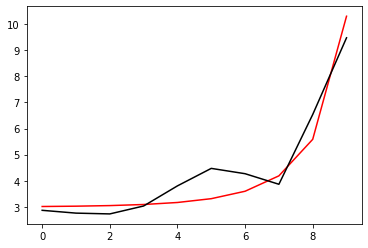

145200 0.011423393311192825
[2.87076958 2.7631804  2.7327491  3.0354984  3.80475749 4.47454147
 4.27185724 3.86803472 6.5379078  9.47303567]


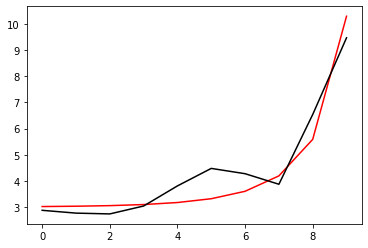

146300 0.008366688458565799
[2.87645319 2.7680092  2.7368014  3.0383925  3.80627194 4.47590822
 4.2739504  3.870434   6.53967703 9.47300468]


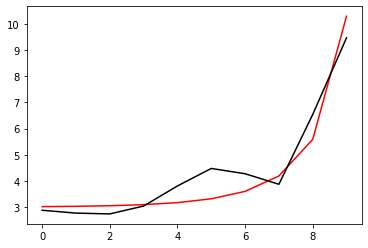

147400 0.002531674576327734
[2.87272445 2.76590614 2.73589006 3.03794455 3.80571268 4.47603802
 4.27530582 3.8724448  6.54134269 9.47297371]


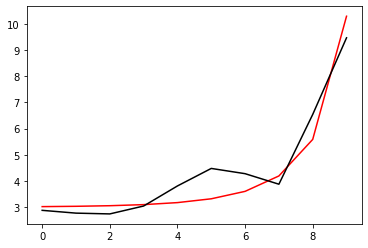

148500 0.030699656233595052
[2.87136262 2.76558271 2.7362587  3.0383376  3.8056367  4.47640339
 4.27673778 3.8744153  6.54290196 9.47294276]


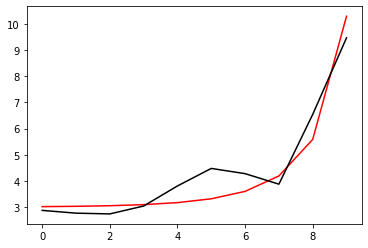

149600 0.0210549214174797
[2.87067162 2.76576636 2.73699915 3.03898487 3.80571945 4.47686033
 4.27822033 3.87640768 6.54446137 9.47291183]


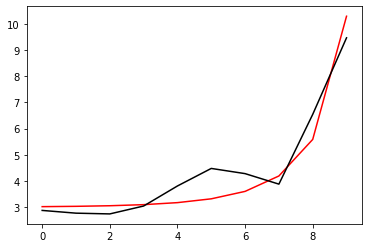

150700 0.02353140173125701
[2.87481174 2.76921032 2.73994453 3.04109498 3.80675308 4.4779598
 4.28018918 3.87879568 6.54629829 9.47288092]


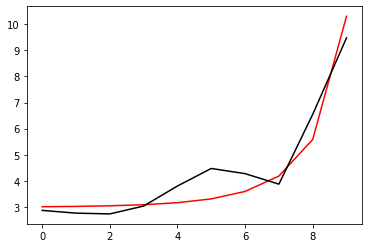

151800 0.04996588929479025
[2.87603151 2.77098539 2.74202036 3.04284459 3.80772751 4.4791565
 4.28234258 3.88141985 6.54835021 9.47285002]


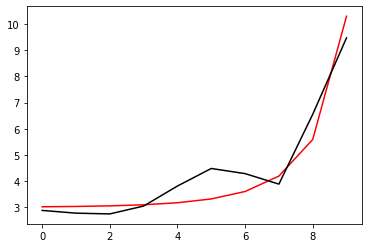

152900 0.03193849857069708
[2.87369256 2.76996797 2.74193967 3.04299086 3.80755917 4.47952209
 4.28383772 3.88350274 6.55003222 9.47281915]


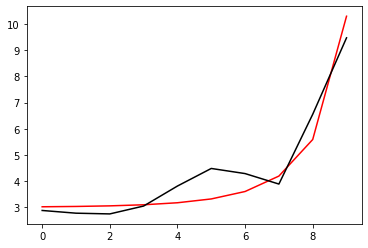

154000 0.022749189194795242
[2.86819477 2.7666085  2.74019883 3.0420553  3.80676713 4.47956923
 4.28520545 3.88559651 6.55180921 9.47278829]


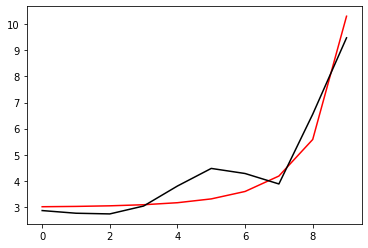

155100 0.014729223372238956
[2.86262809 2.76330424 2.73858936 3.04127727 3.80612269 4.47973992
 4.28667782 3.88777854 6.55364778 9.47275745]


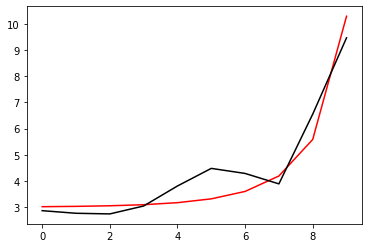

156200 0.011377789748095564
[2.86428904 2.76503739 2.74036992 3.04261047 3.80664642 4.48047516
 4.28835156 3.88990935 6.55528976 9.47272664]


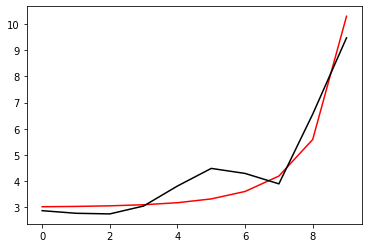

157300 0.007629454338690455
[2.87069856 2.77052255 2.74502189 3.04601987 3.80857794 4.48215522
 4.29069834 3.89252514 6.55721314 9.47269584]


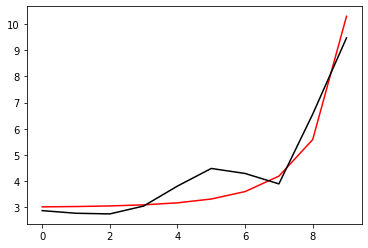

158400 0.0026156269813939047
[2.8666425  2.76828564 2.74413341 3.0456875  3.80817659 4.48243473
 4.29220016 3.89468349 6.55899934 9.47266506]


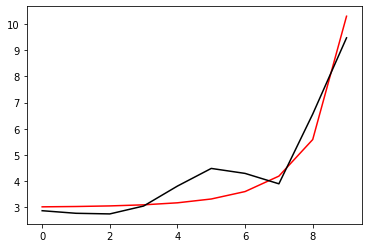

159500 0.03072243348045045
[2.86526179 2.76805545 2.74468674 3.04630359 3.80832291 4.4829849
 4.29379554 3.89680586 6.56067493 9.4726343 ]


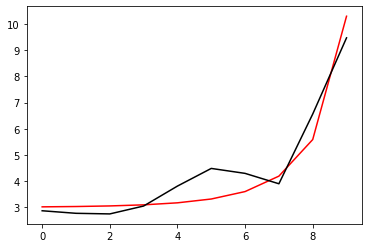

160600 0.021042247829845616
[2.8644214  2.76824328 2.74555419 3.04713997 3.80861097 4.48362014
 4.29544127 3.8989543  6.56235683 9.47260356]


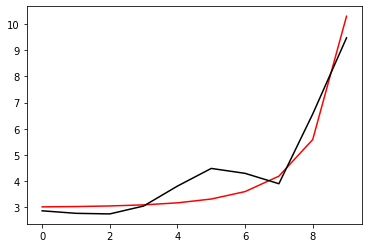

161700 0.023233915387266407
[2.86779753 2.77128861 2.74836675 3.04927902 3.80975662 4.48484336
 4.29753905 3.90147669 6.56430558 9.47257284]


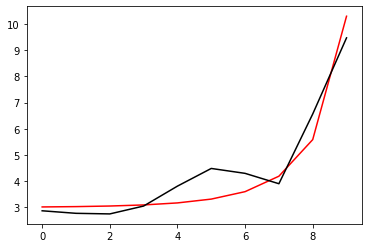

162800 0.049232428426524436
[2.86994488 2.77390019 2.75120293 3.05168003 3.81125782 4.48644335
 4.30002529 3.90438911 6.56656559 9.47254214]


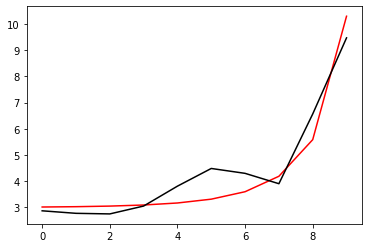

163900 0.031991367652396505
[2.86738563 2.77284289 2.75122809 3.0520108  3.81130101 4.48700026
 4.30170129 3.9066492  6.56838958 9.47251146]


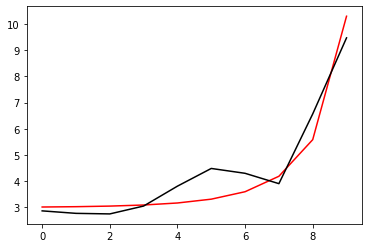

165000 0.022928673741034213
[2.86138812 2.76924836 2.74946241 3.05117844 3.81067553 4.48721754
 4.3032431  3.90892319 6.57031693 9.4724808 ]


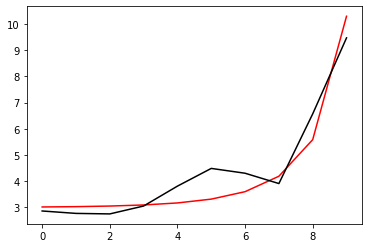

166100 0.014769649632349809
[2.85516682 2.76563698 2.74780188 3.05049991 3.81020246 4.48756476
 4.30489512 3.91128936 6.57230771 9.47245016]


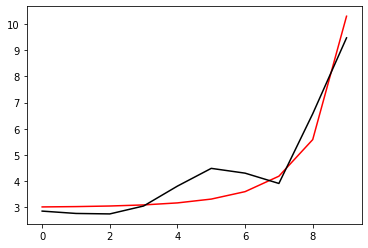

167200 0.011324520037055967
[2.85639687 2.76721459 2.74963223 3.05199664 3.81093496 4.48849619
 4.30675769 3.91360687 6.57410019 9.47241954]


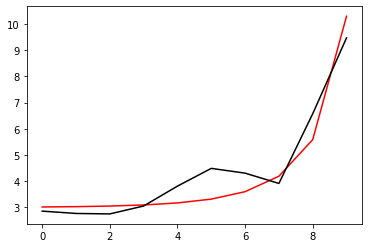

168300 0.006605635606851867
[2.86364278 2.7734784  2.75501164 3.05604098 3.81338642 4.49057711
 4.30943689 3.9165124  6.57623457 9.47238895]


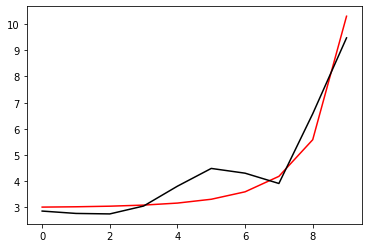

169400 0.002749386316629375
[2.85913719 2.77105437 2.75414578 3.05585545 3.81318901 4.49105859
 4.31114162 3.91887803 6.57819238 9.47235837]


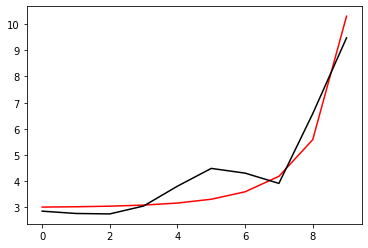

170500 0.03075014049188546
[2.85771718 2.77093856 2.75493619 3.05676053 3.81362427 4.49185692
 4.31296209 3.92121308 6.58003368 9.47232782]


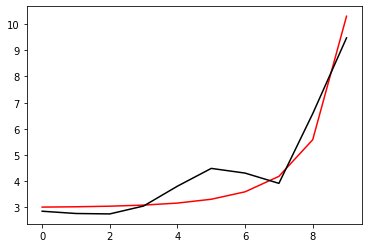

171600 0.021031085227118378
[2.85667795 2.7711319  2.75597032 3.05784457 3.81418066 4.49273255
 4.31483286 3.92357955 6.58188903 9.47229729]


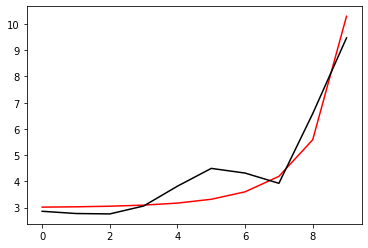

172700 0.022895297562806637
[2.85920155 2.77375478 2.75867385 3.06006124 3.8154954  4.494138
 4.317119   3.92629646 6.58399929 9.47226678]


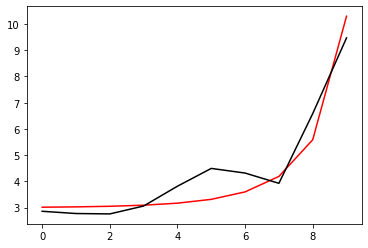

173800 0.047996365446199694
[2.86276936 2.77761617 2.76261844 3.06339441 3.81773948 4.49630949
 4.32007933 3.9296207  6.58655829 9.47223629]


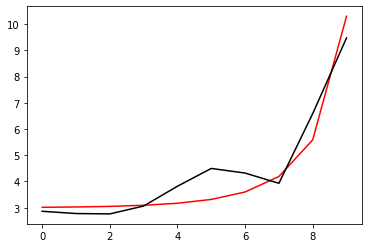

174900 0.03209295420509402
[2.85988907 2.77648132 2.76276256 3.06395277 3.8180507  4.49711943
 4.32200183 3.93212689 6.58858294 9.47220583]


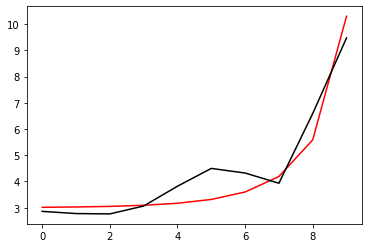

176000 0.023234956529946248
[2.85324108 2.77257816 2.76096036 3.06325042 3.81763828 4.49756265
 4.32377981 3.934648   6.59071863 9.47217538]


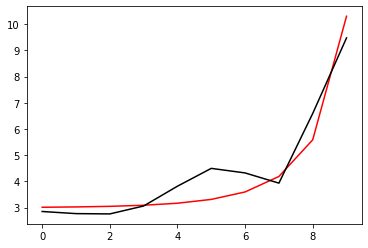

177100 0.014882968226331233
[2.84619497 2.7685808  2.75923857 3.06270194 3.81738669 4.49814485
 4.32567521 3.93726594 6.59291955 9.47214497]


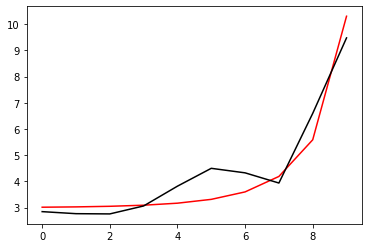

178200 0.011259744935812712
[2.84684584 2.76994035 2.76112002 3.06440011 3.81838208 4.49933255
 4.32779042 3.93983671 6.59491889 9.47211457]


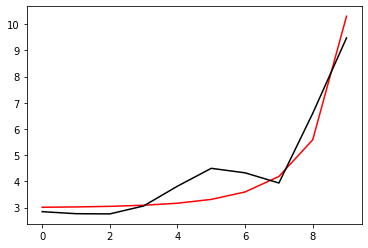

179300 0.00527720034619021
[2.85480977 2.77692923 2.76722688 3.06911261 3.82140302 4.50187054
 4.33086269 3.94309631 6.59731975 9.4720842 ]


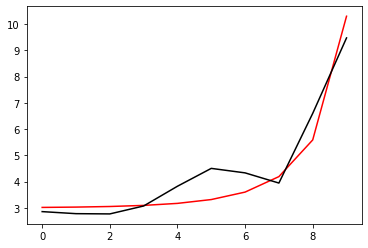

180400 0.002949278192346672
[2.84970018 2.77423291 2.76635906 3.0690894  3.82144743 4.50260348
 4.33282757 3.94573245 6.59950497 9.47205385]


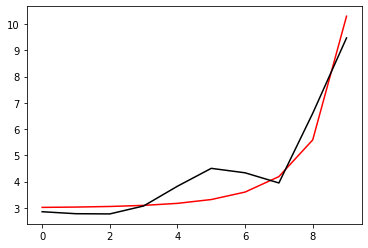

181500 0.0307797458309123
[2.8481938  2.77422106 2.7674121  3.07033001 3.82222637 4.50370696
 4.33493207 3.94834101 6.60156337 9.47202353]


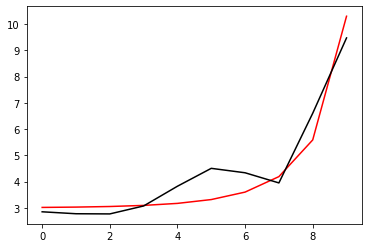

182600 0.021022121656977553
[2.84688879 2.77439222 2.76862447 3.07169768 3.82309839 4.5048748
 4.33708298 3.95098344 6.60364174 9.47199323]


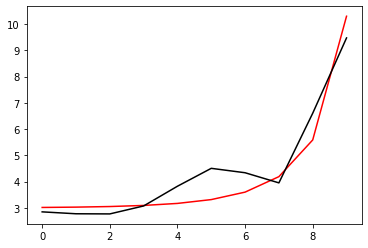

183700 0.022519001846494538
[2.84854637 2.77659462 2.77124548 3.07403369 3.82462987 4.50651195
 4.33960868 3.95394779 6.60595826 9.47196295]


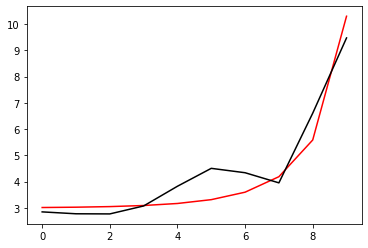

184800 0.045827608204927824
[2.85422582 2.78224089 2.77672148 3.07862489 3.82785916 4.50943825
 4.34319336 3.9578129  6.60891008 9.4719327 ]


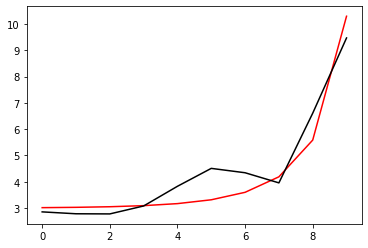

185900 0.03226315919075251
[2.85086327 2.78091394 2.77692341 3.0793916  3.82844758 4.51052774
 4.34540023 3.96061178 6.61117948 9.47190248]


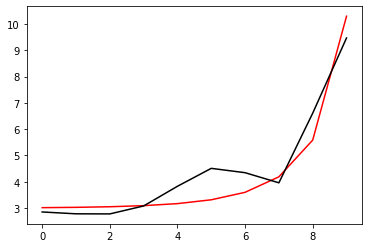

In [ ]:
optimizer=tf.optimizers.SGD(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

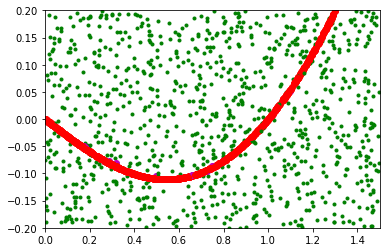

In [190]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()